<a href="https://colab.research.google.com/github/javmencia/COBWEBfiles/blob/main/PCautoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting Autoencoder Imputation + LSTM Survival Prediction Pipeline
Loading data...

STAGE 1: Autoencoder-based Imputation
Starting advanced preprocessing with autoencoder imputation...
Removed 65 rows with missing VISDAY
Data after handling missing survival outcomes: 8056 rows
Selected 34 features for modeling
=== MISSING DATA ANALYSIS ===
Missing data by column:
                         missing_count  missing_percentage
cycle_number                      1969           24.441410
total_body_systems                1019           12.648957
max_ae_duration                   1019           12.648957
most_recent_ae_severity           1019           12.648957
mean_ae_duration                  1019           12.648957
total_cycles                         9            0.111718


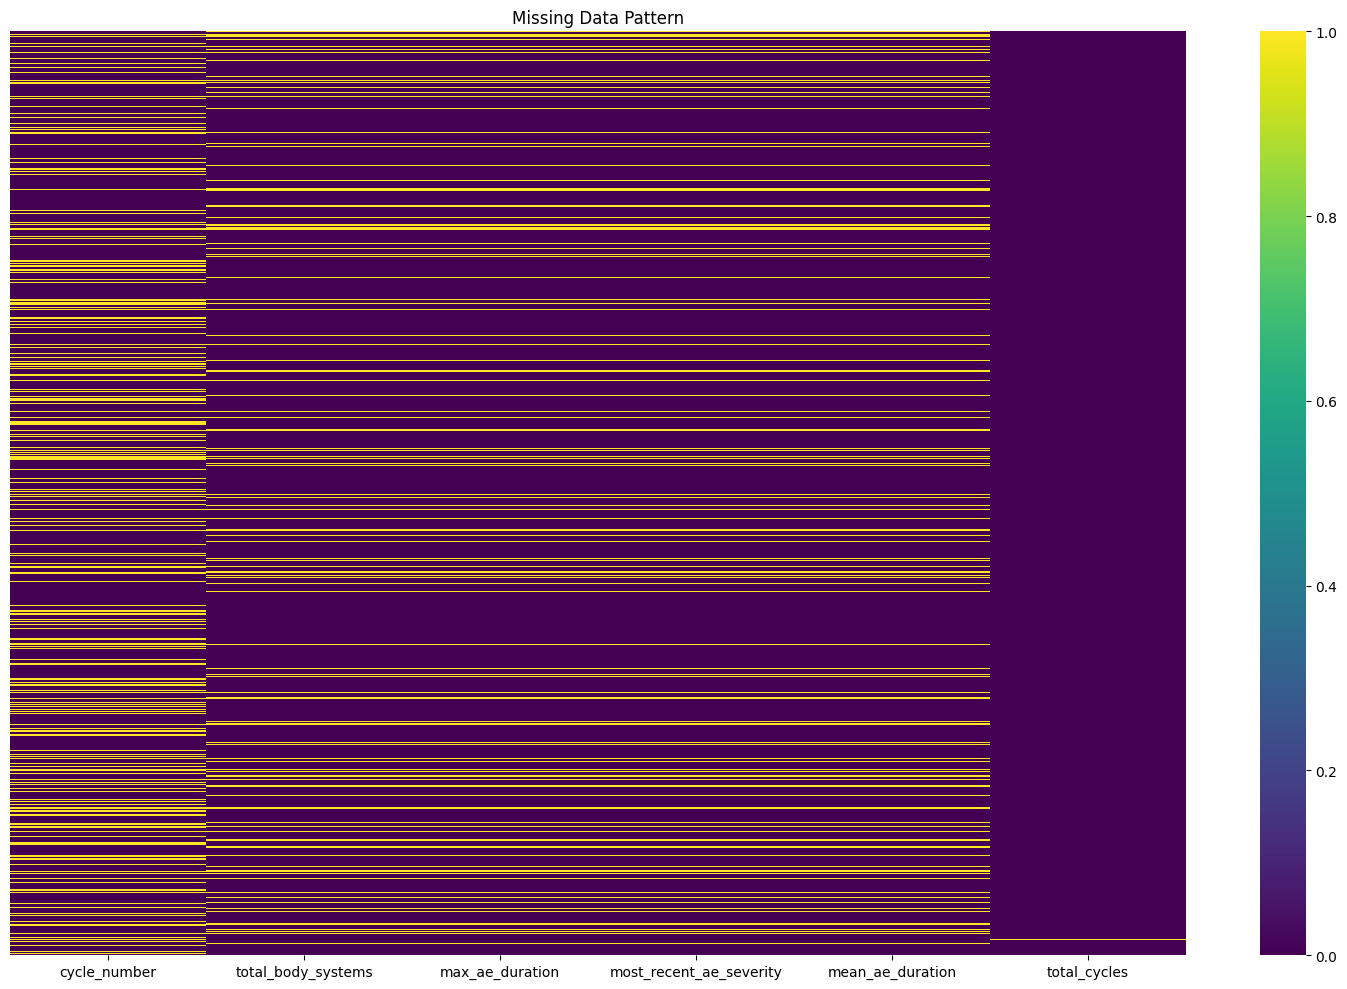

Numeric columns: 11
Categorical columns: 23

Preparing 34 features for autoencoder imputation:
- Numeric features: 11
- Categorical features: 23
Final feature matrix shape: (8056, 68)
Missing mask shape: (8056, 68)

Data split:
  Training: (4511, 68)
  Validation: (1128, 68)
  Test: (2417, 68)

Training Denoising Autoencoder for imputation...
Denoising Autoencoder architecture:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 68)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise (GaussianNoise)  │ (None, 68)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 68)             │         8,772 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,908 (155.89 KB)

 Trainable params: 39,140 (152.89 KB)

 Non-trainable params: 768 (3.00 KB)

None
Training denoising autoencoder with missing-aware loss...
Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.4514 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4399 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2210 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1719 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1542 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1427 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1317 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1213 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 9/100
71/71 ━━━━━━━━━━━━━━━

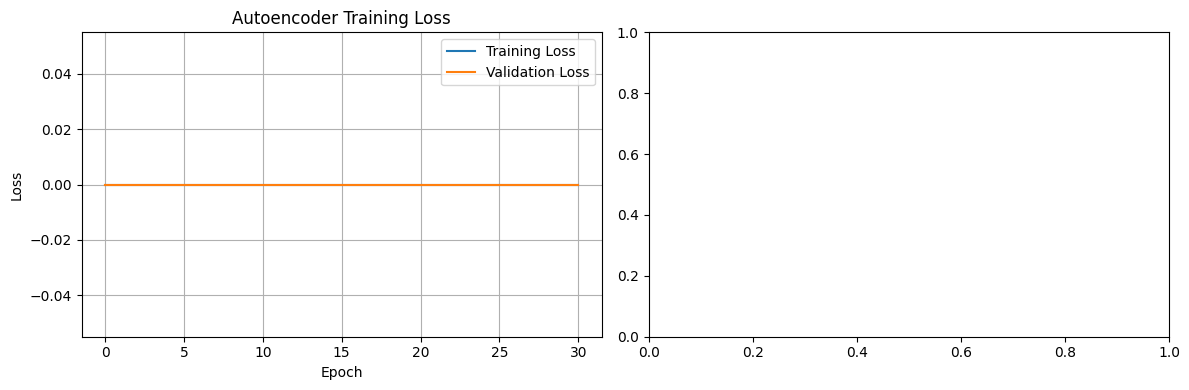


Imputing missing values...
Imputing missing values using trained autoencoder...
Imputed 3382.0 missing values
Imputing missing values using trained autoencoder...
Imputed 857.0 missing values
Imputing missing values using trained autoencoder...
Imputed 1815.0 missing values

STAGE 2: LSTM Survival Prediction

Sequence shapes:
  Training sequences: (1503, 3, 68), labels: (1503, 2)
  Validation sequences: (376, 3, 68), labels: (376, 2)
  Test sequences: (805, 3, 68), labels: (805, 2)

Training LSTM Autoencoder for feature extraction...
LSTM Autoencoder architecture:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 3, 68)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 3, 64)          │        34,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 3, 32)          │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 3, 64)          │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 3, 68)          │         4,420 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,036 (328.27 KB)

 Trainable params: 84,036 (328.27 KB)

 Non-trainable params: 0 (0.00 B)

None
Training LSTM autoencoder...
Epoch 1/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 2.2594 - mae: 0.4603 - val_loss: 1.5945 - val_mae: 0.4315 - learning_rate: 0.0010
Epoch 2/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4618 - mae: 0.4147 - val_loss: 1.3363 - val_mae: 0.3956 - learning_rate: 0.0010
Epoch 3/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2883 - mae: 0.3916 - val_loss: 1.2786 - val_mae: 0.3889 - learning_rate: 0.0010
Epoch 4/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2607 - mae: 0.3877 - val_loss: 1.2449 - val_mae: 0.3825 - learning_rate: 0.0010
Epoch 5/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2075 - mae: 0.3792 - val_loss: 1.2086 - val_mae: 0.3839 - learning_rate: 0.0010
Epoch 6/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1448 - mae: 0.3805 - val_loss: 1.1411 - val_mae: 0.3729 - learning_rate: 0.0010
Epoch 7/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.0892 - mae: 0.3688 - val_loss: 1.0462 - val_mae: 0.3592 - l

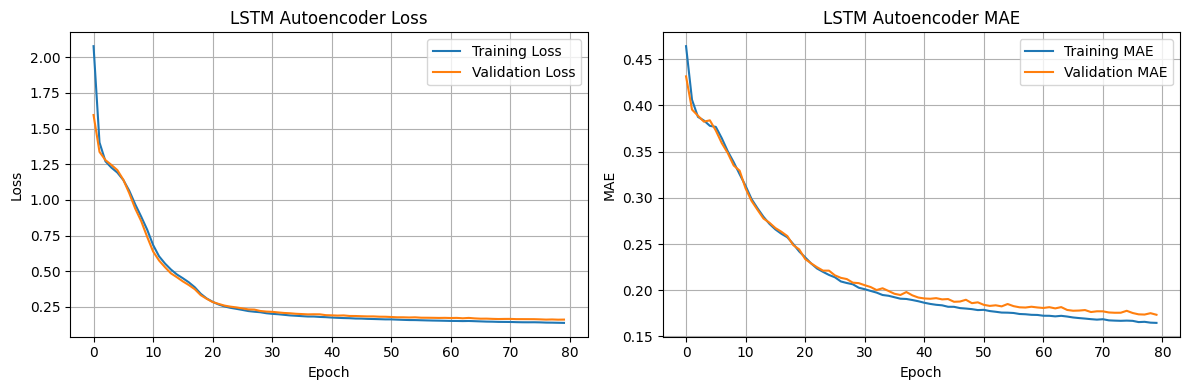


Extracting encoded features...

Training Survival LSTM...
Survival LSTM architecture:


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 1, 32)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 1, 128)    │     49,664 │ input_layer_2[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 1, 128)    │          0 │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_1  │ (None, 1, 1)      │        129 │ dropout[0][0]     │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ softmax (Softmax)   │ (None, 1, 1)      │          0 │ time_distributed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 1, 128)    │          0 │ dropout[0][0],    │
│                     │                   │            │ softmax[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 128)       │          0 │ multiply[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │      8,256 │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_8[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 32)        │      2,080 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_9[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ survival_time       │ (None, 1)         │         33 │ batch_normalizat… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ event (Dense)       │ (None, 1)         │         33 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 60,579 (236.64 KB)

 Trainable params: 60,387 (235.89 KB)

 Non-trainable params: 192 (768.00 B)

None
Training Survival LSTM...
Epoch 1/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - event_accuracy: 0.4887 - event_auc: 0.5003 - event_loss: 0.9177 - loss: 20043.8477 - survival_time_loss: 33405.5781 - survival_time_mae: 137.4707 - survival_time_root_mean_squared_error: 182.7610 - val_event_accuracy: 0.1383 - val_event_auc: 0.6310 - val_event_loss: 0.7535 - val_loss: 20055.5020 - val_survival_time_loss: 33769.9883 - val_survival_time_mae: 134.3020 - val_survival_time_root_mean_squared_error: 182.8260 - learning_rate: 5.0000e-04
Epoch 2/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - event_accuracy: 0.5125 - event_auc: 0.5249 - event_loss: 0.8451 - loss: 18386.6348 - survival_time_loss: 30643.9570 - survival_time_mae: 130.9561 - survival_time_root_mean_squared_error: 174.6964 - val_event_accuracy: 0.1782 - val_event_auc: 0.4618 - val_event_loss: 0.7779 - val_loss: 19974.1211 - val_survival_time_loss: 33634.5352 - val_survival_time_mae: 133.9488 - val_survival_time_root_mean_squared_error:

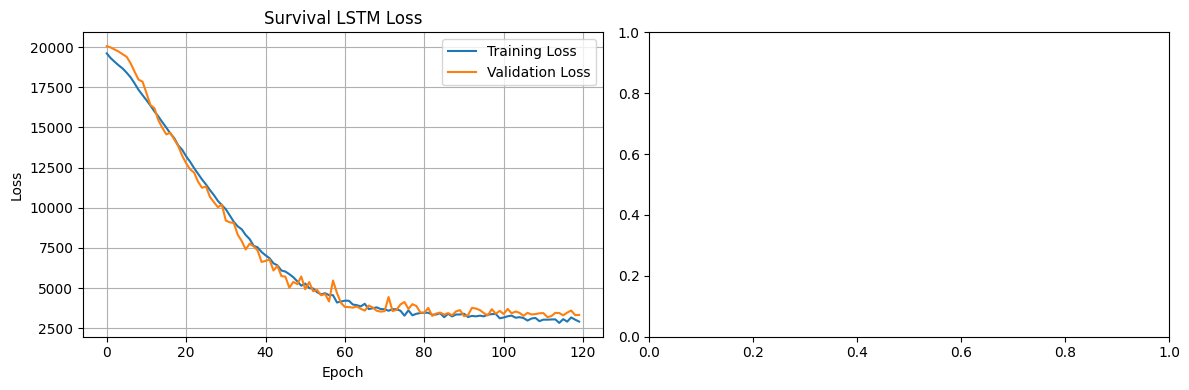


MODEL EVALUATION
Evaluating model...

Evaluation Results:
loss: 3463.4062
compile_metrics: 5848.8569
survival_time_loss: 0.4181
event_loss: 0.8609

Detailed Performance Metrics:

Survival Time Prediction:
  MSE: 5772.0717
  MAE: 50.9065
  RMSE: 75.9742

Event Prediction:
  Accuracy: 0.8609
  AUC-ROC: 0.5587


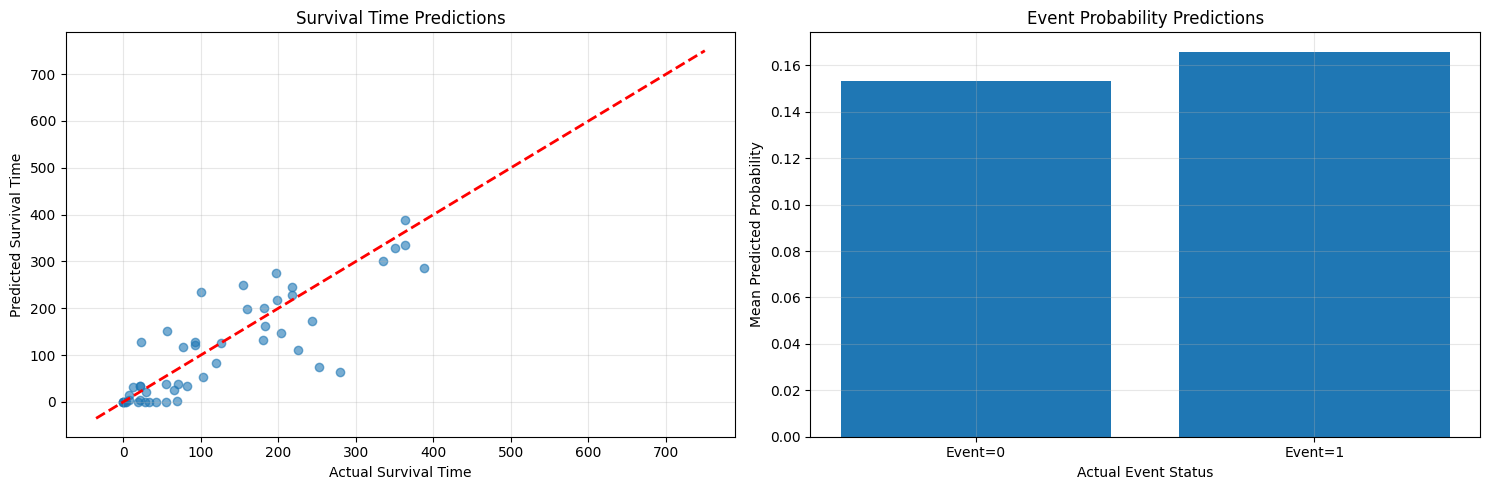


PIPELINE COMPLETED SUCCESSFULLY!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

class AdvancedMissingDataHandler:
    def __init__(self):
        self.scaler = StandardScaler()
        self.label_encoders = {}
        self.feature_stats = {}
        self.missing_mask = None
        self.numeric_cols = None
        self.categorical_cols = None

    def analyze_data_types(self, df):
        """Analyze data types and identify numeric vs categorical columns"""
        numeric_cols = []
        categorical_cols = []

        for col in df.columns:
            if pd.api.types.is_numeric_dtype(df[col]):
                # Check if it's actually categorical (limited unique values)
                unique_ratio = df[col].nunique() / len(df[col])
                if unique_ratio < 0.05 and df[col].nunique() < 20:
                    categorical_cols.append(col)
                else:
                    numeric_cols.append(col)
            else:
                categorical_cols.append(col)

        print(f"Numeric columns: {len(numeric_cols)}")
        print(f"Categorical columns: {len(categorical_cols)}")

        return numeric_cols, categorical_cols

    def encode_categorical(self, df, categorical_cols):
        """Encode categorical variables"""
        df_encoded = df.copy()

        for col in categorical_cols:
            if col in df.columns:
                # Fill missing categorical values with a special value
                df_encoded[col] = df[col].fillna('MISSING_CAT')

                # Explicitly convert to string to prevent TypeError with mixed types
                df_encoded[col] = df_encoded[col].astype(str)

                # Create or use existing label encoder
                if col not in self.label_encoders:
                    self.label_encoders[col] = LabelEncoder()
                    self.label_encoders[col].fit(df_encoded[col])

                # Transform the column
                df_encoded[col] = self.label_encoders[col].transform(df_encoded[col])

        return df_encoded

    def create_missing_mask(self, df):
        """Create mask indicating missing values"""
        return df.isnull().astype(int).values

    def create_input_with_missing_indicators(self, df, numeric_cols, categorical_cols):
        """Create input with missing indicators and placeholder values"""
        df_processed = df.copy()

        # Store statistics for numeric columns
        for col in numeric_cols:
            if col in df.columns:
                self.feature_stats[col] = {
                    'mean': df[col].mean(),
                    'median': df[col].median(),
                    'std': df[col].std(),
                    'min': df[col].min(),
                    'max': df[col].max()
                }

        # Process numeric columns
        for col in numeric_cols:
            if col in df.columns:
                # Convert infinite values to NaN before filling with placeholder
                df_processed[col] = df_processed[col].replace([np.inf, -np.inf], np.nan)

                # Create missing indicator
                indicator_name = f"{col}_missing"
                df_processed[indicator_name] = df[col].isnull().astype(int)

                # Fill with placeholder (scaled zero)
                placeholder = 0  # Will be scaled later
                df_processed[col] = df_processed[col].fillna(placeholder)

        # Process categorical columns
        df_processed = self.encode_categorical(df_processed, categorical_cols)

        # Create missing indicators for categorical columns
        for col in categorical_cols:
            if col in df.columns:
                # Create missing indicator (after encoding)
                indicator_name = f"{col}_missing"
                df_processed[indicator_name] = (df[col].isnull()).astype(int)

        return df_processed

    def prepare_for_autoencoder(self, df, feature_cols):
        """Prepare data for autoencoder imputation"""
        # Identify numeric and categorical columns
        self.numeric_cols, self.categorical_cols = self.analyze_data_types(df[feature_cols])

        print(f"\nPreparing {len(feature_cols)} features for autoencoder imputation:")
        print(f"- Numeric features: {len(self.numeric_cols)}")
        print(f"- Categorical features: {len(self.categorical_cols)}")

        # Create input with missing indicators
        df_processed = self.create_input_with_missing_indicators(
            df, self.numeric_cols, self.categorical_cols
        )

        # Get all columns including missing indicators
        all_columns = list(feature_cols)
        for col in feature_cols:
            if col in df_processed.columns and f"{col}_missing" not in all_columns:
                all_columns.append(f"{col}_missing")

        # Ensure all_columns has only unique values and correct order (optional, but good practice)
        # It's important that all_columns here matches the order of columns in X
        # For simplicity, we'll rely on df_processed column order for X and align mask to it
        # Let's ensure df_processed has all_columns in the right order for X creation
        # The next line was already implicitly sorting them, let's make it explicit
        all_columns = [col for col in df_processed.columns if col in set(all_columns)]

        # Scale numeric features (including those with placeholders)
        numeric_features_to_scale = [col for col in self.numeric_cols if col in df_processed.columns]
        if numeric_features_to_scale:
            df_processed[numeric_features_to_scale] = self.scaler.fit_transform(
                df_processed[numeric_features_to_scale]
            )

        # Create final feature matrix
        X = df_processed[all_columns].values

        # --- Start of modifications for the missing mask ---
        # Create a new DataFrame for the missing mask, initialized with zeros
        full_missing_mask_df = pd.DataFrame(0, index=df_processed.index, columns=all_columns, dtype=np.float32)

        # Populate the mask for original features
        for original_col in feature_cols:
            if original_col in full_missing_mask_df.columns:
                full_missing_mask_df[original_col] = df[original_col].isnull().astype(np.float32)

        # Assign the values of the full_missing_mask_df to self.missing_mask
        self.missing_mask = full_missing_mask_df.values
        # --- End of modifications ---

        print(f"Final feature matrix shape: {X.shape}")
        print(f"Missing mask shape: {self.missing_mask.shape}")

        return X, all_columns


class DenoisingAutoencoderImputer:
    def __init__(self, input_dim, encoding_dim=32, noise_factor=0.1):
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim
        self.noise_factor = noise_factor
        self.autoencoder = None
        self.history = None

    def build_autoencoder(self):
        """Build a denoising autoencoder for imputation"""
        # Input layer
        input_layer = layers.Input(shape=(self.input_dim,))

        # Add noise for denoising (during training only)
        noisy_input = layers.GaussianNoise(self.noise_factor)(input_layer)

        # Encoder
        encoded = layers.Dense(128, activation='relu')(noisy_input)
        encoded = layers.BatchNormalization()(encoded)
        encoded = layers.Dense(64, activation='relu')(encoded)
        encoded = layers.BatchNormalization()(encoded)
        encoded = layers.Dense(self.encoding_dim, activation='relu')(encoded)

        # Decoder
        decoded = layers.Dense(64, activation='relu')(encoded)
        decoded = layers.BatchNormalization()(decoded)
        decoded = layers.Dense(128, activation='relu')(decoded)
        decoded = layers.BatchNormalization()(decoded)
        decoded = layers.Dense(self.input_dim, activation='linear')(decoded)

        # Create model
        self.autoencoder = models.Model(inputs=input_layer, outputs=decoded)

        # Compile with custom loss
        self.autoencoder.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='mse',
            metrics=['mae']
        )

        print("Denoising Autoencoder architecture:")
        print(self.autoencoder.summary())

        return self.autoencoder

    def custom_loss(self, y_true, y_pred, missing_mask):
        """Custom loss that only considers non-missing values"""
        # Calculate squared error
        squared_error = tf.square(y_true - y_pred)

        # Mask out missing values (where mask == 1)
        valid_mask = tf.cast(tf.equal(missing_mask, 0), tf.float32)

        # Apply mask
        masked_error = squared_error * valid_mask

        # Calculate mean over non-missing values
        loss = tf.reduce_sum(masked_error) / (tf.reduce_sum(valid_mask) + 1e-8)

        return loss

    def train_with_missing_awareness(self, X_train, missing_mask_train, X_val, missing_mask_val,
                                     epochs=150, batch_size=64):
        """Train autoencoder with missing-aware loss"""

        # Create a custom training loop to handle missing values
        class MissingAwareModel(keras.Model):
            def train_step(self, data):
                # Unpack data: `data` yields `(x_features_batch, (y_true_batch, missing_mask_batch))`
                x_features, (y_true, missing_mask) = data

                with tf.GradientTape() as tape:
                    # Forward pass: model predicts based on x_features
                    y_pred = self(x_features, training=True)

                    # Custom loss only on observed values (using y_true and missing_mask)
                    valid_mask = tf.cast(tf.equal(missing_mask, 0), tf.float32)
                    loss = tf.reduce_sum(tf.square(y_true - y_pred) * valid_mask) / (tf.reduce_sum(valid_mask) + 1e-8)

                # Compute gradients
                trainable_vars = self.trainable_variables
                gradients = tape.gradient(loss, trainable_vars)

                # Update weights
                self.optimizer.apply_gradients(zip(gradients, trainable_vars))

                return {"loss": loss}

            def test_step(self, data):
                # Unpack data for validation: `data` yields `(x_features_batch, (y_true_batch, missing_mask_batch))`
                x_features, (y_true, missing_mask) = data

                # Forward pass
                y_pred = self(x_features, training=False)

                # Custom loss only on observed values
                valid_mask = tf.cast(tf.equal(missing_mask, 0), tf.float32)
                loss = tf.reduce_sum(tf.square(y_true - y_pred) * valid_mask) / (tf.reduce_sum(valid_mask) + 1e-8)

                # Here, we will just return the custom loss to monitor 'val_loss'
                return {"loss": loss}

        # Create model wrapper
        model_wrapper = MissingAwareModel(inputs=self.autoencoder.input,
                                         outputs=self.autoencoder.output)
        # Compile with a dummy loss, as the actual loss calculation is handled in train_step and test_step
        # This satisfies Keras's requirement for a loss argument.
        model_wrapper.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())

        # Prepare training data: x is X_train, y is (X_train, missing_mask_train)
        train_data = tf.data.Dataset.from_tensor_slices(
            (X_train, (X_train, missing_mask_train))
        ).batch(batch_size).shuffle(1000)

        val_data = tf.data.Dataset.from_tensor_slices(
            (X_val, (X_val, missing_mask_val))
        ).batch(batch_size)

        # Callbacks
        early_stopping = callbacks.EarlyStopping(
            monitor='val_loss',
            patience=30,
            restore_best_weights=True,
            verbose=1
        )

        reduce_lr = callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=15,
            min_lr=1e-6,
            verbose=1
        )

        print("Training denoising autoencoder with missing-aware loss...")

        # Train model
        history = model_wrapper.fit(
            train_data,
            validation_data=val_data,
            epochs=epochs,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )

        self.history = history
        self.model_wrapper = model_wrapper

        # Plot training history
        self.plot_training_history()

        return history

    def plot_training_history(self):
        """Plot training history"""
        if self.history is None:
            return

        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # Plot loss
        axes[0].plot(self.history.history['loss'], label='Training Loss')
        if 'val_loss' in self.history.history:
            axes[0].plot(self.history.history['val_loss'], label='Validation Loss')
        axes[0].set_title('Autoencoder Training Loss')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Loss')
        axes[0].legend()
        axes[0].grid(True)

        plt.tight_layout()
        plt.show()

    def impute_missing_values(self, X, missing_mask):
        """Impute missing values using trained autoencoder"""
        print("Imputing missing values using trained autoencoder...")

        # Get predictions
        X_imputed = self.autoencoder.predict(X, verbose=0)

        # Convert X to a NumPy array to use the .copy() method and array-like indexing
        X_np = X.numpy() if isinstance(X, tf.Tensor) else X

        # Only replace missing values (where missing_mask == 1)
        X_final = X_np.copy()
        X_final[missing_mask == 1] = X_imputed[missing_mask == 1]

        # Calculate imputation statistics
        n_imputed = np.sum(missing_mask)
        print(f"Imputed {n_imputed} missing values")

        return X_final


class SurvivalDataPreprocessor:
    def __init__(self):
        self.feature_stats = {}
        self.selected_features = []
        self.missing_handler = AdvancedMissingDataHandler()
        self.autoencoder_imputer = None

    def analyze_missing_data(self, df):
        """Comprehensive analysis of missing data patterns"""
        print("=== MISSING DATA ANALYSIS ===")

        total_rows = len(df)
        missing_summary = pd.DataFrame({
            'missing_count': df.isnull().sum(),
            'missing_percentage': (df.isnull().sum() / total_rows) * 100
        }).sort_values('missing_percentage', ascending=False)

        print("Missing data by column:")
        print(missing_summary[missing_summary['missing_count'] > 0])

        plt.figure(figsize=(15, 10))
        missing_cols = missing_summary[missing_summary['missing_count'] > 0].index
        if len(missing_cols) > 0:
            sns.heatmap(df[missing_cols].isnull(), cbar=True, yticklabels=False, cmap='viridis')
            plt.title('Missing Data Pattern')
            plt.tight_layout()
            plt.show()

        return missing_summary

    def handle_missing_survival_data(self, df):
        """Handle missing values in survival outcomes"""
        df_clean = df.copy()

        survival_vars = ['VISDAY', 'os_event']
        for var in survival_vars:
            if var in df.columns:
                missing_count = df[var].isnull().sum()
                if missing_count > 0:
                    print(f"WARNING: {missing_count} missing values in {var}")
                    df_clean = df_clean.dropna(subset=[var])
                    print(f"Removed {missing_count} rows with missing {var}")

        return df_clean

    def select_features(self, df, max_missing_percentage=50):
        """Select features for analysis"""
        candidate_features = [
            'AGE', 'VISDAY', 'cycle_number', 'total_cycles',
            'anytarget', 'anynontarget', 'total_ae_events', 'serious_ae_count',
            'grade3_plus_count', 'any_grade3_plus', 'total_body_systems',
            'treatment_related_count', 'any_treatment_related', 'grade1_count',
            'grade2_count', 'grade3_count', 'grade4_count', 'drug_interrupted',
            'drug_reduced', 'drug_withdrawn', "drug_not_changed", "other_drug_interrupted",
            "other_drug_reduced", "other_drug_withdrawn", "concomitant_treatment_given",
            'cum_any_grade3_plus', 'cum_any_treatment_related', "cum_drug_withdrawn",
            "cum_other_drug_withdrawn", "cum_concomitant_treatment", "ongoing_ae_count",
            "mean_ae_duration", "max_ae_duration", "most_recent_ae_term", "most_recent_ae_severity"
        ]

        # Filter to available columns
        available_features = [col for col in candidate_features if col in df.columns]

        # Remove features with text/categorical data that can't be imputed easily
        text_features = ['most_recent_ae_term']
        features_to_keep = [f for f in available_features if f not in text_features]

        print(f"Selected {len(features_to_keep)} features for modeling")

        self.selected_features = features_to_keep
        return features_to_keep

    def preprocess_for_autoencoder_imputation(self, df):
        """Complete preprocessing pipeline with autoencoder imputation"""
        print("Starting advanced preprocessing with autoencoder imputation...")

        # Step 1: Handle survival data
        df_clean = self.handle_missing_survival_data(df)
        print(f"Data after handling missing survival outcomes: {len(df_clean)} rows")

        # Step 2: Select features
        features = self.select_features(df_clean)

        # Step 3: Analyze missing patterns
        missing_summary = self.analyze_missing_data(df_clean[features])

        # Step 4: Prepare for autoencoder imputation
        X_prepared, all_columns = self.missing_handler.prepare_for_autoencoder(
            df_clean, features
        )

        # Step 5: Get missing mask
        missing_mask = self.missing_handler.missing_mask

        # Step 6: Add survival variables back
        survival_data = df_clean[['VISDAY', 'os_event']].values

        return X_prepared, missing_mask, survival_data, all_columns, features


class AutoencoderLSTM_Survival:
    def __init__(self, input_dim, encoding_dim=32, sequence_length=3, lstm_units=64):
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim
        self.sequence_length = sequence_length
        self.lstm_units = lstm_units
        self.autoencoder = None
        self.encoder = None
        self.lstm_model = None
        self.history_autoencoder = None
        self.history_lstm = None

    def build_lstm_autoencoder(self):
        """Build LSTM-based autoencoder for time series imputation"""
        # Input layer
        input_layer = layers.Input(shape=(self.sequence_length, self.input_dim))

        # Encoder LSTM
        encoded = layers.LSTM(self.encoding_dim * 2, return_sequences=True)(input_layer)
        encoded = layers.LSTM(self.encoding_dim, return_sequences=False)(encoded)

        # Repeat vector for decoder
        repeated = layers.RepeatVector(self.sequence_length)(encoded)

        # Decoder LSTM
        decoded = layers.LSTM(self.encoding_dim, return_sequences=True)(repeated)
        decoded = layers.LSTM(self.encoding_dim * 2, return_sequences=True)(decoded)
        decoded = layers.TimeDistributed(layers.Dense(self.input_dim))(decoded)

        # Create autoencoder
        self.autoencoder = models.Model(inputs=input_layer, outputs=decoded)

        # Create encoder
        self.encoder = models.Model(inputs=input_layer, outputs=encoded)

        # Compile
        self.autoencoder.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='mse',
            metrics=['mae']
        )

        print("LSTM Autoencoder architecture:")
        print(self.autoencoder.summary())

        return self.autoencoder, self.encoder

    def build_survival_lstm(self):
        """Build LSTM model for survival prediction"""
        # Input layer: Expects (sequence_length, encoding_dim) after feature extraction
        input_layer = layers.Input(shape=(self.sequence_length, self.input_dim)) # input_dim here will be the feature_dim = encoding_dim of the AE-LSTM

        # Bidirectional LSTM layer
        lstm_sequence_output = layers.Bidirectional(layers.LSTM(self.lstm_units, return_sequences=True))(input_layer)
        lstm_sequence_output = layers.Dropout(0.3)(lstm_sequence_output)

        # --- Refactored Attention Mechanism ---
        # Calculate attention scores
        attention_scores = layers.TimeDistributed(layers.Dense(1, activation='tanh'))(lstm_sequence_output)
        # Calculate attention weights
        attention_weights = layers.Softmax(axis=1)(attention_scores)
        # Apply attention weights to the LSTM output
        context_vector = layers.Multiply()([lstm_sequence_output, attention_weights])
        # Sum the context vector along the sequence dimension to get a single representation
        sent_representation = layers.Lambda(lambda xin: tf.reduce_sum(xin, axis=1))(context_vector)
        # --- End Refactored Attention Mechanism ---

        # Dense layers
        dense_out = layers.Dense(64, activation='relu')(sent_representation)
        dense_out = layers.BatchNormalization()(dense_out)
        dense_out = layers.Dropout(0.2)(dense_out)
        dense_out = layers.Dense(32, activation='relu')(dense_out)
        dense_out = layers.BatchNormalization()(dense_out)

        # Output layers
        output_survival_time = layers.Dense(1, activation='relu', name='survival_time')(dense_out)
        output_event = layers.Dense(1, activation='sigmoid', name='event')(dense_out)

        # Create model
        self.lstm_model = models.Model(
            inputs=input_layer,
            outputs=[output_survival_time, output_event]
        )

        # Compile
        self.lstm_model.compile(
            optimizer=Adam(learning_rate=0.0005),
            loss={
                'survival_time': 'mse',
                'event': 'binary_crossentropy'
            },
            loss_weights={
                'survival_time': 0.6,
                'event': 0.4
            },
            metrics={
                'survival_time': ['mae', tf.keras.metrics.RootMeanSquaredError()],
                'event': ['accuracy', tf.keras.metrics.AUC()]
            }
        )

        print("Survival LSTM architecture:")
        print(self.lstm_model.summary())

        return self.lstm_model

    def create_sequences(self, X, y, sequence_length):
        """Create sequences for LSTM"""
        sequences = []
        labels = []

        for i in range(len(X) - sequence_length + 1):
            sequences.append(X[i:i+sequence_length])
            # Use the last time point's label
            labels.append(y[i+sequence_length-1])

        return np.array(sequences), np.array(labels)

    def train_lstm_autoencoder(self, X_train_seq, X_val_seq, epochs=100, batch_size=32):
        """Train LSTM autoencoder"""
        early_stopping = callbacks.EarlyStopping(
            monitor='val_loss',
            patience=25,
            restore_best_weights=True
        )

        reduce_lr = callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=10,
            min_lr=1e-6
        )

        print("Training LSTM autoencoder...")
        self.history_autoencoder = self.autoencoder.fit(
            X_train_seq, X_train_seq,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_val_seq, X_val_seq),
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )

        self.plot_training_history(self.history_autoencoder, "LSTM Autoencoder")

        return self.history_autoencoder

    def train_survival_lstm(self, X_train_encoded_seq, y_train, X_val_encoded_seq, y_val, epochs=150, batch_size=32):
        """Train survival LSTM"""
        early_stopping = callbacks.EarlyStopping(
            monitor='val_loss',
            patience=30,
            restore_best_weights=True
        )

        reduce_lr = callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=15,
            min_lr=1e-6
        )

        # Convert y to dictionary format for multi-output model
        y_train_dict = {
            'survival_time': y_train[:, 0],
            'event': y_train[:, 1]
        }

        y_val_dict = {
            'survival_time': y_val[:, 0],
            'event': y_val[:, 1]
        }

        print("Training Survival LSTM...")
        self.history_lstm = self.lstm_model.fit(
            X_train_encoded_seq,
            y_train_dict,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_val_encoded_seq, y_val_dict),
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )

        self.plot_training_history(self.history_lstm, "Survival LSTM")

        return self.history_lstm

    def plot_training_history(self, history, model_name):
        """Plot training history"""
        if history is None:
            return

        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # Plot loss
        axes[0].plot(history.history['loss'], label='Training Loss')
        if 'val_loss' in history.history:
            axes[0].plot(history.history['val_loss'], label='Validation Loss')
        axes[0].set_title(f'{model_name} Loss')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Loss')
        axes[0].legend()
        axes[0].grid(True)

        # Plot additional metrics
        metric_to_plot = None
        for metric in ['mae', 'accuracy', 'root_mean_squared_error']:
            if metric in history.history:
                metric_to_plot = metric
                break

        if metric_to_plot:
            axes[1].plot(history.history[metric_to_plot],
                        label=f'Training {metric_to_plot.upper()}')
            if f'val_{metric_to_plot}' in history.history:
                axes[1].plot(history.history[f'val_{metric_to_plot}'],
                           label=f'Validation {metric_to_plot.upper()}')
            axes[1].set_title(f'{model_name} {metric_to_plot.upper()}')
            axes[1].set_xlabel('Epoch')
            axes[1].set_ylabel(metric_to_plot.upper())
            axes[1].legend()
            axes[1].grid(True)

        plt.tight_layout()
        plt.show()

    def evaluate(self, X_test_seq, y_test):
        """Evaluate the model"""
        if self.lstm_model is None:
            raise ValueError("Model not trained yet.")

        print("Evaluating model...")

        # Convert y_test to dictionary
        y_test_dict = {
            'survival_time': y_test[:, 0],
            'event': y_test[:, 1]
        }

        results = self.lstm_model.evaluate(X_test_seq, y_test_dict, verbose=0)

        print("\nEvaluation Results:")
        for i, metric in enumerate(self.lstm_model.metrics_names):
            print(f"{metric}: {results[i]:.4f}")

        return results

    def predict(self, X_seq):
        """Make predictions"""
        if self.lstm_model is None:
            raise ValueError("Model not trained yet.")

        predictions = self.lstm_model.predict(X_seq, verbose=0)
        return predictions


def train_complete_pipeline():
    """Complete training pipeline with autoencoder imputation"""
    print("Starting Autoencoder Imputation + LSTM Survival Prediction Pipeline")
    print("=" * 70)

    try:
        # Load data
        print("Loading data...")
        pcdata = pd.read_csv('pcdata.csv')

        # Initialize preprocessor
        preprocessor = SurvivalDataPreprocessor()

        # Preprocess with autoencoder imputation
        print("\n" + "=" * 70)
        print("STAGE 1: Autoencoder-based Imputation")
        print("=" * 70)

        X_prepared, missing_mask, survival_data, all_columns, features = \
            preprocessor.preprocess_for_autoencoder_imputation(pcdata)

        # Split data
        X_train, X_test, mask_train, mask_test, y_train, y_test = train_test_split(
            X_prepared, missing_mask, survival_data,
            test_size=0.3, random_state=42
        )

        X_train, X_val, mask_train, mask_val, y_train, y_val = train_test_split(
            X_train, mask_train, y_train,
            test_size=0.2, random_state=42
        )

        print(f"\nData split:")
        print(f"  Training: {X_train.shape}")
        print(f"  Validation: {X_val.shape}")
        print(f"  Test: {X_test.shape}")

        # Initialize and train denoising autoencoder for imputation
        print("\nTraining Denoising Autoencoder for imputation...")
        autoencoder_imputer = DenoisingAutoencoderImputer(
            input_dim=X_train.shape[1],
            encoding_dim=32,
            noise_factor=0.1
        )

        autoencoder_imputer.build_autoencoder()

        # Explicitly cast data to tf.float32 to prevent dtype mismatch errors
        X_train_tf = tf.cast(X_train, tf.float32)
        mask_train_tf = tf.cast(mask_train, tf.float32)
        X_val_tf = tf.cast(X_val, tf.float32)
        mask_val_tf = tf.cast(mask_val, tf.float32)

        autoencoder_imputer.train_with_missing_awareness(
            X_train_tf, mask_train_tf,
            X_val_tf, mask_val_tf,
            epochs=100,
            batch_size=64
        )

        # Impute missing values
        print("\nImputing missing values...")
        # Ensure X is passed as a NumPy array or converted within the method
        X_train_imputed = autoencoder_imputer.impute_missing_values(X_train_tf, mask_train_tf)
        X_val_imputed = autoencoder_imputer.impute_missing_values(X_val_tf, mask_val_tf)
        X_test_imputed = autoencoder_imputer.impute_missing_values(tf.cast(X_test, tf.float32), tf.cast(mask_test, tf.float32))

        preprocessor.autoencoder_imputer = autoencoder_imputer

        print("\n" + "=" * 70)
        print("STAGE 2: LSTM Survival Prediction")
        print("=" * 70)

        # Create sequences for LSTM
        sequence_length = 3

        # For simplicity, create synthetic sequences from the data
        # In real scenario, you would use actual time-series data
        def create_synthetic_sequences(X, y, seq_length):
            n_sequences = len(X) // seq_length
            X_seq = X[:n_sequences * seq_length].reshape(n_sequences, seq_length, -1)
            y_seq = y[:n_sequences * seq_length].reshape(n_sequences, seq_length, -1)
            # Use last time point for prediction
            y_seq = y_seq[:, -1, :]
            return X_seq, y_seq

        X_train_seq, y_train_seq = create_synthetic_sequences(X_train_imputed, y_train, sequence_length)
        X_val_seq, y_val_seq = create_synthetic_sequences(X_val_imputed, y_val, sequence_length)
        X_test_seq, y_test_seq = create_synthetic_sequences(X_test_imputed, y_test, sequence_length)

        print(f"\nSequence shapes:")
        print(f"  Training sequences: {X_train_seq.shape}, labels: {y_train_seq.shape}")
        print(f"  Validation sequences: {X_val_seq.shape}, labels: {y_val_seq.shape}")
        print(f"  Test sequences: {X_test_seq.shape}, labels: {y_test_seq.shape}")

        # Initialize and train LSTM autoencoder for feature extraction
        print("\nTraining LSTM Autoencoder for feature extraction...")
        lstm_ae = AutoencoderLSTM_Survival(
            input_dim=X_train_seq.shape[2],
            encoding_dim=32,
            sequence_length=sequence_length,
            lstm_units=64
        )

        lstm_ae.build_lstm_autoencoder()
        lstm_ae.train_lstm_autoencoder(
            X_train_seq, X_val_seq,
            epochs=80,
            batch_size=32
        )

        # Extract encoded features (output of the encoder is (batch_size, encoding_dim))
        print("\nExtracting encoded features...")
        X_train_encoded = lstm_ae.encoder.predict(X_train_seq, verbose=0)
        X_val_encoded = lstm_ae.encoder.predict(X_val_seq, verbose=0)
        X_test_encoded = lstm_ae.encoder.predict(X_test_seq, verbose=0)

        # Reshape for survival LSTM (add sequence dimension back for sequence_length=1)
        X_train_encoded_seq = X_train_encoded.reshape(-1, 1, X_train_encoded.shape[1])
        X_val_encoded_seq = X_val_encoded.reshape(-1, 1, X_val_encoded.shape[1])
        X_test_encoded_seq = X_test_encoded.reshape(-1, 1, X_test_encoded.shape[1])

        # Initialize and train Survival LSTM with the extracted features
        print("\nTraining Survival LSTM...")
        # Create a new instance for the survival model with sequence_length=1
        lstm_survival_model = AutoencoderLSTM_Survival(
            input_dim=lstm_ae.encoding_dim, # The input features to this model are the encoded features
            encoding_dim=lstm_ae.encoding_dim, # Can reuse or set as needed for internal layers, not directly used as input dim
            sequence_length=1, # Each encoded feature vector is a 'sequence' of length 1
            lstm_units=lstm_ae.lstm_units # Use the same LSTM units
        )
        lstm_survival_model.build_survival_lstm()
        lstm_survival_model.train_survival_lstm(
            X_train_encoded_seq, y_train_seq,
            X_val_encoded_seq, y_val_seq,
            epochs=120,
            batch_size=32
        )

        # Evaluate
        print("\n" + "=" * 70)
        print("MODEL EVALUATION")
        print("=" * 70)

        results = lstm_survival_model.evaluate(X_test_encoded_seq, y_test_seq)

        # Make predictions
        predictions = lstm_survival_model.predict(X_test_encoded_seq)

        # Calculate additional metrics
        from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, roc_auc_score

        # Survival time metrics
        y_pred_time = predictions[0].flatten()
        y_true_time = y_test_seq[:, 0]

        mse_time = mean_squared_error(y_true_time, y_pred_time)
        mae_time = mean_absolute_error(y_true_time, y_pred_time)
        rmse_time = np.sqrt(mse_time)

        # Event prediction metrics
        y_pred_event = predictions[1].flatten()
        y_pred_event_binary = (y_pred_event > 0.5).astype(int)
        y_true_event = y_test_seq[:, 1]

        event_accuracy = accuracy_score(y_true_event, y_pred_event_binary)
        event_auc = roc_auc_score(y_true_event, y_pred_event)

        print("\nDetailed Performance Metrics:")
        print(f"\nSurvival Time Prediction:")
        print(f"  MSE: {mse_time:.4f}")
        print(f"  MAE: {mae_time:.4f}")
        print(f"  RMSE: {rmse_time:.4f}")

        print(f"\nEvent Prediction:")
        print(f"  Accuracy: {event_accuracy:.4f}")
        print(f"  AUC-ROC: {event_auc:.4f}")

        # Plot some predictions
        plt.figure(figsize=(15, 5))

        # Plot survival time predictions
        plt.subplot(1, 2, 1)
        plt.scatter(y_true_time[:50], y_pred_time[:50], alpha=0.6)
        plt.plot([y_true_time.min(), y_true_time.max()],
                [y_true_time.min(), y_true_time.max()], 'r--', lw=2)
        plt.xlabel('Actual Survival Time')
        plt.ylabel('Predicted Survival Time')
        plt.title('Survival Time Predictions')
        plt.grid(True, alpha=0.3)

        # Plot event predictions
        plt.subplot(1, 2, 2)
        plt.bar(['Event=0', 'Event=1'],
                [np.mean(y_pred_event[y_true_event == 0]),
                 np.mean(y_pred_event[y_true_event == 1])])
        plt.xlabel('Actual Event Status')
        plt.ylabel('Mean Predicted Probability')
        plt.title('Event Probability Predictions')
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        return lstm_survival_model, preprocessor, results, predictions, y_test_seq

    except FileNotFoundError:
        print("Error: 'pcdata.csv' not found.")
        return None, None, None, None, None
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        import traceback
        traceback.print_exc()
        return None, None, None, None, None


# Run the pipeline
if __name__ == "__main__":
    model, preprocessor, results, predictions, y_test_seq = train_complete_pipeline()

    if model is not None:
        print("\n" + "=" * 70)
        print("PIPELINE COMPLETED SUCCESSFULLY!")
        print("=" * 70)


Starting Autoencoder Imputation + LSTM Survival Prediction Pipeline
Loading data...

STAGE 1: Autoencoder-based Imputation
Starting advanced preprocessing with autoencoder imputation...
Removed 65 rows with missing VISDAY
Data after handling missing survival outcomes: 8056 rows
Selected 34 features for modeling
=== MISSING DATA ANALYSIS ===
Missing data by column:
                         missing_count  missing_percentage
cycle_number                      1969           24.441410
total_body_systems                1019           12.648957
max_ae_duration                   1019           12.648957
most_recent_ae_severity           1019           12.648957
mean_ae_duration                  1019           12.648957
total_cycles                         9            0.111718


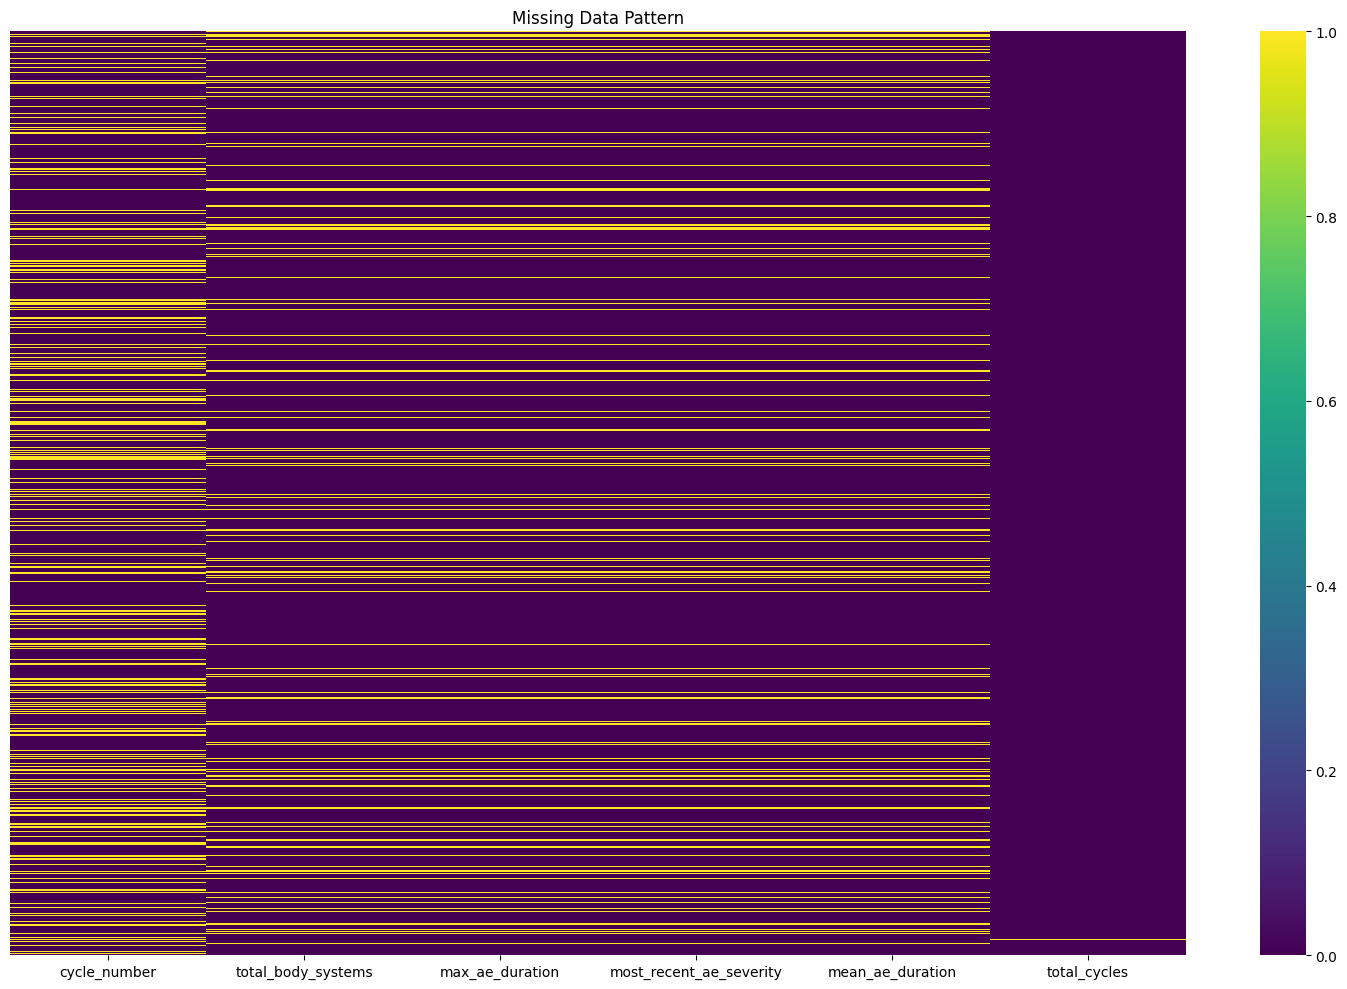

Numeric columns: 11
Categorical columns: 23

Preparing 34 features for autoencoder imputation:
- Numeric features: 11
- Categorical features: 23
Final feature matrix shape: (8056, 68)
Missing mask shape: (8056, 68)

Data split:
  Training: (4511, 68)
  Validation: (1128, 68)
  Test: (2417, 68)

Training Denoising Autoencoder for imputation...
Denoising Autoencoder architecture:


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 68)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_1                │ (None, 68)             │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 68)             │         8,772 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,908 (155.89 KB)

 Trainable params: 39,140 (152.89 KB)

 Non-trainable params: 768 (3.00 KB)

None
Training denoising autoencoder with missing-aware loss...
Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 1.3904 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.4334 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2181 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1705 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1539 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1409 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1258 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1122 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 9/100
71/71 ━━━━━━━━━━━

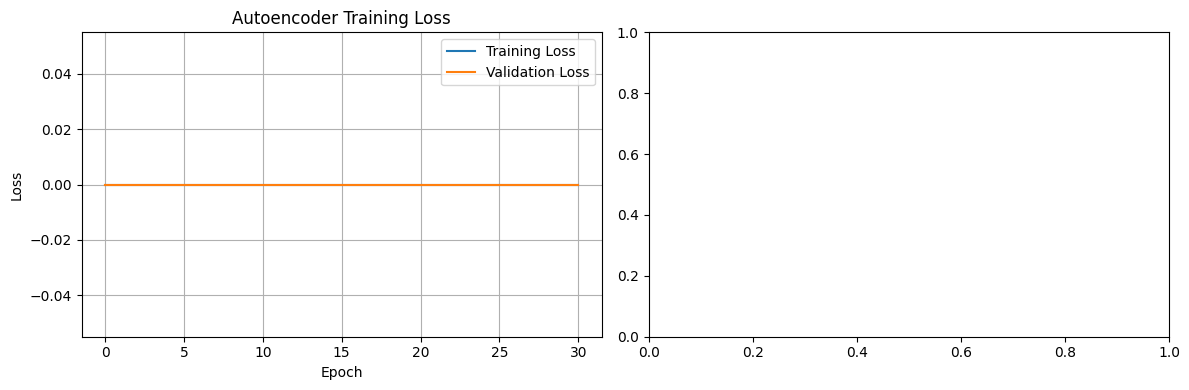


Imputing missing values...
Imputing missing values using trained autoencoder...
Imputed 3382.0 missing values
Imputing missing values using trained autoencoder...
Imputed 857.0 missing values
Imputing missing values using trained autoencoder...
Imputed 1815.0 missing values

STAGE 2: LSTM Survival Prediction and Risk Classification

Sequence shapes:
  Training sequences: (1503, 3, 68), labels: (1503, 2)
  Validation sequences: (376, 3, 68), labels: (376, 2)
  Test sequences: (805, 3, 68), labels: (805, 2)

Training LSTM Autoencoder for feature extraction...
LSTM Autoencoder architecture:


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 3, 68)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 3, 64)          │        34,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 3, 32)          │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 3, 64)          │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 3, 68)          │         4,420 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,036 (328.27 KB)

 Trainable params: 84,036 (328.27 KB)

 Non-trainable params: 0 (0.00 B)

None
Training LSTM autoencoder...
Epoch 1/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 2.4244 - mae: 0.4687 - val_loss: 1.8076 - val_mae: 0.4293 - learning_rate: 0.0010
Epoch 2/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7216 - mae: 0.4284 - val_loss: 1.5383 - val_mae: 0.4030 - learning_rate: 0.0010
Epoch 3/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.5267 - mae: 0.4043 - val_loss: 1.4790 - val_mae: 0.3967 - learning_rate: 0.0010
Epoch 4/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4265 - mae: 0.3936 - val_loss: 1.4319 - val_mae: 0.3954 - learning_rate: 0.0010
Epoch 5/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3651 - mae: 0.3870 - val_loss: 1.3712 - val_mae: 0.3924 - learning_rate: 0.0010
Epoch 6/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.3316 - mae: 0.3875 - val_loss: 1.2924 - val_mae: 0.3800 - learning_rate: 0.0010
Epoch 7/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.2391 - mae: 0.3769 - val_loss: 1.2019 - val_mae: 0.3762 - l

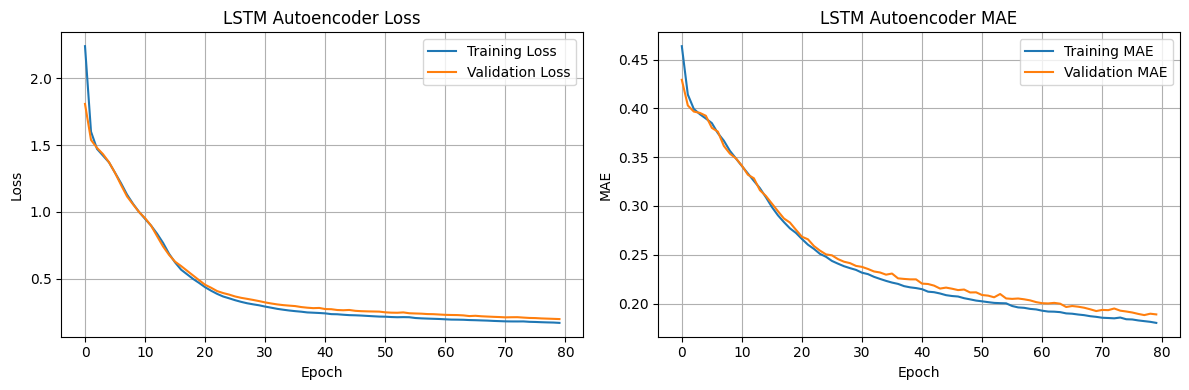


Extracting encoded features...

Training Survival LSTM...
Survival LSTM architecture:


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 1, 32)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 1, 128)    │     49,664 │ input_layer_5[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 1, 128)    │          0 │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_3  │ (None, 1, 1)      │        129 │ dropout_2[0][0]   │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ softmax_1 (Softmax) │ (None, 1, 1)      │          0 │ time_distributed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_1          │ (None, 1, 128)    │          0 │ dropout_2[0][0],  │
│ (Multiply)          │                   │            │ softmax_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 128)       │          0 │ multiply_1[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 64)        │      8,256 │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_18[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 32)        │      2,080 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_19[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ survival_time       │ (None, 1)         │         33 │ batch_normalizat… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ event (Dense)       │ (None, 1)         │         33 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 60,579 (236.64 KB)

 Trainable params: 60,387 (235.89 KB)

 Non-trainable params: 192 (768.00 B)

None
Training Survival LSTM...
Epoch 1/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - event_accuracy: 0.5082 - event_auc_1: 0.4405 - event_loss: 0.9405 - loss: 18645.5625 - survival_time_loss: 31075.4746 - survival_time_mae: 132.4458 - survival_time_root_mean_squared_error: 176.2441 - val_event_accuracy: 0.5665 - val_event_auc_1: 0.5514 - val_event_loss: 0.6909 - val_loss: 20006.9688 - val_survival_time_loss: 33689.3438 - val_survival_time_mae: 134.0472 - val_survival_time_root_mean_squared_error: 182.6047 - learning_rate: 5.0000e-04
Epoch 2/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - event_accuracy: 0.5232 - event_auc_1: 0.4696 - event_loss: 0.8508 - loss: 18947.2930 - survival_time_loss: 31577.9766 - survival_time_mae: 133.4663 - survival_time_root_mean_squared_error: 177.6628 - val_event_accuracy: 0.3191 - val_event_auc_1: 0.5501 - val_event_loss: 0.7376 - val_loss: 19877.6660 - val_survival_time_loss: 33474.1992 - val_survival_time_mae: 133.4376 - val_survival_time_root_mean_square

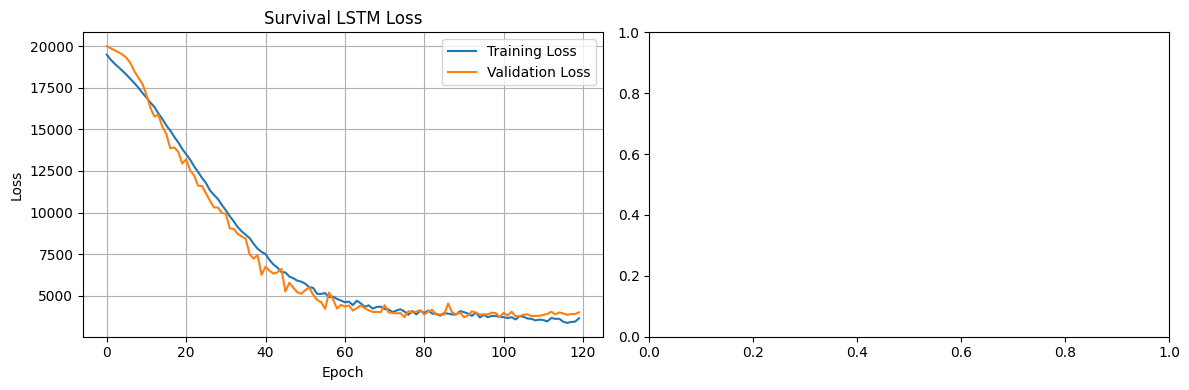


STAGE 3: Risk Classification Model Training
Risk Classification Model architecture:


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 3, 68)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_2     │ (None, 3, 128)    │     68,096 │ input_layer_6[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 3, 128)    │          0 │ bidirectional_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_4  │ (None, 3, 1)      │        129 │ dropout_4[0][0]   │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ softmax_2 (Softmax) │ (None, 3, 1)      │          0 │ time_distributed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_2          │ (None, 3, 128)    │          0 │ dropout_4[0][0],  │
│ (Multiply)          │                   │            │ softmax_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_2 (Lambda)   │ (None, 128)       │          0 │ multiply_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 32)        │      4,128 │ lambda_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_21[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 32)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 16)        │        528 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16)        │         64 │ dense_22[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ risk_score (Dense)  │ (None, 1)         │         17 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 73,090 (285.51 KB)

 Trainable params: 72,994 (285.13 KB)

 Non-trainable params: 96 (384.00 B)

None
Training Risk Classification Model...
Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.4941 - auc_2: 0.5001 - loss: 0.8655 - precision: 0.1340 - recall: 0.5022 - val_accuracy: 0.7314 - val_auc_2: 0.5198 - val_loss: 0.6823 - val_precision: 0.1818 - val_recall: 0.2692 - learning_rate: 5.0000e-04
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5314 - auc_2: 0.5131 - loss: 0.7318 - precision: 0.1389 - recall: 0.4368 - val_accuracy: 0.8511 - val_auc_2: 0.5329 - val_loss: 0.6580 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6314 - auc_2: 0.5042 - loss: 0.6615 - precision: 0.1434 - recall: 0.3813 - val_accuracy: 0.8617 - val_auc_2: 0.6190 - val_loss: 0.6256 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6736 - auc_2: 0.5290 - loss: 0.6130 - precision: 0.13

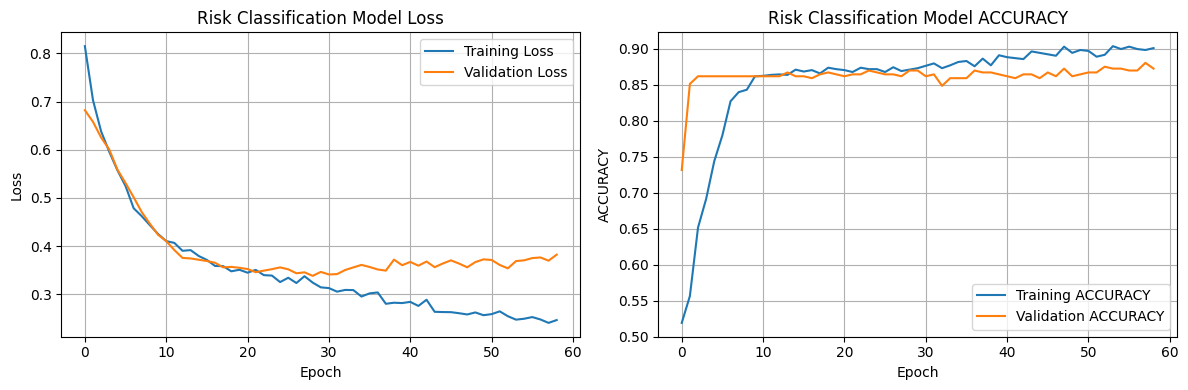


RISK MODEL EVALUATION
Evaluating risk classification model...

RISK CLASSIFICATION MODEL EVALUATION

Classification Report:
              precision    recall  f1-score   support

    No Event       0.88      0.98      0.93       696
       Event       0.53      0.15      0.23       109

    accuracy                           0.87       805
   macro avg       0.71      0.56      0.58       805
weighted avg       0.83      0.87      0.83       805

Confusion Matrix:
[[682  14]
 [ 93  16]]

Detailed Metrics:
Accuracy: 0.8671
AUC-ROC: 0.7628
Precision: 0.5333
Recall: 0.1468
F1-Score: 0.2302


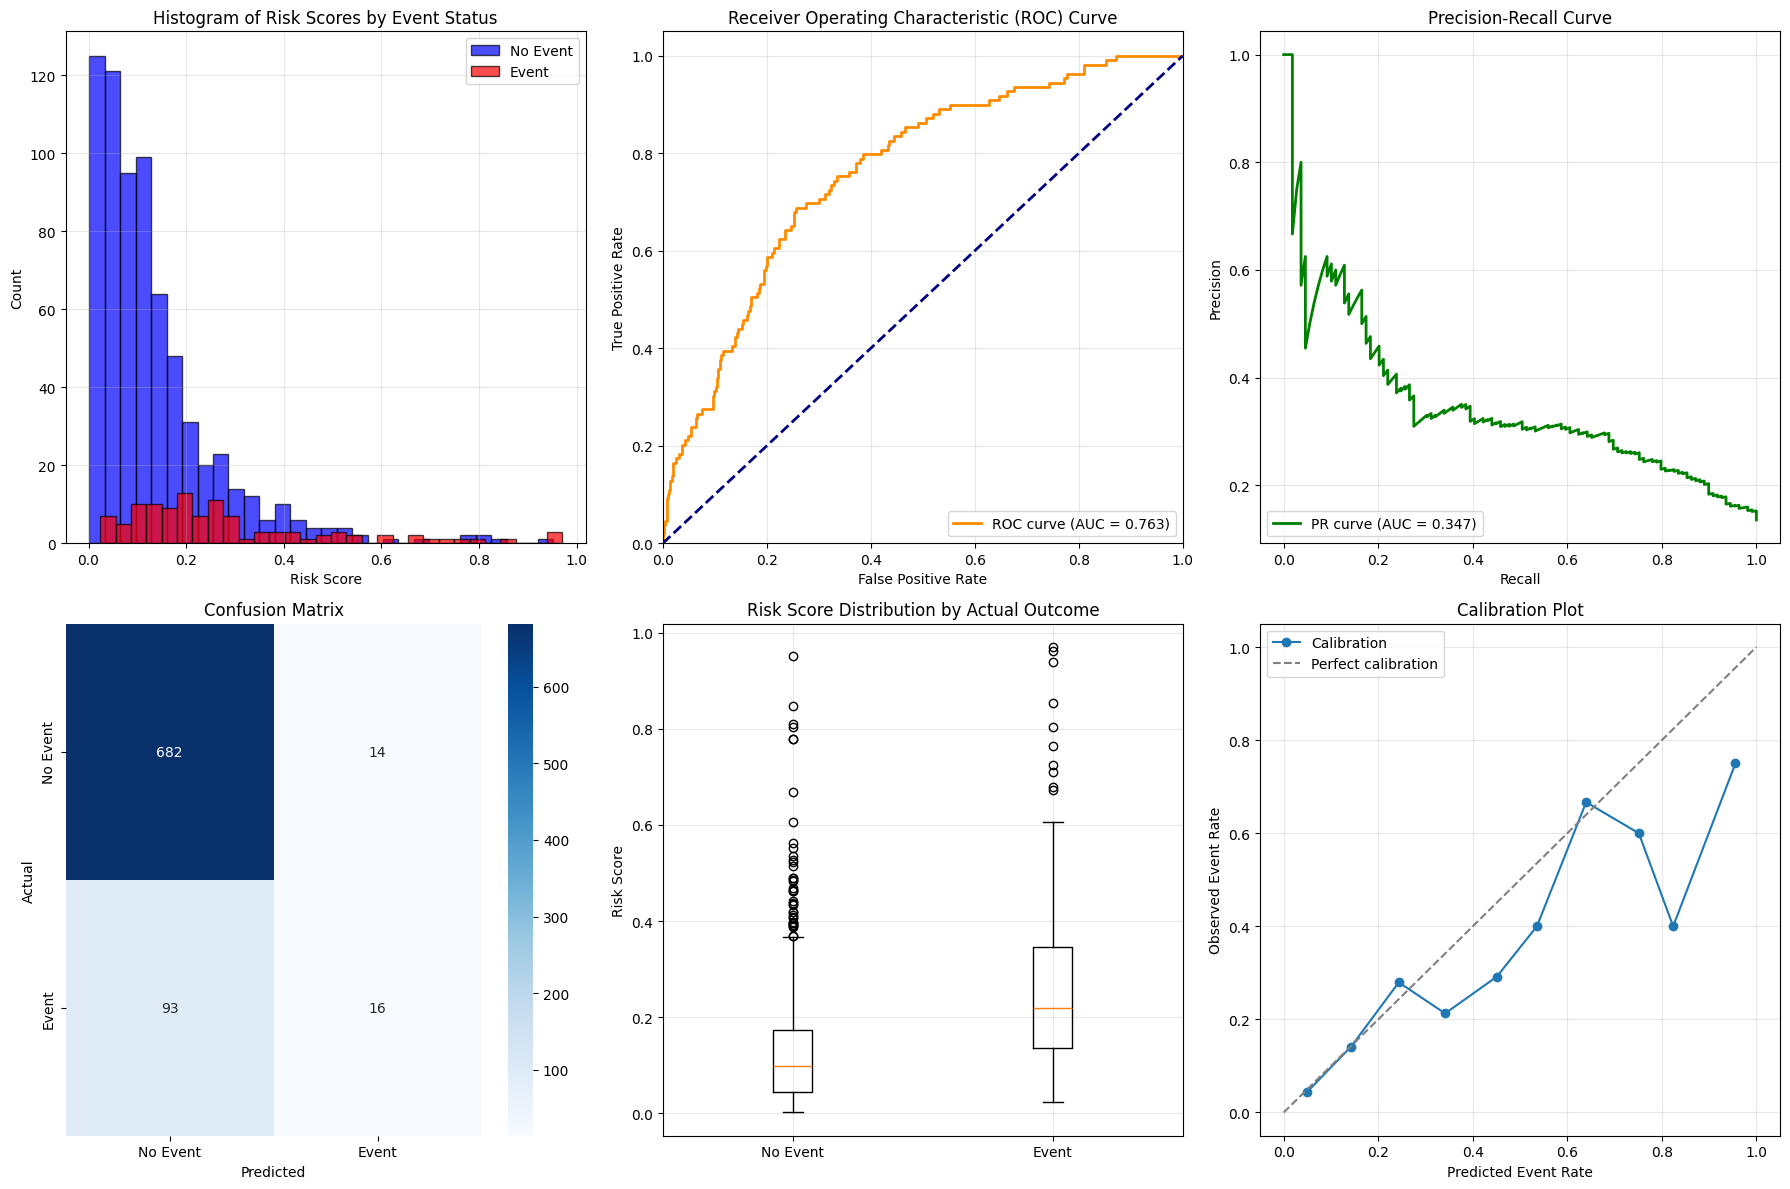


Risk Score Decile Analysis:
--------------------------------------------------
Decile 1 (0.002 - 0.021): 81 patients, Event rate: 0.0%
Decile 2 (0.021 - 0.040): 80 patients, Event rate: 6.2%
Decile 3 (0.040 - 0.062): 81 patients, Event rate: 3.7%
Decile 4 (0.062 - 0.086): 80 patients, Event rate: 3.8%
Decile 5 (0.086 - 0.108): 80 patients, Event rate: 8.8%
Decile 6 (0.108 - 0.132): 81 patients, Event rate: 11.1%
Decile 7 (0.132 - 0.176): 80 patients, Event rate: 13.8%
Decile 8 (0.176 - 0.227): 81 patients, Event rate: 25.9%
Decile 9 (0.227 - 0.325): 80 patients, Event rate: 26.2%
Decile 10 (0.325 - 0.970): 81 patients, Event rate: 35.8%

RISK SCORE DISTRIBUTION ANALYSIS


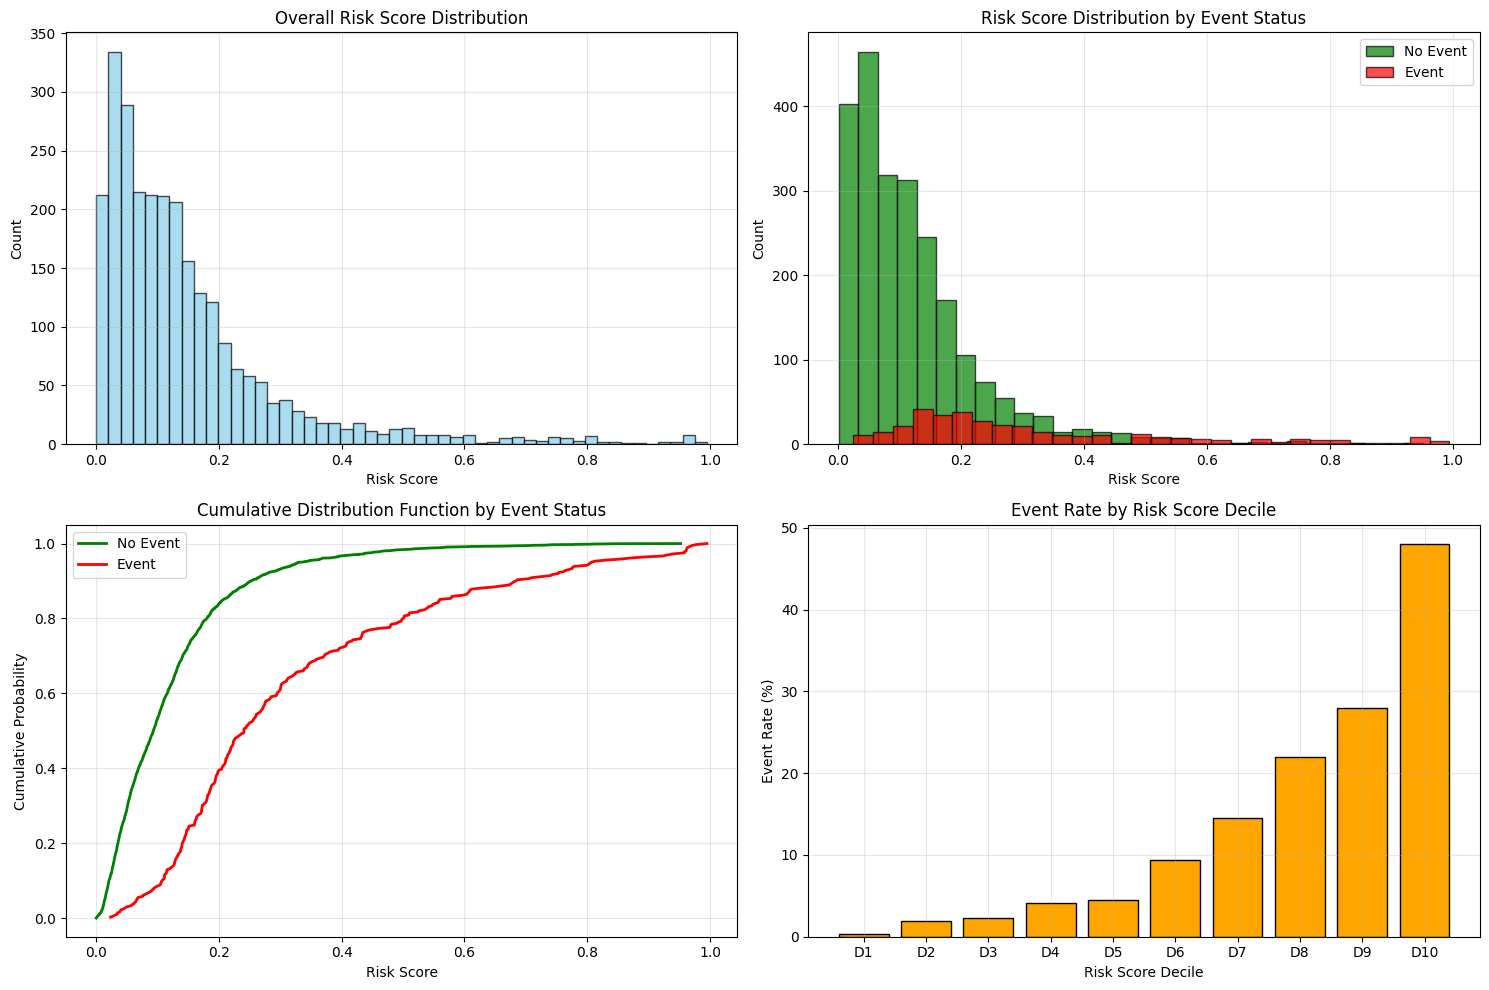


Risk Score Summary Statistics:
--------------------------------------------------
Overall mean risk score: 0.1487
Overall median risk score: 0.1067
Risk score range: [0.0004, 0.9948]
Standard deviation: 0.1522

Mean risk score for patients with event: 0.3213
Mean risk score for patients without event: 0.1218

Risk score percentiles for event patients:
  25th percentile: 0.1604
  50th percentile (median): 0.2409
  75th percentile: 0.4320
  90th percentile: 0.6838
  95th percentile: 0.8066

SURVIVAL LSTM EVALUATION
Evaluating model...

Evaluation Results:
loss: 4158.1157
compile_metrics: 7048.4966
survival_time_loss: 0.4114
event_loss: 0.8646

Detailed Performance Metrics:

Survival Time Prediction:
  MSE: 6929.9253
  MAE: 57.0286
  RMSE: 83.2462

Event Prediction:
  Accuracy: 0.8646
  AUC-ROC: 0.5453

PIPELINE COMPLETED SUCCESSFULLY!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

class AdvancedMissingDataHandler:
    def __init__(self):
        self.scaler = StandardScaler()
        self.label_encoders = {}
        self.feature_stats = {}
        self.missing_mask = None
        self.numeric_cols = None
        self.categorical_cols = None

    def analyze_data_types(self, df):
        """Analyze data types and identify numeric vs categorical columns"""
        numeric_cols = []
        categorical_cols = []

        for col in df.columns:
            if pd.api.types.is_numeric_dtype(df[col]):
                # Check if it's actually categorical (limited unique values)
                unique_ratio = df[col].nunique() / len(df[col])
                if unique_ratio < 0.05 and df[col].nunique() < 20:
                    categorical_cols.append(col)
                else:
                    numeric_cols.append(col)
            else:
                categorical_cols.append(col)

        print(f"Numeric columns: {len(numeric_cols)}")
        print(f"Categorical columns: {len(categorical_cols)}")

        return numeric_cols, categorical_cols

    def encode_categorical(self, df, categorical_cols):
        """Encode categorical variables"""
        df_encoded = df.copy()

        for col in categorical_cols:
            if col in df.columns:
                # Fill missing categorical values with a special value
                df_encoded[col] = df[col].fillna('MISSING_CAT')

                # Explicitly convert to string to prevent TypeError with mixed types
                df_encoded[col] = df_encoded[col].astype(str)

                # Create or use existing label encoder
                if col not in self.label_encoders:
                    self.label_encoders[col] = LabelEncoder()
                    self.label_encoders[col].fit(df_encoded[col])

                # Transform the column
                df_encoded[col] = self.label_encoders[col].transform(df_encoded[col])

        return df_encoded

    def create_missing_mask(self, df):
        """Create mask indicating missing values"""
        return df.isnull().astype(int).values

    def create_input_with_missing_indicators(self, df, numeric_cols, categorical_cols):
        """Create input with missing indicators and placeholder values"""
        df_processed = df.copy()

        # Store statistics for numeric columns
        for col in numeric_cols:
            if col in df.columns:
                self.feature_stats[col] = {
                    'mean': df[col].mean(),
                    'median': df[col].median(),
                    'std': df[col].std(),
                    'min': df[col].min(),
                    'max': df[col].max()
                }

        # Process numeric columns
        for col in numeric_cols:
            if col in df.columns:
                # Convert infinite values to NaN before filling with placeholder
                df_processed[col] = df_processed[col].replace([np.inf, -np.inf], np.nan)

                # Create missing indicator
                indicator_name = f"{col}_missing"
                df_processed[indicator_name] = df[col].isnull().astype(int)

                # Fill with placeholder (scaled zero)
                placeholder = 0  # Will be scaled later
                df_processed[col] = df_processed[col].fillna(placeholder)

        # Process categorical columns
        df_processed = self.encode_categorical(df_processed, categorical_cols)

        # Create missing indicators for categorical columns
        for col in categorical_cols:
            if col in df.columns:
                # Create missing indicator (after encoding)
                indicator_name = f"{col}_missing"
                df_processed[indicator_name] = (df[col].isnull()).astype(int)

        return df_processed

    def prepare_for_autoencoder(self, df, feature_cols):
        """Prepare data for autoencoder imputation"""
        # Identify numeric and categorical columns
        self.numeric_cols, self.categorical_cols = self.analyze_data_types(df[feature_cols])

        print(f"\nPreparing {len(feature_cols)} features for autoencoder imputation:")
        print(f"- Numeric features: {len(self.numeric_cols)}")
        print(f"- Categorical features: {len(self.categorical_cols)}")

        # Create input with missing indicators
        df_processed = self.create_input_with_missing_indicators(
            df, self.numeric_cols, self.categorical_cols
        )

        # Get all columns including missing indicators
        all_columns = list(feature_cols)
        for col in feature_cols:
            if col in df_processed.columns and f"{col}_missing" not in all_columns:
                all_columns.append(f"{col}_missing")

        # Ensure all_columns has only unique values and correct order (optional, but good practice)
        # It's important that all_columns here matches the order of columns in X
        # For simplicity, we'll rely on df_processed column order for X and align mask to it
        # Let's ensure df_processed has all_columns in the right order for X creation
        # The next line was already implicitly sorting them, let's make it explicit
        all_columns = [col for col in df_processed.columns if col in set(all_columns)]

        # Scale numeric features (including those with placeholders)
        numeric_features_to_scale = [col for col in self.numeric_cols if col in df_processed.columns]
        if numeric_features_to_scale:
            df_processed[numeric_features_to_scale] = self.scaler.fit_transform(
                df_processed[numeric_features_to_scale]
            )

        # Create final feature matrix
        X = df_processed[all_columns].values

        # --- Start of modifications for the missing mask ---
        # Create a new DataFrame for the missing mask, initialized with zeros
        full_missing_mask_df = pd.DataFrame(0, index=df_processed.index, columns=all_columns, dtype=np.float32)

        # Populate the mask for original features
        for original_col in feature_cols:
            if original_col in full_missing_mask_df.columns:
                full_missing_mask_df[original_col] = df[original_col].isnull().astype(np.float32)

        # Assign the values of the full_missing_mask_df to self.missing_mask
        self.missing_mask = full_missing_mask_df.values
        # --- End of modifications ---

        print(f"Final feature matrix shape: {X.shape}")
        print(f"Missing mask shape: {self.missing_mask.shape}")

        return X, all_columns


class DenoisingAutoencoderImputer:
    def __init__(self, input_dim, encoding_dim=32, noise_factor=0.1):
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim
        self.noise_factor = noise_factor
        self.autoencoder = None
        self.history = None

    def build_autoencoder(self):
        """Build a denoising autoencoder for imputation"""
        # Input layer
        input_layer = layers.Input(shape=(self.input_dim,))

        # Add noise for denoising (during training only)
        noisy_input = layers.GaussianNoise(self.noise_factor)(input_layer)

        # Encoder
        encoded = layers.Dense(128, activation='relu')(noisy_input)
        encoded = layers.BatchNormalization()(encoded)
        encoded = layers.Dense(64, activation='relu')(encoded)
        encoded = layers.BatchNormalization()(encoded)
        encoded = layers.Dense(self.encoding_dim, activation='relu')(encoded)

        # Decoder
        decoded = layers.Dense(64, activation='relu')(encoded)
        decoded = layers.BatchNormalization()(decoded)
        decoded = layers.Dense(128, activation='relu')(decoded)
        decoded = layers.BatchNormalization()(decoded)
        decoded = layers.Dense(self.input_dim, activation='linear')(decoded)

        # Create model
        self.autoencoder = models.Model(inputs=input_layer, outputs=decoded)

        # Compile with custom loss
        self.autoencoder.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='mse',
            metrics=['mae']
        )

        print("Denoising Autoencoder architecture:")
        print(self.autoencoder.summary())

        return self.autoencoder

    def custom_loss(self, y_true, y_pred, missing_mask):
        """Custom loss that only considers non-missing values"""
        # Calculate squared error
        squared_error = tf.square(y_true - y_pred)

        # Mask out missing values (where mask == 1)
        valid_mask = tf.cast(tf.equal(missing_mask, 0), tf.float32)

        # Apply mask
        masked_error = squared_error * valid_mask

        # Calculate mean over non-missing values
        loss = tf.reduce_sum(masked_error) / (tf.reduce_sum(valid_mask) + 1e-8)

        return loss

    def train_with_missing_awareness(self, X_train, missing_mask_train, X_val, missing_mask_val,
                                     epochs=150, batch_size=64):
        """Train autoencoder with missing-aware loss"""

        # Create a custom training loop to handle missing values
        class MissingAwareModel(keras.Model):
            def train_step(self, data):
                # Unpack data: `data` yields `(x_features_batch, (y_true_batch, missing_mask_batch))`
                x_features, (y_true, missing_mask) = data

                with tf.GradientTape() as tape:
                    # Forward pass: model predicts based on x_features
                    y_pred = self(x_features, training=True)

                    # Custom loss only on observed values (using y_true and missing_mask)
                    valid_mask = tf.cast(tf.equal(missing_mask, 0), tf.float32)
                    loss = tf.reduce_sum(tf.square(y_true - y_pred) * valid_mask) / (tf.reduce_sum(valid_mask) + 1e-8)

                # Compute gradients
                trainable_vars = self.trainable_variables
                gradients = tape.gradient(loss, trainable_vars)

                # Update weights
                self.optimizer.apply_gradients(zip(gradients, trainable_vars))

                return {"loss": loss}

            def test_step(self, data):
                # Unpack data for validation: `data` yields `(x_features_batch, (y_true_batch, missing_mask_batch))`
                x_features, (y_true, missing_mask) = data

                # Forward pass
                y_pred = self(x_features, training=False)

                # Custom loss only on observed values
                valid_mask = tf.cast(tf.equal(missing_mask, 0), tf.float32)
                loss = tf.reduce_sum(tf.square(y_true - y_pred) * valid_mask) / (tf.reduce_sum(valid_mask) + 1e-8)

                # Here, we will just return the custom loss to monitor 'val_loss'
                return {"loss": loss}

        # Create model wrapper
        model_wrapper = MissingAwareModel(inputs=self.autoencoder.input,
                                         outputs=self.autoencoder.output)
        # Compile with a dummy loss, as the actual loss calculation is handled in train_step and test_step
        # This satisfies Keras's requirement for a loss argument.
        model_wrapper.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())

        # Prepare training data: x is X_train, y is (X_train, missing_mask_train)
        train_data = tf.data.Dataset.from_tensor_slices(
            (X_train, (X_train, missing_mask_train))
        ).batch(batch_size).shuffle(1000)

        val_data = tf.data.Dataset.from_tensor_slices(
            (X_val, (X_val, missing_mask_val))
        ).batch(batch_size)

        # Callbacks
        early_stopping = callbacks.EarlyStopping(
            monitor='val_loss',
            patience=30,
            restore_best_weights=True,
            verbose=1
        )

        reduce_lr = callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=15,
            min_lr=1e-6,
            verbose=1
        )

        print("Training denoising autoencoder with missing-aware loss...")

        # Train model
        history = model_wrapper.fit(
            train_data,
            validation_data=val_data,
            epochs=epochs,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )

        self.history = history
        self.model_wrapper = model_wrapper

        # Plot training history
        self.plot_training_history()

        return history

    def plot_training_history(self):
        """Plot training history"""
        if self.history is None:
            return

        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # Plot loss
        axes[0].plot(self.history.history['loss'], label='Training Loss')
        if 'val_loss' in self.history.history:
            axes[0].plot(self.history.history['val_loss'], label='Validation Loss')
        axes[0].set_title('Autoencoder Training Loss')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Loss')
        axes[0].legend()
        axes[0].grid(True)

        plt.tight_layout()
        plt.show()

    def impute_missing_values(self, X, missing_mask):
        """Impute missing values using trained autoencoder"""
        print("Imputing missing values using trained autoencoder...")

        # Get predictions
        X_imputed = self.autoencoder.predict(X, verbose=0)

        # Convert X to a NumPy array to use the .copy() method and array-like indexing
        X_np = X.numpy() if isinstance(X, tf.Tensor) else X

        # Only replace missing values (where missing_mask == 1)
        X_final = X_np.copy()
        X_final[missing_mask == 1] = X_imputed[missing_mask == 1]

        # Calculate imputation statistics
        n_imputed = np.sum(missing_mask)
        print(f"Imputed {n_imputed} missing values")

        return X_final


class SurvivalDataPreprocessor:
    def __init__(self):
        self.feature_stats = {}
        self.selected_features = []
        self.missing_handler = AdvancedMissingDataHandler()
        self.autoencoder_imputer = None

    def analyze_missing_data(self, df):
        """Comprehensive analysis of missing data patterns"""
        print("=== MISSING DATA ANALYSIS ===")

        total_rows = len(df)
        missing_summary = pd.DataFrame({
            'missing_count': df.isnull().sum(),
            'missing_percentage': (df.isnull().sum() / total_rows) * 100
        }).sort_values('missing_percentage', ascending=False)

        print("Missing data by column:")
        print(missing_summary[missing_summary['missing_count'] > 0])

        plt.figure(figsize=(15, 10))
        missing_cols = missing_summary[missing_summary['missing_count'] > 0].index
        if len(missing_cols) > 0:
            sns.heatmap(df[missing_cols].isnull(), cbar=True, yticklabels=False, cmap='viridis')
            plt.title('Missing Data Pattern')
            plt.tight_layout()
            plt.show()

        return missing_summary

    def handle_missing_survival_data(self, df):
        """Handle missing values in survival outcomes"""
        df_clean = df.copy()

        survival_vars = ['VISDAY', 'os_event']
        for var in survival_vars:
            if var in df.columns:
                missing_count = df[var].isnull().sum()
                if missing_count > 0:
                    print(f"WARNING: {missing_count} missing values in {var}")
                    df_clean = df_clean.dropna(subset=[var])
                    print(f"Removed {missing_count} rows with missing {var}")

        return df_clean

    def select_features(self, df, max_missing_percentage=50):
        """Select features for analysis"""
        candidate_features = [
            'AGE', 'VISDAY', 'cycle_number', 'total_cycles',
            'anytarget', 'anynontarget', 'total_ae_events', 'serious_ae_count',
            'grade3_plus_count', 'any_grade3_plus', 'total_body_systems',
            'treatment_related_count', 'any_treatment_related', 'grade1_count',
            'grade2_count', 'grade3_count', 'grade4_count', 'drug_interrupted',
            'drug_reduced', 'drug_withdrawn', "drug_not_changed", "other_drug_interrupted",
            "other_drug_reduced", "other_drug_withdrawn", "concomitant_treatment_given",
            'cum_any_grade3_plus', 'cum_any_treatment_related', "cum_drug_withdrawn",
            "cum_other_drug_withdrawn", "cum_concomitant_treatment", "ongoing_ae_count",
            "mean_ae_duration", "max_ae_duration", "most_recent_ae_term", "most_recent_ae_severity"
        ]

        # Filter to available columns
        available_features = [col for col in candidate_features if col in df.columns]

        # Remove features with text/categorical data that can't be imputed easily
        text_features = ['most_recent_ae_term']
        features_to_keep = [f for f in available_features if f not in text_features]

        print(f"Selected {len(features_to_keep)} features for modeling")

        self.selected_features = features_to_keep
        return features_to_keep

    def preprocess_for_autoencoder_imputation(self, df):
        """Complete preprocessing pipeline with autoencoder imputation"""
        print("Starting advanced preprocessing with autoencoder imputation...")

        # Step 1: Handle survival data
        df_clean = self.handle_missing_survival_data(df)
        print(f"Data after handling missing survival outcomes: {len(df_clean)} rows")

        # Step 2: Select features
        features = self.select_features(df_clean)

        # Step 3: Analyze missing patterns
        missing_summary = self.analyze_missing_data(df_clean[features])

        # Step 4: Prepare for autoencoder imputation
        X_prepared, all_columns = self.missing_handler.prepare_for_autoencoder(
            df_clean, features
        )

        # Step 5: Get missing mask
        missing_mask = self.missing_handler.missing_mask

        # Step 6: Add survival variables back
        survival_data = df_clean[['VISDAY', 'os_event']].values

        return X_prepared, missing_mask, survival_data, all_columns, features


class AutoencoderLSTM_Survival:
    def __init__(self, input_dim, encoding_dim=32, sequence_length=3, lstm_units=64):
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim
        self.sequence_length = sequence_length
        self.lstm_units = lstm_units
        self.autoencoder = None
        self.encoder = None
        self.lstm_model = None
        self.risk_model = None  # New: risk classification model
        self.history_autoencoder = None
        self.history_lstm = None
        self.history_risk = None

    def build_lstm_autoencoder(self):
        """Build LSTM-based autoencoder for time series imputation"""
        # Input layer
        input_layer = layers.Input(shape=(self.sequence_length, self.input_dim))

        # Encoder LSTM
        encoded = layers.LSTM(self.encoding_dim * 2, return_sequences=True)(input_layer)
        encoded = layers.LSTM(self.encoding_dim, return_sequences=False)(encoded)

        # Repeat vector for decoder
        repeated = layers.RepeatVector(self.sequence_length)(encoded)

        # Decoder LSTM
        decoded = layers.LSTM(self.encoding_dim, return_sequences=True)(repeated)
        decoded = layers.LSTM(self.encoding_dim * 2, return_sequences=True)(decoded)
        decoded = layers.TimeDistributed(layers.Dense(self.input_dim))(decoded)

        # Create autoencoder
        self.autoencoder = models.Model(inputs=input_layer, outputs=decoded)

        # Create encoder
        self.encoder = models.Model(inputs=input_layer, outputs=encoded)

        # Compile
        self.autoencoder.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='mse',
            metrics=['mae']
        )

        print("LSTM Autoencoder architecture:")
        print(self.autoencoder.summary())

        return self.autoencoder, self.encoder

    def build_survival_lstm(self):
        """Build LSTM model for survival prediction"""
        # Input layer: Expects (sequence_length, encoding_dim) after feature extraction
        input_layer = layers.Input(shape=(self.sequence_length, self.input_dim))

        # Bidirectional LSTM layer
        lstm_sequence_output = layers.Bidirectional(layers.LSTM(self.lstm_units, return_sequences=True))(input_layer)
        lstm_sequence_output = layers.Dropout(0.3)(lstm_sequence_output)

        # --- Refactored Attention Mechanism ---
        # Calculate attention scores
        attention_scores = layers.TimeDistributed(layers.Dense(1, activation='tanh'))(lstm_sequence_output)
        # Calculate attention weights
        attention_weights = layers.Softmax(axis=1)(attention_scores)
        # Apply attention weights to the LSTM output
        context_vector = layers.Multiply()([lstm_sequence_output, attention_weights])
        # Sum the context vector along the sequence dimension to get a single representation
        sent_representation = layers.Lambda(lambda xin: tf.reduce_sum(xin, axis=1))(context_vector)
        # --- End Refactored Attention Mechanism ---

        # Dense layers
        dense_out = layers.Dense(64, activation='relu')(sent_representation)
        dense_out = layers.BatchNormalization()(dense_out)
        dense_out = layers.Dropout(0.2)(dense_out)
        dense_out = layers.Dense(32, activation='relu')(dense_out)
        dense_out = layers.BatchNormalization()(dense_out)

        # Output layers
        output_survival_time = layers.Dense(1, activation='relu', name='survival_time')(dense_out)
        output_event = layers.Dense(1, activation='sigmoid', name='event')(dense_out)

        # Create model
        self.lstm_model = models.Model(
            inputs=input_layer,
            outputs=[output_survival_time, output_event]
        )

        # Compile
        self.lstm_model.compile(
            optimizer=Adam(learning_rate=0.0005),
            loss={
                'survival_time': 'mse',
                'event': 'binary_crossentropy'
            },
            loss_weights={
                'survival_time': 0.6,
                'event': 0.4
            },
            metrics={
                'survival_time': ['mae', tf.keras.metrics.RootMeanSquaredError()],
                'event': ['accuracy', tf.keras.metrics.AUC()]
            }
        )

        print("Survival LSTM architecture:")
        print(self.lstm_model.summary())

        return self.lstm_model

    def build_risk_classification_model(self):
        """Build a risk classification model using LSTM output"""
        # Input layer: Expects (sequence_length, input_dim)
        input_layer = layers.Input(shape=(self.sequence_length, self.input_dim))

        # LSTM layer to process the sequence
        lstm_out = layers.Bidirectional(layers.LSTM(self.lstm_units, return_sequences=True))(input_layer)
        lstm_out = layers.Dropout(0.3)(lstm_out)

        # Attention mechanism
        attention_scores = layers.TimeDistributed(layers.Dense(1, activation='tanh'))(lstm_out)
        attention_weights = layers.Softmax(axis=1)(attention_scores)
        context_vector = layers.Multiply()([lstm_out, attention_weights])

        # Extract the last time step's representation (most recent visit)
        last_visit_output = layers.Lambda(lambda x: x[:, -1, :])(context_vector)

        # Additional dense layers for risk prediction
        dense1 = layers.Dense(32, activation='relu')(last_visit_output)
        dense1 = layers.BatchNormalization()(dense1)
        dense1 = layers.Dropout(0.2)(dense1)

        dense2 = layers.Dense(16, activation='relu')(dense1)
        dense2 = layers.BatchNormalization()(dense2)

        # Risk score output (probability of event)
        risk_score = layers.Dense(1, activation='sigmoid', name='risk_score')(dense2)

        # Create the risk model
        self.risk_model = models.Model(inputs=input_layer, outputs=risk_score)

        # Compile
        self.risk_model.compile(
            optimizer=Adam(learning_rate=0.0005),
            loss='binary_crossentropy',
            metrics=['accuracy', tf.keras.metrics.AUC(),
                    tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
        )

        print("Risk Classification Model architecture:")
        print(self.risk_model.summary())

        return self.risk_model

    def create_sequences(self, X, y, sequence_length):
        """Create sequences for LSTM"""
        sequences = []
        labels = []

        for i in range(len(X) - sequence_length + 1):
            sequences.append(X[i:i+sequence_length])
            # Use the last time point's label
            labels.append(y[i+sequence_length-1])

        return np.array(sequences), np.array(labels)

    def train_lstm_autoencoder(self, X_train_seq, X_val_seq, epochs=100, batch_size=32):
        """Train LSTM autoencoder"""
        early_stopping = callbacks.EarlyStopping(
            monitor='val_loss',
            patience=25,
            restore_best_weights=True
        )

        reduce_lr = callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=10,
            min_lr=1e-6
        )

        print("Training LSTM autoencoder...")
        self.history_autoencoder = self.autoencoder.fit(
            X_train_seq, X_train_seq,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_val_seq, X_val_seq),
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )

        self.plot_training_history(self.history_autoencoder, "LSTM Autoencoder")

        return self.history_autoencoder

    def train_survival_lstm(self, X_train_seq, y_train, X_val_seq, y_val, epochs=150, batch_size=32):
        """Train survival LSTM"""
        early_stopping = callbacks.EarlyStopping(
            monitor='val_loss',
            patience=30,
            restore_best_weights=True
        )

        reduce_lr = callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=15,
            min_lr=1e-6
        )

        # Convert y to dictionary format for multi-output model
        y_train_dict = {
            'survival_time': y_train[:, 0],
            'event': y_train[:, 1]
        }

        y_val_dict = {
            'survival_time': y_val[:, 0],
            'event': y_val[:, 1]
        }

        print("Training Survival LSTM...")
        self.history_lstm = self.lstm_model.fit(
            X_train_seq,
            y_train_dict,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_val_seq, y_val_dict),
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )

        self.plot_training_history(self.history_lstm, "Survival LSTM")

        return self.history_lstm

    def train_risk_model(self, X_train_seq, y_train_event, X_val_seq, y_val_event, epochs=150, batch_size=32):
        """Train risk classification model"""
        early_stopping = callbacks.EarlyStopping(
            monitor='val_loss',
            patience=30,
            restore_best_weights=True
        )

        reduce_lr = callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=15,
            min_lr=1e-6
        )

        print("Training Risk Classification Model...")
        self.history_risk = self.risk_model.fit(
            X_train_seq,
            y_train_event,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_val_seq, y_val_event),
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )

        self.plot_training_history(self.history_risk, "Risk Classification Model")

        return self.history_risk

    def plot_training_history(self, history, model_name):
        """Plot training history"""
        if history is None:
            return

        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # Plot loss
        axes[0].plot(history.history['loss'], label='Training Loss')
        if 'val_loss' in history.history:
            axes[0].plot(history.history['val_loss'], label='Validation Loss')
        axes[0].set_title(f'{model_name} Loss')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Loss')
        axes[0].legend()
        axes[0].grid(True)

        # Plot additional metrics
        metric_to_plot = None
        for metric in ['mae', 'accuracy', 'root_mean_squared_error', 'auc']:
            if metric in history.history:
                metric_to_plot = metric
                break

        if metric_to_plot:
            axes[1].plot(history.history[metric_to_plot],
                        label=f'Training {metric_to_plot.upper()}')
            if f'val_{metric_to_plot}' in history.history:
                axes[1].plot(history.history[f'val_{metric_to_plot}'],
                           label=f'Validation {metric_to_plot.upper()}')
            axes[1].set_title(f'{model_name} {metric_to_plot.upper()}')
            axes[1].set_xlabel('Epoch')
            axes[1].set_ylabel(metric_to_plot.upper())
            axes[1].legend()
            axes[1].grid(True)

        plt.tight_layout()
        plt.show()

    def evaluate_risk_model(self, X_test_seq, y_test_event):
        """Evaluate the risk classification model"""
        if self.risk_model is None:
            raise ValueError("Risk model not trained yet.")

        print("Evaluating risk classification model...")

        # Get predictions
        risk_scores = self.risk_model.predict(X_test_seq, verbose=0).flatten()

        # Convert to binary predictions
        risk_predictions = (risk_scores > 0.5).astype(int)

        # Calculate metrics
        accuracy = np.mean(risk_predictions == y_test_event)

        print("\n" + "="*70)
        print("RISK CLASSIFICATION MODEL EVALUATION")
        print("="*70)

        # Classification report
        print("\nClassification Report:")
        print(classification_report(y_test_event, risk_predictions,
                                   target_names=['No Event', 'Event']))

        # Confusion matrix
        cm = confusion_matrix(y_test_event, risk_predictions)
        print("Confusion Matrix:")
        print(cm)

        # Additional metrics
        from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

        auc_score = roc_auc_score(y_test_event, risk_scores)
        precision = precision_score(y_test_event, risk_predictions)
        recall = recall_score(y_test_event, risk_predictions)
        f1 = f1_score(y_test_event, risk_predictions)

        print(f"\nDetailed Metrics:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"AUC-ROC: {auc_score:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")

        # Plot evaluation metrics
        self.plot_risk_evaluation(y_test_event, risk_scores, risk_predictions)

        return {
            'risk_scores': risk_scores,
            'predictions': risk_predictions,
            'accuracy': accuracy,
            'auc': auc_score,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }

    def plot_risk_evaluation(self, y_true, risk_scores, predictions):
        """Plot comprehensive evaluation of risk model"""
        fig = plt.figure(figsize=(18, 12))

        # 1. Histogram of risk scores colored by event status
        ax1 = plt.subplot(2, 3, 1)
        event_mask = y_true == 1
        no_event_mask = y_true == 0

        ax1.hist(risk_scores[no_event_mask], bins=30, alpha=0.7, label='No Event',
                color='blue', edgecolor='black')
        ax1.hist(risk_scores[event_mask], bins=30, alpha=0.7, label='Event',
                color='red', edgecolor='black')
        ax1.set_xlabel('Risk Score')
        ax1.set_ylabel('Count')
        ax1.set_title('Histogram of Risk Scores by Event Status')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # 2. ROC Curve
        ax2 = plt.subplot(2, 3, 2)
        fpr, tpr, _ = roc_curve(y_true, risk_scores)
        roc_auc = auc(fpr, tpr)

        ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
        ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax2.set_xlim([0.0, 1.0])
        ax2.set_ylim([0.0, 1.05])
        ax2.set_xlabel('False Positive Rate')
        ax2.set_ylabel('True Positive Rate')
        ax2.set_title('Receiver Operating Characteristic (ROC) Curve')
        ax2.legend(loc="lower right")
        ax2.grid(True, alpha=0.3)

        # 3. Precision-Recall Curve
        ax3 = plt.subplot(2, 3, 3)
        precision, recall, _ = precision_recall_curve(y_true, risk_scores)
        pr_auc = auc(recall, precision)

        ax3.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.3f})')
        ax3.set_xlabel('Recall')
        ax3.set_ylabel('Precision')
        ax3.set_title('Precision-Recall Curve')
        ax3.legend(loc="lower left")
        ax3.grid(True, alpha=0.3)

        # 4. Confusion Matrix Heatmap
        ax4 = plt.subplot(2, 3, 4)
        cm = confusion_matrix(y_true, predictions)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax4)
        ax4.set_xlabel('Predicted')
        ax4.set_ylabel('Actual')
        ax4.set_title('Confusion Matrix')
        ax4.set_xticklabels(['No Event', 'Event'])
        ax4.set_yticklabels(['No Event', 'Event'])

        # 5. Risk Score Distribution by Actual Outcome
        ax5 = plt.subplot(2, 3, 5)
        box_data = [risk_scores[no_event_mask], risk_scores[event_mask]]
        ax5.boxplot(box_data, labels=['No Event', 'Event'])
        ax5.set_ylabel('Risk Score')
        ax5.set_title('Risk Score Distribution by Actual Outcome')
        ax5.grid(True, alpha=0.3)

        # 6. Calibration plot (observed vs predicted event rate)
        ax6 = plt.subplot(2, 3, 6)
        n_bins = 10
        bin_edges = np.linspace(0, 1, n_bins + 1)
        bin_indices = np.digitize(risk_scores, bin_edges) - 1
        bin_indices = np.clip(bin_indices, 0, n_bins - 1)

        observed_rates = []
        predicted_rates = []
        bin_centers = []

        for i in range(n_bins):
            mask = bin_indices == i
            if np.sum(mask) > 0:
                observed_rate = np.mean(y_true[mask])
                predicted_rate = np.mean(risk_scores[mask])
                observed_rates.append(observed_rate)
                predicted_rates.append(predicted_rate)
                bin_centers.append((bin_edges[i] + bin_edges[i+1]) / 2)

        ax6.plot(predicted_rates, observed_rates, 'o-', label='Calibration')
        ax6.plot([0, 1], [0, 1], '--', color='gray', label='Perfect calibration')
        ax6.set_xlabel('Predicted Event Rate')
        ax6.set_ylabel('Observed Event Rate')
        ax6.set_title('Calibration Plot')
        ax6.legend()
        ax6.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Print decile analysis
        print("\nRisk Score Decile Analysis:")
        print("-" * 50)
        deciles = np.percentile(risk_scores, np.arange(0, 101, 10))
        for i in range(10):
            lower = deciles[i]
            upper = deciles[i+1]
            mask = (risk_scores >= lower) & (risk_scores < upper)
            if i == 9:  # Include upper bound for last decile
                mask = risk_scores >= lower
            if np.sum(mask) > 0:
                event_rate = np.mean(y_true[mask]) * 100
                print(f"Decile {i+1} ({lower:.3f} - {upper:.3f}): {np.sum(mask)} patients, "
                      f"Event rate: {event_rate:.1f}%")

    def evaluate(self, X_test_seq, y_test):
        """Evaluate the model"""
        if self.lstm_model is None:
            raise ValueError("Model not trained yet.")

        print("Evaluating model...")

        # Convert y_test to dictionary
        y_test_dict = {
            'survival_time': y_test[:, 0],
            'event': y_test[:, 1]
        }

        results = self.lstm_model.evaluate(X_test_seq, y_test_dict, verbose=0)

        print("\nEvaluation Results:")
        for i, metric in enumerate(self.lstm_model.metrics_names):
            print(f"{metric}: {results[i]:.4f}")

        return results

    def predict(self, X_seq):
        """Make predictions"""
        if self.lstm_model is None:
            raise ValueError("Model not trained yet.")

        predictions = self.lstm_model.predict(X_seq, verbose=0)
        return predictions

    def predict_risk(self, X_seq):
        """Predict risk scores"""
        if self.risk_model is None:
            raise ValueError("Risk model not trained yet.")

        risk_scores = self.risk_model.predict(X_seq, verbose=0).flatten()
        return risk_scores


def train_complete_pipeline():
    """Complete training pipeline with autoencoder imputation"""
    print("Starting Autoencoder Imputation + LSTM Survival Prediction Pipeline")
    print("=" * 70)

    try:
        # Load data
        print("Loading data...")
        pcdata = pd.read_csv('pcdata.csv')

        # Initialize preprocessor
        preprocessor = SurvivalDataPreprocessor()

        # Preprocess with autoencoder imputation
        print("\n" + "=" * 70)
        print("STAGE 1: Autoencoder-based Imputation")
        print("=" * 70)

        X_prepared, missing_mask, survival_data, all_columns, features = \
            preprocessor.preprocess_for_autoencoder_imputation(pcdata)

        # Split data
        X_train, X_test, mask_train, mask_test, y_train, y_test = train_test_split(
            X_prepared, missing_mask, survival_data,
            test_size=0.3, random_state=42
        )

        X_train, X_val, mask_train, mask_val, y_train, y_val = train_test_split(
            X_train, mask_train, y_train,
            test_size=0.2, random_state=42
        )

        print(f"\nData split:")
        print(f"  Training: {X_train.shape}")
        print(f"  Validation: {X_val.shape}")
        print(f"  Test: {X_test.shape}")

        # Initialize and train denoising autoencoder for imputation
        print("\nTraining Denoising Autoencoder for imputation...")
        autoencoder_imputer = DenoisingAutoencoderImputer(
            input_dim=X_train.shape[1],
            encoding_dim=32,
            noise_factor=0.1
        )

        autoencoder_imputer.build_autoencoder()

        # Explicitly cast data to tf.float32 to prevent dtype mismatch errors
        X_train_tf = tf.cast(X_train, tf.float32)
        mask_train_tf = tf.cast(mask_train, tf.float32)
        X_val_tf = tf.cast(X_val, tf.float32)
        mask_val_tf = tf.cast(mask_val, tf.float32)

        autoencoder_imputer.train_with_missing_awareness(
            X_train_tf, mask_train_tf,
            X_val_tf, mask_val_tf,
            epochs=100,
            batch_size=64
        )

        # Impute missing values
        print("\nImputing missing values...")
        # Ensure X is passed as a NumPy array or converted within the method
        X_train_imputed = autoencoder_imputer.impute_missing_values(X_train_tf, mask_train_tf)
        X_val_imputed = autoencoder_imputer.impute_missing_values(X_val_tf, mask_val_tf)
        X_test_imputed = autoencoder_imputer.impute_missing_values(tf.cast(X_test, tf.float32), tf.cast(mask_test, tf.float32))

        preprocessor.autoencoder_imputer = autoencoder_imputer

        print("\n" + "=" * 70)
        print("STAGE 2: LSTM Survival Prediction and Risk Classification")
        print("=" * 70)

        # Create sequences for LSTM
        sequence_length = 3

        # For simplicity, create synthetic sequences from the data
        # In real scenario, you would use actual time-series data
        def create_synthetic_sequences(X, y, seq_length):
            n_sequences = len(X) // seq_length
            X_seq = X[:n_sequences * seq_length].reshape(n_sequences, seq_length, -1)
            y_seq = y[:n_sequences * seq_length].reshape(n_sequences, seq_length, -1)
            # Use last time point for prediction
            y_seq = y_seq[:, -1, :]
            return X_seq, y_seq

        X_train_seq, y_train_seq = create_synthetic_sequences(X_train_imputed, y_train, sequence_length)
        X_val_seq, y_val_seq = create_synthetic_sequences(X_val_imputed, y_val, sequence_length)
        X_test_seq, y_test_seq = create_synthetic_sequences(X_test_imputed, y_test, sequence_length)

        print(f"\nSequence shapes:")
        print(f"  Training sequences: {X_train_seq.shape}, labels: {y_train_seq.shape}")
        print(f"  Validation sequences: {X_val_seq.shape}, labels: {y_val_seq.shape}")
        print(f"  Test sequences: {X_test_seq.shape}, labels: {y_test_seq.shape}")

        # Initialize and train LSTM autoencoder for feature extraction
        print("\nTraining LSTM Autoencoder for feature extraction...")
        lstm_ae = AutoencoderLSTM_Survival(
            input_dim=X_train_seq.shape[2],
            encoding_dim=32,
            sequence_length=sequence_length,
            lstm_units=64
        )

        lstm_ae.build_lstm_autoencoder()
        lstm_ae.train_lstm_autoencoder(
            X_train_seq, X_val_seq,
            epochs=80,
            batch_size=32
        )

        # Extract encoded features (output of the encoder is (batch_size, encoding_dim))
        print("\nExtracting encoded features...")
        X_train_encoded = lstm_ae.encoder.predict(X_train_seq, verbose=0)
        X_val_encoded = lstm_ae.encoder.predict(X_val_seq, verbose=0)
        X_test_encoded = lstm_ae.encoder.predict(X_test_seq, verbose=0)

        # Reshape for survival LSTM (add sequence dimension back for sequence_length=1)
        X_train_encoded_seq = X_train_encoded.reshape(-1, 1, X_train_encoded.shape[1])
        X_val_encoded_seq = X_val_encoded.reshape(-1, 1, X_val_encoded.shape[1])
        X_test_encoded_seq = X_test_encoded.reshape(-1, 1, X_test_encoded.shape[1])

        # Option 1: Train Survival LSTM with the extracted features
        print("\nTraining Survival LSTM...")
        # Create a new instance for the survival model with sequence_length=1
        lstm_survival_model = AutoencoderLSTM_Survival(
            input_dim=lstm_ae.encoding_dim, # The input features to this model are the encoded features
            encoding_dim=lstm_ae.encoding_dim, # Can reuse or set as needed for internal layers, not directly used as input dim
            sequence_length=1, # Each encoded feature vector is a 'sequence' of length 1
            lstm_units=lstm_ae.lstm_units # Use the same LSTM units
        )
        lstm_survival_model.build_survival_lstm()
        lstm_survival_model.train_survival_lstm(
            X_train_encoded_seq, y_train_seq,
            X_val_encoded_seq, y_val_seq,
            epochs=120,
            batch_size=32
        )

        # Option 2: Train Risk Classification Model directly on the sequences
        print("\n" + "=" * 70)
        print("STAGE 3: Risk Classification Model Training")
        print("=" * 70)

        # Build and train risk classification model
        risk_model = AutoencoderLSTM_Survival(
            input_dim=X_train_seq.shape[2],
            encoding_dim=32,
            sequence_length=sequence_length,
            lstm_units=64
        )

        risk_model.build_risk_classification_model()
        risk_model.train_risk_model(
            X_train_seq, y_train_seq[:, 1],  # Use only the event column
            X_val_seq, y_val_seq[:, 1],
            epochs=100,
            batch_size=32
        )

        # Evaluate risk model
        print("\n" + "=" * 70)
        print("RISK MODEL EVALUATION")
        print("=" * 70)

        risk_results = risk_model.evaluate_risk_model(X_test_seq, y_test_seq[:, 1])

        # Get risk scores for all patients
        train_risk_scores = risk_model.predict_risk(X_train_seq)
        val_risk_scores = risk_model.predict_risk(X_val_seq)
        test_risk_scores = risk_model.predict_risk(X_test_seq)

        # Create comprehensive risk score analysis
        print("\n" + "=" * 70)
        print("RISK SCORE DISTRIBUTION ANALYSIS")
        print("=" * 70)

        all_risk_scores = np.concatenate([train_risk_scores, val_risk_scores, test_risk_scores])
        all_events = np.concatenate([y_train_seq[:, 1], y_val_seq[:, 1], y_test_seq[:, 1]])

        # Create a detailed histogram with risk score distribution
        plt.figure(figsize=(15, 10))

        # Plot 1: Overall distribution
        plt.subplot(2, 2, 1)
        plt.hist(all_risk_scores, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        plt.xlabel('Risk Score')
        plt.ylabel('Count')
        plt.title('Overall Risk Score Distribution')
        plt.grid(True, alpha=0.3)

        # Plot 2: Distribution by event status
        plt.subplot(2, 2, 2)
        plt.hist(all_risk_scores[all_events == 0], bins=30, alpha=0.7,
                label='No Event', color='green', edgecolor='black')
        plt.hist(all_risk_scores[all_events == 1], bins=30, alpha=0.7,
                label='Event', color='red', edgecolor='black')
        plt.xlabel('Risk Score')
        plt.ylabel('Count')
        plt.title('Risk Score Distribution by Event Status')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Plot 3: Cumulative distribution
        plt.subplot(2, 2, 3)
        for event_status in [0, 1]:
            mask = all_events == event_status
            if np.sum(mask) > 0:
                sorted_scores = np.sort(all_risk_scores[mask])
                cumulative = np.arange(1, len(sorted_scores) + 1) / len(sorted_scores)
                label = 'Event' if event_status == 1 else 'No Event'
                color = 'red' if event_status == 1 else 'green'
                plt.plot(sorted_scores, cumulative, label=label, color=color, linewidth=2)
        plt.xlabel('Risk Score')
        plt.ylabel('Cumulative Probability')
        plt.title('Cumulative Distribution Function by Event Status')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Plot 4: Event rate by risk score decile
        plt.subplot(2, 2, 4)
        n_deciles = 10
        decile_bins = np.percentile(all_risk_scores, np.arange(0, 101, 10))
        decile_event_rates = []
        decile_centers = []

        for i in range(n_deciles):
            lower = decile_bins[i]
            upper = decile_bins[i+1]
            if i == n_deciles - 1:
                mask = all_risk_scores >= lower
            else:
                mask = (all_risk_scores >= lower) & (all_risk_scores < upper)

            if np.sum(mask) > 0:
                event_rate = np.mean(all_events[mask]) * 100
                decile_event_rates.append(event_rate)
                decile_centers.append((lower + upper) / 2)

        plt.bar(range(n_deciles), decile_event_rates, color='orange', edgecolor='black')
        plt.xlabel('Risk Score Decile')
        plt.ylabel('Event Rate (%)')
        plt.title('Event Rate by Risk Score Decile')
        plt.xticks(range(n_deciles), [f'D{i+1}' for i in range(n_deciles)])
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Print summary statistics
        print("\nRisk Score Summary Statistics:")
        print("-" * 50)
        print(f"Overall mean risk score: {np.mean(all_risk_scores):.4f}")
        print(f"Overall median risk score: {np.median(all_risk_scores):.4f}")
        print(f"Risk score range: [{np.min(all_risk_scores):.4f}, {np.max(all_risk_scores):.4f}]")
        print(f"Standard deviation: {np.std(all_risk_scores):.4f}")

        print(f"\nMean risk score for patients with event: {np.mean(all_risk_scores[all_events == 1]):.4f}")
        print(f"Mean risk score for patients without event: {np.mean(all_risk_scores[all_events == 0]):.4f}")

        # Calculate risk score percentiles for event patients
        if np.sum(all_events == 1) > 0:
            event_risk_percentiles = np.percentile(all_risk_scores[all_events == 1], [25, 50, 75, 90, 95])
            print(f"\nRisk score percentiles for event patients:")
            print(f"  25th percentile: {event_risk_percentiles[0]:.4f}")
            print(f"  50th percentile (median): {event_risk_percentiles[1]:.4f}")
            print(f"  75th percentile: {event_risk_percentiles[2]:.4f}")
            print(f"  90th percentile: {event_risk_percentiles[3]:.4f}")
            print(f"  95th percentile: {event_risk_percentiles[4]:.4f}")

        # Evaluate survival LSTM if trained
        print("\n" + "=" * 70)
        print("SURVIVAL LSTM EVALUATION")
        print("=" * 70)

        if lstm_survival_model.lstm_model is not None:
            results = lstm_survival_model.evaluate(X_test_encoded_seq, y_test_seq)

            # Calculate additional metrics
            from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, roc_auc_score

            # Survival time metrics
            predictions = lstm_survival_model.predict(X_test_encoded_seq)
            y_pred_time = predictions[0].flatten()
            y_true_time = y_test_seq[:, 0]

            mse_time = mean_squared_error(y_true_time, y_pred_time)
            mae_time = mean_absolute_error(y_true_time, y_pred_time)
            rmse_time = np.sqrt(mse_time)

            # Event prediction metrics
            y_pred_event = predictions[1].flatten()
            y_pred_event_binary = (y_pred_event > 0.5).astype(int)
            y_true_event = y_test_seq[:, 1]

            event_accuracy = accuracy_score(y_true_event, y_pred_event_binary)
            event_auc = roc_auc_score(y_true_event, y_pred_event)

            print("\nDetailed Performance Metrics:")
            print(f"\nSurvival Time Prediction:")
            print(f"  MSE: {mse_time:.4f}")
            print(f"  MAE: {mae_time:.4f}")
            print(f"  RMSE: {rmse_time:.4f}")

            print(f"\nEvent Prediction:")
            print(f"  Accuracy: {event_accuracy:.4f}")
            print(f"  AUC-ROC: {event_auc:.4f}")

        return risk_model, preprocessor, risk_results, test_risk_scores, y_test_seq

    except FileNotFoundError:
        print("Error: 'pcdata.csv' not found.")
        return None, None, None, None, None
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        import traceback
        traceback.print_exc()
        return None, None, None, None, None


# Run the pipeline
if __name__ == "__main__":
    model, preprocessor, results, risk_scores, y_test_seq = train_complete_pipeline()

    if model is not None:
        print("\n" + "=" * 70)
        print("PIPELINE COMPLETED SUCCESSFULLY!")
        print("=" * 70)

CROSS-VALIDATION PIPELINE FOR RISK PREDICTION

1. Loading data...
   Loaded 8121 samples with 101 features
CROSS-VALIDATION PIPELINE FOR RISK PREDICTION

1. Data Preprocessing and Imputation
----------------------------------------

Preparing 34 features for autoencoder imputation:
- Numeric features: 11
- Categorical features: 23
Final feature matrix shape: (8056, 68)
Missing mask shape: (8056, 68)

FOLD 1/5
Training samples: 5155
Validation samples: 1289
Test samples: 1612

  1.1 Training Denoising Autoencoder for imputation...

Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 31: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 31: early stopping
Restoring model weights from the end of the best epoch: 1.

  1.2 Creating sequences for LSTM...
    Train sequences: (1718, 3, 68)
    Val sequences: (429, 3, 68)
    Test sequences: (537, 3, 68)

  1.3 Training Risk Classification Model...

  Fold 1 Results:
    Train Accuracy: 0.

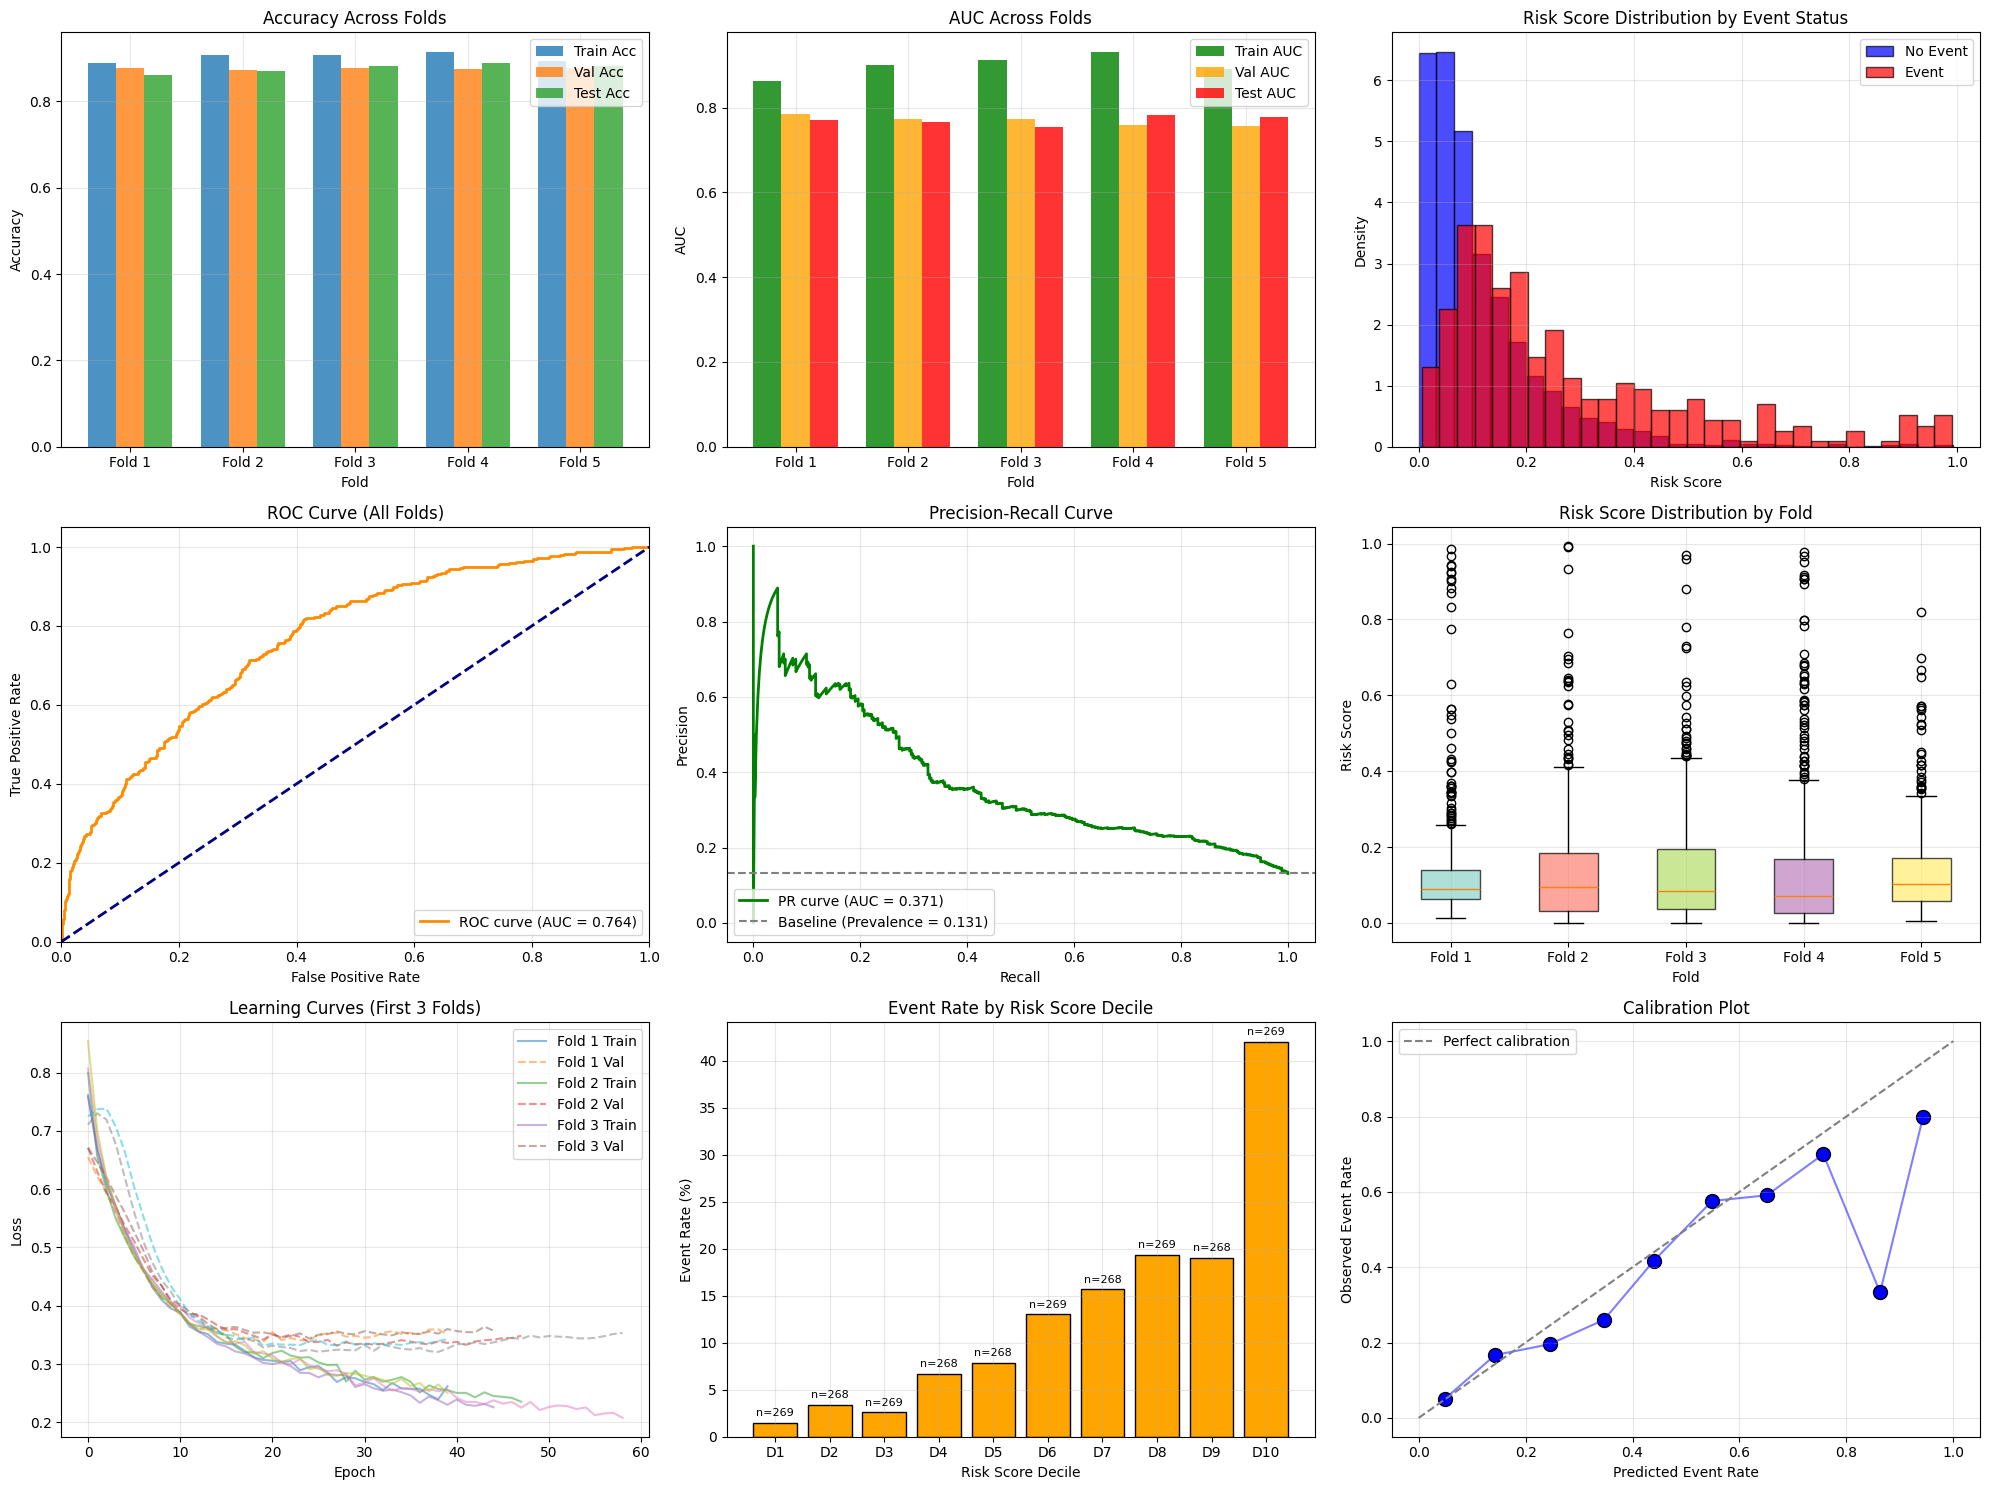


STATISTICAL ANALYSIS OF RISK SCORES

T-test for difference in risk scores:
  Event group mean: 0.2749
  No-event group mean: 0.1150
  T-statistic: 12.6660
  P-value: 6.8041e-31
  Result: Significant difference (p < 0.05)

Optimal threshold (Youden's J statistic): 0.0967
  Sensitivity at optimal threshold: 0.8182
  Specificity at optimal threshold: 0.5877

PIPELINE COMPLETED SUCCESSFULLY!


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

class AdvancedMissingDataHandler:
    def __init__(self):
        self.scaler = StandardScaler()
        self.label_encoders = {}
        self.feature_stats = {}
        self.missing_mask = None
        self.numeric_cols = None
        self.categorical_cols = None

    def analyze_data_types(self, df):
        """Analyze data types and identify numeric vs categorical columns"""
        numeric_cols = []
        categorical_cols = []

        for col in df.columns:
            if pd.api.types.is_numeric_dtype(df[col]):
                # Check if it's actually categorical (limited unique values)
                unique_ratio = df[col].nunique() / len(df[col])
                if unique_ratio < 0.05 and df[col].nunique() < 20:
                    categorical_cols.append(col)
                else:
                    numeric_cols.append(col)
            else:
                categorical_cols.append(col)

        return numeric_cols, categorical_cols

    def encode_categorical(self, df, categorical_cols):
        """Encode categorical variables"""
        df_encoded = df.copy()

        for col in categorical_cols:
            if col in df.columns:
                # Fill missing categorical values with a special value
                df_encoded[col] = df[col].fillna('MISSING_CAT')

                # Explicitly convert to string to prevent TypeError with mixed types
                df_encoded[col] = df_encoded[col].astype(str)

                # Create or use existing label encoder
                if col not in self.label_encoders:
                    self.label_encoders[col] = LabelEncoder()
                    self.label_encoders[col].fit(df_encoded[col])

                # Transform the column
                df_encoded[col] = self.label_encoders[col].transform(df_encoded[col])

        return df_encoded

    def create_missing_mask(self, df):
        """Create mask indicating missing values"""
        return df.isnull().astype(int).values

    def create_input_with_missing_indicators(self, df, numeric_cols, categorical_cols):
        """Create input with missing indicators and placeholder values"""
        df_processed = df.copy()

        # Store statistics for numeric columns
        for col in numeric_cols:
            if col in df.columns:
                self.feature_stats[col] = {
                    'mean': df[col].mean(),
                    'median': df[col].median(),
                    'std': df[col].std(),
                    'min': df[col].min(),
                    'max': df[col].max()
                }

        # Process numeric columns
        for col in numeric_cols:
            if col in df.columns:
                # Convert infinite values to NaN before filling with placeholder
                df_processed[col] = df_processed[col].replace([np.inf, -np.inf], np.nan)

                # Create missing indicator
                indicator_name = f"{col}_missing"
                df_processed[indicator_name] = df[col].isnull().astype(int)

                # Fill with placeholder (scaled zero)
                placeholder = 0  # Will be scaled later
                df_processed[col] = df_processed[col].fillna(placeholder)

        # Process categorical columns
        df_processed = self.encode_categorical(df_processed, categorical_cols)

        # Create missing indicators for categorical columns
        for col in categorical_cols:
            if col in df.columns:
                # Create missing indicator (after encoding)
                indicator_name = f"{col}_missing"
                df_processed[indicator_name] = (df[col].isnull()).astype(int)

        return df_processed

    def prepare_for_autoencoder(self, df, feature_cols):
        """Prepare data for autoencoder imputation"""
        # Identify numeric and categorical columns
        self.numeric_cols, self.categorical_cols = self.analyze_data_types(df[feature_cols])

        print(f"\nPreparing {len(feature_cols)} features for autoencoder imputation:")
        print(f"- Numeric features: {len(self.numeric_cols)}")
        print(f"- Categorical features: {len(self.categorical_cols)}")

        # Create input with missing indicators
        df_processed = self.create_input_with_missing_indicators(
            df, self.numeric_cols, self.categorical_cols
        )

        # Get all columns including missing indicators
        all_columns = list(feature_cols)
        for col in feature_cols:
            if col in df_processed.columns and f"{col}_missing" not in all_columns:
                all_columns.append(f"{col}_missing")

        # Ensure all_columns has only unique values and correct order
        all_columns = [col for col in df_processed.columns if col in set(all_columns)]

        # Scale numeric features (including those with placeholders)
        numeric_features_to_scale = [col for col in self.numeric_cols if col in df_processed.columns]
        if numeric_features_to_scale:
            df_processed[numeric_features_to_scale] = self.scaler.fit_transform(
                df_processed[numeric_features_to_scale]
            )

        # Create final feature matrix
        X = df_processed[all_columns].values

        # Create a new DataFrame for the missing mask
        full_missing_mask_df = pd.DataFrame(0, index=df_processed.index, columns=all_columns, dtype=np.float32)

        # Populate the mask for original features
        for original_col in feature_cols:
            if original_col in full_missing_mask_df.columns:
                full_missing_mask_df[original_col] = df[original_col].isnull().astype(np.float32)

        # Assign the values of the full_missing_mask_df to self.missing_mask
        self.missing_mask = full_missing_mask_df.values

        print(f"Final feature matrix shape: {X.shape}")
        print(f"Missing mask shape: {self.missing_mask.shape}")

        return X, all_columns


class DenoisingAutoencoderImputer:
    def __init__(self, input_dim, encoding_dim=32, noise_factor=0.1):
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim
        self.noise_factor = noise_factor
        self.autoencoder = None
        self.history = None

    def build_autoencoder(self):
        """Build a denoising autoencoder for imputation"""
        # Input layer
        input_layer = layers.Input(shape=(self.input_dim,))

        # Add noise for denoising (during training only)
        noisy_input = layers.GaussianNoise(self.noise_factor)(input_layer)

        # Encoder
        encoded = layers.Dense(128, activation='relu')(noisy_input)
        encoded = layers.BatchNormalization()(encoded)
        encoded = layers.Dense(64, activation='relu')(encoded)
        encoded = layers.BatchNormalization()(encoded)
        encoded = layers.Dense(self.encoding_dim, activation='relu')(encoded)

        # Decoder
        decoded = layers.Dense(64, activation='relu')(encoded)
        decoded = layers.BatchNormalization()(decoded)
        decoded = layers.Dense(128, activation='relu')(decoded)
        decoded = layers.BatchNormalization()(decoded)
        decoded = layers.Dense(self.input_dim, activation='linear')(decoded)

        # Create model
        self.autoencoder = models.Model(inputs=input_layer, outputs=decoded)

        # Compile with custom loss
        self.autoencoder.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='mse',
            metrics=['mae']
        )

        return self.autoencoder

    def train_with_missing_awareness(self, X_train, missing_mask_train, X_val, missing_mask_val,
                                     epochs=150, batch_size=64):
        """Train autoencoder with missing-aware loss"""

        # Create a custom training loop to handle missing values
        class MissingAwareModel(keras.Model):
            def train_step(self, data):
                # Unpack data: `data` yields `(x_features_batch, (y_true_batch, missing_mask_batch))`
                x_features, (y_true, missing_mask) = data

                with tf.GradientTape() as tape:
                    # Forward pass: model predicts based on x_features
                    y_pred = self(x_features, training=True)

                    # Custom loss only on observed values (using y_true and missing_mask)
                    valid_mask = tf.cast(tf.equal(missing_mask, 0), tf.float32)
                    loss = tf.reduce_sum(tf.square(y_true - y_pred) * valid_mask) / (tf.reduce_sum(valid_mask) + 1e-8)

                # Compute gradients
                trainable_vars = self.trainable_variables
                gradients = tape.gradient(loss, trainable_vars)

                # Update weights
                self.optimizer.apply_gradients(zip(gradients, trainable_vars))

                return {"loss": loss}

            def test_step(self, data):
                # Unpack data for validation: `data` yields `(x_features_batch, (y_true_batch, missing_mask_batch))`
                x_features, (y_true, missing_mask) = data

                # Forward pass
                y_pred = self(x_features, training=False)

                # Custom loss only on observed values
                valid_mask = tf.cast(tf.equal(missing_mask, 0), tf.float32)
                loss = tf.reduce_sum(tf.square(y_true - y_pred) * valid_mask) / (tf.reduce_sum(valid_mask) + 1e-8)

                return {"loss": loss}

        # Create model wrapper
        model_wrapper = MissingAwareModel(inputs=self.autoencoder.input,
                                         outputs=self.autoencoder.output)
        # Compile with a dummy loss
        model_wrapper.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())

        # Prepare training data
        train_data = tf.data.Dataset.from_tensor_slices(
            (X_train, (X_train, missing_mask_train))
        ).batch(batch_size).shuffle(1000)

        val_data = tf.data.Dataset.from_tensor_slices(
            (X_val, (X_val, missing_mask_val))
        ).batch(batch_size)

        # Callbacks
        early_stopping = callbacks.EarlyStopping(
            monitor='val_loss',
            patience=30,
            restore_best_weights=True,
            verbose=1
        )

        reduce_lr = callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=15,
            min_lr=1e-6,
            verbose=1
        )

        # Train model
        history = model_wrapper.fit(
            train_data,
            validation_data=val_data,
            epochs=epochs,
            callbacks=[early_stopping, reduce_lr],
            verbose=0
        )

        self.history = history
        self.model_wrapper = model_wrapper

        return history

    def impute_missing_values(self, X, missing_mask):
        """Impute missing values using trained autoencoder"""
        # Get predictions
        X_imputed = self.autoencoder.predict(X, verbose=0)

        # Convert X to a NumPy array
        X_np = X.numpy() if isinstance(X, tf.Tensor) else X

        # Only replace missing values (where missing_mask == 1)
        X_final = X_np.copy()
        X_final[missing_mask == 1] = X_imputed[missing_mask == 1]

        return X_final


class SurvivalDataPreprocessor:
    def __init__(self):
        self.feature_stats = {}
        self.selected_features = []
        self.missing_handler = AdvancedMissingDataHandler()
        self.autoencoder_imputer = None

    def analyze_missing_data(self, df):
        """Comprehensive analysis of missing data patterns"""
        total_rows = len(df)
        missing_summary = pd.DataFrame({
            'missing_count': df.isnull().sum(),
            'missing_percentage': (df.isnull().sum() / total_rows) * 100
        }).sort_values('missing_percentage', ascending=False)

        return missing_summary

    def handle_missing_survival_data(self, df):
        """Handle missing values in survival outcomes"""
        df_clean = df.copy()

        survival_vars = ['VISDAY', 'os_event']
        for var in survival_vars:
            if var in df.columns:
                missing_count = df[var].isnull().sum()
                if missing_count > 0:
                    print(f"WARNING: {missing_count} missing values in {var}")
                    df_clean = df_clean.dropna(subset=[var])

        return df_clean

    def select_features(self, df, max_missing_percentage=50):
        """Select features for analysis"""
        candidate_features = [
            'AGE', 'VISDAY', 'cycle_number', 'total_cycles',
            'anytarget', 'anynontarget', 'total_ae_events', 'serious_ae_count',
            'grade3_plus_count', 'any_grade3_plus', 'total_body_systems',
            'treatment_related_count', 'any_treatment_related', 'grade1_count',
            'grade2_count', 'grade3_count', 'grade4_count', 'drug_interrupted',
            'drug_reduced', 'drug_withdrawn', "drug_not_changed", "other_drug_interrupted",
            "other_drug_reduced", "other_drug_withdrawn", "concomitant_treatment_given",
            'cum_any_grade3_plus', 'cum_any_treatment_related', "cum_drug_withdrawn",
            "cum_other_drug_withdrawn", "cum_concomitant_treatment", "ongoing_ae_count",
            "mean_ae_duration", "max_ae_duration", "most_recent_ae_term", "most_recent_ae_severity"
        ]

        # Filter to available columns
        available_features = [col for col in candidate_features if col in df.columns]

        # Remove features with text/categorical data that can't be imputed easily
        text_features = ['most_recent_ae_term']
        features_to_keep = [f for f in available_features if f not in text_features]

        self.selected_features = features_to_keep
        return features_to_keep

    def preprocess_for_autoencoder_imputation(self, df):
        """Complete preprocessing pipeline with autoencoder imputation"""
        # Step 1: Handle survival data
        df_clean = self.handle_missing_survival_data(df)

        # Step 2: Select features
        features = self.select_features(df_clean)

        # Step 3: Analyze missing patterns
        missing_summary = self.analyze_missing_data(df_clean[features])

        # Step 4: Prepare for autoencoder imputation
        X_prepared, all_columns = self.missing_handler.prepare_for_autoencoder(
            df_clean, features
        )

        # Step 5: Get missing mask
        missing_mask = self.missing_handler.missing_mask

        # Step 6: Add survival variables back
        survival_data = df_clean[['VISDAY', 'os_event']].values

        return X_prepared, missing_mask, survival_data, all_columns, features


class RiskClassificationModel:
    def __init__(self, input_dim, sequence_length=3, lstm_units=64):
        self.input_dim = input_dim
        self.sequence_length = sequence_length
        self.lstm_units = lstm_units
        self.model = None
        self.history = None

    def build_model(self):
        """Build a risk classification model using LSTM"""
        # Input layer: Expects (sequence_length, input_dim)
        input_layer = layers.Input(shape=(self.sequence_length, self.input_dim))

        # LSTM layer to process the sequence
        lstm_out = layers.Bidirectional(layers.LSTM(self.lstm_units, return_sequences=True))(input_layer)
        lstm_out = layers.Dropout(0.3)(lstm_out)

        # Attention mechanism
        attention_scores = layers.TimeDistributed(layers.Dense(1, activation='tanh'))(lstm_out)
        attention_weights = layers.Softmax(axis=1)(attention_scores)
        context_vector = layers.Multiply()([lstm_out, attention_weights])

        # Extract the last time step's representation (most recent visit)
        last_visit_output = layers.Lambda(lambda x: x[:, -1, :])(context_vector)

        # Additional dense layers for risk prediction
        dense1 = layers.Dense(32, activation='relu')(last_visit_output)
        dense1 = layers.BatchNormalization()(dense1)
        dense1 = layers.Dropout(0.2)(dense1)

        dense2 = layers.Dense(16, activation='relu')(dense1)
        dense2 = layers.BatchNormalization()(dense2)

        # Risk score output (probability of event)
        risk_score = layers.Dense(1, activation='sigmoid', name='risk_score')(dense2)

        # Create the risk model
        self.model = models.Model(inputs=input_layer, outputs=risk_score)

        return self.model

    def compile_model(self, learning_rate=0.0005):
        """Compile the model with metrics including AUC"""
        # Define AUC metric function
        auc_metric = tf.keras.metrics.AUC(name='auc')

        self.model.compile(
            optimizer=Adam(learning_rate=learning_rate),
            loss='binary_crossentropy',
            metrics=['accuracy', auc_metric,
                    tf.keras.metrics.Precision(name='precision'),
                    tf.keras.metrics.Recall(name='recall')]
        )

        return self.model

    def train(self, X_train, y_train, X_val, y_val, epochs=100, batch_size=32):
        """Train the model"""
        early_stopping = callbacks.EarlyStopping(
            monitor='val_loss',
            patience=20,
            restore_best_weights=True,
            verbose=0
        )

        reduce_lr = callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=10,
            min_lr=1e-6,
            verbose=0
        )

        self.history = self.model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=0
        )

        return self.history

    def predict(self, X):
        """Make predictions"""
        return self.model.predict(X, verbose=0).flatten()

    def evaluate(self, X, y):
        """Evaluate the model"""
        predictions = self.predict(X)
        binary_predictions = (predictions > 0.5).astype(int)

        accuracy = accuracy_score(y, binary_predictions)
        auc_score = roc_auc_score(y, predictions)
        precision = precision_score(y, binary_predictions)
        recall = recall_score(y, binary_predictions)
        f1 = f1_score(y, binary_predictions)

        return {
            'accuracy': accuracy,
            'auc': auc_score,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'predictions': predictions
        }


class CrossValidationPipeline:
    def __init__(self, n_splits=5, random_state=42):
        self.n_splits = n_splits
        self.random_state = random_state
        self.preprocessor = SurvivalDataPreprocessor()
        self.cv_results = None

    def create_synthetic_sequences(self, X, y, seq_length):
        """Create synthetic sequences from data"""
        n_sequences = len(X) // seq_length
        X_seq = X[:n_sequences * seq_length].reshape(n_sequences, seq_length, -1)
        y_seq = y[:n_sequences * seq_length].reshape(n_sequences, seq_length, -1)
        # Use last time point for prediction
        y_seq = y_seq[:, -1, :]
        return X_seq, y_seq

    def run_cross_validation(self, pcdata):
        """Run complete cross-validation pipeline"""
        print("="*70)
        print("CROSS-VALIDATION PIPELINE FOR RISK PREDICTION")
        print("="*70)

        # Preprocess data once
        print("\n1. Data Preprocessing and Imputation")
        print("-"*40)

        X_prepared, missing_mask, survival_data, all_columns, features = \
            self.preprocessor.preprocess_for_autoencoder_imputation(pcdata)

        # Create cross-validation splits
        skf = StratifiedKFold(n_splits=self.n_splits, shuffle=True,
                             random_state=self.random_state)

        # Store results for each fold
        all_fold_results = {
            'fold': [],
            'train_acc': [], 'val_acc': [], 'test_acc': [],
            'train_auc': [], 'val_auc': [], 'test_auc': [],
            'risk_scores': [], 'true_labels': [],
            'histories': []
        }

        fold = 1
        for train_idx, test_idx in skf.split(X_prepared, survival_data[:, 1]):
            print(f"\n{'='*60}")
            print(f"FOLD {fold}/{self.n_splits}")
            print(f"{'='*60}")

            # Split data for this fold
            X_train_fold, X_test_fold = X_prepared[train_idx], X_prepared[test_idx]
            mask_train_fold, mask_test_fold = missing_mask[train_idx], missing_mask[test_idx]
            y_train_fold, y_test_fold = survival_data[train_idx], survival_data[test_idx]

            # Further split training data for validation
            X_train_fold, X_val_fold, mask_train_fold, mask_val_fold, y_train_fold, y_val_fold = train_test_split(
                X_train_fold, mask_train_fold, y_train_fold,
                test_size=0.2, random_state=self.random_state,
                stratify=y_train_fold[:, 1]
            )

            print(f"Training samples: {X_train_fold.shape[0]}")
            print(f"Validation samples: {X_val_fold.shape[0]}")
            print(f"Test samples: {X_test_fold.shape[0]}")

            # Step 1: Imputation for this fold
            print("\n  1.1 Training Denoising Autoencoder for imputation...")
            autoencoder_imputer = DenoisingAutoencoderImputer(
                input_dim=X_train_fold.shape[1],
                encoding_dim=32,
                noise_factor=0.1
            )

            autoencoder_imputer.build_autoencoder()

            # Train autoencoder
            X_train_tf = tf.cast(X_train_fold, tf.float32)
            mask_train_tf = tf.cast(mask_train_fold, tf.float32)
            X_val_tf = tf.cast(X_val_fold, tf.float32)
            mask_val_tf = tf.cast(mask_val_fold, tf.float32)

            autoencoder_imputer.train_with_missing_awareness(
                X_train_tf, mask_train_tf,
                X_val_tf, mask_val_tf,
                epochs=50,  # Reduced for CV speed
                batch_size=64
            )

            # Impute missing values
            X_train_imputed = autoencoder_imputer.impute_missing_values(X_train_tf, mask_train_tf)
            X_val_imputed = autoencoder_imputer.impute_missing_values(X_val_tf, mask_val_tf)
            X_test_imputed = autoencoder_imputer.impute_missing_values(
                tf.cast(X_test_fold, tf.float32),
                tf.cast(mask_test_fold, tf.float32)
            )

            # Step 2: Create sequences
            print("\n  1.2 Creating sequences for LSTM...")
            sequence_length = 3

            X_train_seq, y_train_seq = self.create_synthetic_sequences(X_train_imputed, y_train_fold, sequence_length)
            X_val_seq, y_val_seq = self.create_synthetic_sequences(X_val_imputed, y_val_fold, sequence_length)
            X_test_seq, y_test_seq = self.create_synthetic_sequences(X_test_imputed, y_test_fold, sequence_length)

            print(f"    Train sequences: {X_train_seq.shape}")
            print(f"    Val sequences: {X_val_seq.shape}")
            print(f"    Test sequences: {X_test_seq.shape}")

            # Step 3: Train Risk Model for this fold
            print("\n  1.3 Training Risk Classification Model...")

            # Create and compile model
            risk_model = RiskClassificationModel(
                input_dim=X_train_seq.shape[2],
                sequence_length=sequence_length,
                lstm_units=64
            )

            risk_model.build_model()
            risk_model.compile_model(learning_rate=0.0005)

            # Train model
            history = risk_model.train(
                X_train_seq, y_train_seq[:, 1],
                X_val_seq, y_val_seq[:, 1],
                epochs=80,  # Reduced for CV speed
                batch_size=32
            )

            # Evaluate on test set
            test_results = risk_model.evaluate(X_test_seq, y_test_seq[:, 1])

            print(f"\n  Fold {fold} Results:")
            print(f"    Train Accuracy: {history.history['accuracy'][-1]:.4f}")
            print(f"    Val Accuracy: {history.history['val_accuracy'][-1]:.4f}")
            print(f"    Test Accuracy: {test_results['accuracy']:.4f}")
            print(f"    Test AUC: {test_results['auc']:.4f}")

            # Store results - FIXED: Using correct metric names
            all_fold_results['fold'].append(fold)
            all_fold_results['train_acc'].append(history.history['accuracy'][-1])
            all_fold_results['val_acc'].append(history.history['val_accuracy'][-1])
            all_fold_results['test_acc'].append(test_results['accuracy'])
            all_fold_results['train_auc'].append(history.history['auc'][-1] if 'auc' in history.history else test_results['auc'])
            all_fold_results['val_auc'].append(history.history['val_auc'][-1] if 'val_auc' in history.history else test_results['auc'])
            all_fold_results['test_auc'].append(test_results['auc'])
            all_fold_results['risk_scores'].extend(test_results['predictions'])
            all_fold_results['true_labels'].extend(y_test_seq[:, 1])
            all_fold_results['histories'].append(history)

            fold += 1

        # Store final results
        self.cv_results = all_fold_results

        # Print overall CV summary
        self.print_cv_summary(all_fold_results)

        # Plot comprehensive CV results
        self.plot_comprehensive_cv_results(all_fold_results)

        return all_fold_results

    def print_cv_summary(self, results):
        """Print comprehensive cross-validation summary"""
        print("\n" + "="*70)
        print("CROSS-VALIDATION COMPLETE SUMMARY")
        print("="*70)

        metrics = ['train_acc', 'val_acc', 'test_acc', 'train_auc', 'val_auc', 'test_auc']
        metric_names = {
            'train_acc': 'Training Accuracy',
            'val_acc': 'Validation Accuracy',
            'test_acc': 'Test Accuracy',
            'train_auc': 'Training AUC',
            'val_auc': 'Validation AUC',
            'test_auc': 'Test AUC'
        }

        print("\nPerformance Metrics (Mean ± Std across folds):")
        print("-"*50)

        for metric in metrics:
            values = results[metric]
            mean_val = np.mean(values)
            std_val = np.std(values)
            min_val = np.min(values)
            max_val = np.max(values)

            print(f"{metric_names[metric]:20s}: {mean_val:.4f} ± {std_val:.4f} "
                  f"[{min_val:.4f}, {max_val:.4f}]")

        # Calculate overall metrics from all test predictions
        all_risk_scores = np.array(results['risk_scores'])
        all_true_labels = np.array(results['true_labels'])
        all_predictions = (all_risk_scores > 0.5).astype(int)

        overall_accuracy = accuracy_score(all_true_labels, all_predictions)
        overall_auc = roc_auc_score(all_true_labels, all_risk_scores)
        overall_precision = precision_score(all_true_labels, all_predictions)
        overall_recall = recall_score(all_true_labels, all_predictions)
        overall_f1 = f1_score(all_true_labels, all_predictions)

        print("\nOverall Performance (All test data combined):")
        print("-"*50)
        print(f"Accuracy:  {overall_accuracy:.4f}")
        print(f"AUC-ROC:   {overall_auc:.4f}")
        print(f"Precision: {overall_precision:.4f}")
        print(f"Recall:    {overall_recall:.4f}")
        print(f"F1-Score:  {overall_f1:.4f}")

        # Calculate confidence intervals (95% CI)
        n_folds = self.n_splits
        test_acc_std = np.std(results['test_acc'])
        test_auc_std = np.std(results['test_auc'])

        import scipy.stats as stats
        t_value = stats.t.ppf(0.975, n_folds - 1)  # 95% confidence

        acc_ci = t_value * test_acc_std / np.sqrt(n_folds)
        auc_ci = t_value * test_auc_std / np.sqrt(n_folds)

        print("\n95% Confidence Intervals:")
        print("-"*50)
        print(f"Test Accuracy: {np.mean(results['test_acc']):.4f} ± {acc_ci:.4f}")
        print(f"Test AUC:      {np.mean(results['test_auc']):.4f} ± {auc_ci:.4f}")

        # Print fold-by-fold results in table format
        print("\nFold-by-Fold Results:")
        print("-"*50)
        print(f"{'Fold':<6} {'Train Acc':<10} {'Val Acc':<10} {'Test Acc':<10} {'Test AUC':<10}")
        print("-"*50)

        for i, fold_num in enumerate(results['fold']):
            print(f"{fold_num:<6} {results['train_acc'][i]:<10.4f} "
                  f"{results['val_acc'][i]:<10.4f} "
                  f"{results['test_acc'][i]:<10.4f} "
                  f"{results['test_auc'][i]:<10.4f}")

    def plot_comprehensive_cv_results(self, results):
        """Plot comprehensive cross-validation results"""
        fig = plt.figure(figsize=(20, 15))

        # 1. Performance Metrics Across Folds
        ax1 = plt.subplot(3, 3, 1)
        x_pos = np.arange(self.n_splits)
        width = 0.25

        ax1.bar(x_pos - width, results['train_acc'], width, label='Train Acc', alpha=0.8)
        ax1.bar(x_pos, results['val_acc'], width, label='Val Acc', alpha=0.8)
        ax1.bar(x_pos + width, results['test_acc'], width, label='Test Acc', alpha=0.8)

        ax1.set_xlabel('Fold')
        ax1.set_ylabel('Accuracy')
        ax1.set_title('Accuracy Across Folds')
        ax1.set_xticks(x_pos)
        ax1.set_xticklabels([f'Fold {i+1}' for i in range(self.n_splits)])
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # 2. AUC Across Folds
        ax2 = plt.subplot(3, 3, 2)
        ax2.bar(x_pos - width, results['train_auc'], width, label='Train AUC', alpha=0.8, color='green')
        ax2.bar(x_pos, results['val_auc'], width, label='Val AUC', alpha=0.8, color='orange')
        ax2.bar(x_pos + width, results['test_auc'], width, label='Test AUC', alpha=0.8, color='red')

        ax2.set_xlabel('Fold')
        ax2.set_ylabel('AUC')
        ax2.set_title('AUC Across Folds')
        ax2.set_xticks(x_pos)
        ax2.set_xticklabels([f'Fold {i+1}' for i in range(self.n_splits)])
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # 3. Histogram of Risk Scores by Event Status (All folds combined)
        ax3 = plt.subplot(3, 3, 3)
        risk_scores = np.array(results['risk_scores'])
        true_labels = np.array(results['true_labels'])

        event_mask = true_labels == 1
        no_event_mask = true_labels == 0

        ax3.hist(risk_scores[no_event_mask], bins=30, alpha=0.7,
                label='No Event', color='blue', edgecolor='black', density=True)
        ax3.hist(risk_scores[event_mask], bins=30, alpha=0.7,
                label='Event', color='red', edgecolor='black', density=True)
        ax3.set_xlabel('Risk Score')
        ax3.set_ylabel('Density')
        ax3.set_title('Risk Score Distribution by Event Status')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

        # 4. ROC Curve (All folds combined)
        ax4 = plt.subplot(3, 3, 4)
        fpr, tpr, _ = roc_curve(true_labels, risk_scores)
        roc_auc = auc(fpr, tpr)

        ax4.plot(fpr, tpr, color='darkorange', lw=2,
                label=f'ROC curve (AUC = {roc_auc:.3f})')
        ax4.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax4.set_xlim([0.0, 1.0])
        ax4.set_ylim([0.0, 1.05])
        ax4.set_xlabel('False Positive Rate')
        ax4.set_ylabel('True Positive Rate')
        ax4.set_title('ROC Curve (All Folds)')
        ax4.legend(loc="lower right")
        ax4.grid(True, alpha=0.3)

        # 5. Precision-Recall Curve
        ax5 = plt.subplot(3, 3, 5)
        precision, recall, _ = precision_recall_curve(true_labels, risk_scores)
        pr_auc = auc(recall, precision)

        ax5.plot(recall, precision, color='green', lw=2,
                label=f'PR curve (AUC = {pr_auc:.3f})')

        # Add baseline (prevalence)
        prevalence = np.mean(true_labels)
        ax5.axhline(y=prevalence, color='gray', linestyle='--',
                   label=f'Baseline (Prevalence = {prevalence:.3f})')

        ax5.set_xlabel('Recall')
        ax5.set_ylabel('Precision')
        ax5.set_title('Precision-Recall Curve')
        ax5.legend(loc="lower left")
        ax5.grid(True, alpha=0.3)

        # 6. Box Plot of Risk Scores by Fold
        ax6 = plt.subplot(3, 3, 6)
        # Group risk scores by fold
        samples_per_fold = len(risk_scores) // self.n_splits
        risk_by_fold = []

        for i in range(self.n_splits):
            start_idx = i * samples_per_fold
            end_idx = start_idx + samples_per_fold
            risk_by_fold.append(risk_scores[start_idx:end_idx])

        bp = ax6.boxplot(risk_by_fold, patch_artist=True)

        # Color boxes
        colors = plt.cm.Set3(np.linspace(0, 1, self.n_splits))
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)

        ax6.set_xlabel('Fold')
        ax6.set_ylabel('Risk Score')
        ax6.set_title('Risk Score Distribution by Fold')
        ax6.set_xticklabels([f'Fold {i+1}' for i in range(self.n_splits)])
        ax6.grid(True, alpha=0.3)

        # 7. Learning Curves for Each Fold
        ax7 = plt.subplot(3, 3, 7)
        for i, history in enumerate(results['histories']):
            ax7.plot(history.history['loss'], alpha=0.5,
                    label=f'Fold {i+1} Train' if i < 3 else "")
            ax7.plot(history.history['val_loss'], alpha=0.5, linestyle='--',
                    label=f'Fold {i+1} Val' if i < 3 else "")

        ax7.set_xlabel('Epoch')
        ax7.set_ylabel('Loss')
        ax7.set_title('Learning Curves (First 3 Folds)')
        ax7.legend()
        ax7.grid(True, alpha=0.3)

        # 8. Event Rate by Risk Score Decile
        ax8 = plt.subplot(3, 3, 8)
        n_deciles = 10
        decile_bins = np.percentile(risk_scores, np.arange(0, 101, 10))
        decile_event_rates = []
        decile_counts = []

        for i in range(n_deciles):
            lower = decile_bins[i]
            upper = decile_bins[i+1]
            if i == n_deciles - 1:
                mask = risk_scores >= lower
            else:
                mask = (risk_scores >= lower) & (risk_scores < upper)

            if np.sum(mask) > 0:
                event_rate = np.mean(true_labels[mask]) * 100
                decile_event_rates.append(event_rate)
                decile_counts.append(np.sum(mask))

        bars = ax8.bar(range(n_deciles), decile_event_rates, color='orange', edgecolor='black')
        ax8.set_xlabel('Risk Score Decile')
        ax8.set_ylabel('Event Rate (%)')
        ax8.set_title('Event Rate by Risk Score Decile')
        ax8.set_xticks(range(n_deciles))
        ax8.set_xticklabels([f'D{i+1}' for i in range(n_deciles)])
        ax8.grid(True, alpha=0.3)

        # Add count labels on bars
        for i, (bar, count) in enumerate(zip(bars, decile_counts)):
            height = bar.get_height()
            ax8.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'n={count}', ha='center', va='bottom', fontsize=8)

        # 9. Calibration Plot
        ax9 = plt.subplot(3, 3, 9)
        n_bins = 10
        bin_edges = np.linspace(0, 1, n_bins + 1)
        bin_indices = np.digitize(risk_scores, bin_edges) - 1
        bin_indices = np.clip(bin_indices, 0, n_bins - 1)

        observed_rates = []
        predicted_rates = []
        bin_centers = []

        for i in range(n_bins):
            mask = bin_indices == i
            if np.sum(mask) > 0:
                observed_rate = np.mean(true_labels[mask])
                predicted_rate = np.mean(risk_scores[mask])
                observed_rates.append(observed_rate)
                predicted_rates.append(predicted_rate)
                bin_centers.append((bin_edges[i] + bin_edges[i+1]) / 2)

        ax9.scatter(predicted_rates, observed_rates, color='blue', s=100, edgecolors='black')
        ax9.plot(predicted_rates, observed_rates, 'b-', alpha=0.5)
        ax9.plot([0, 1], [0, 1], '--', color='gray', label='Perfect calibration')

        ax9.set_xlabel('Predicted Event Rate')
        ax9.set_ylabel('Observed Event Rate')
        ax9.set_title('Calibration Plot')
        ax9.legend()
        ax9.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Additional statistical analysis
        print("\n" + "="*70)
        print("STATISTICAL ANALYSIS OF RISK SCORES")
        print("="*70)

        # T-test for difference in risk scores between event groups
        from scipy import stats
        t_stat, p_value = stats.ttest_ind(risk_scores[event_mask],
                                         risk_scores[no_event_mask],
                                         equal_var=False)

        print(f"\nT-test for difference in risk scores:")
        print(f"  Event group mean: {np.mean(risk_scores[event_mask]):.4f}")
        print(f"  No-event group mean: {np.mean(risk_scores[no_event_mask]):.4f}")
        print(f"  T-statistic: {t_stat:.4f}")
        print(f"  P-value: {p_value:.4e}")

        if p_value < 0.05:
            print("  Result: Significant difference (p < 0.05)")
        else:
            print("  Result: No significant difference (p >= 0.05)")

        # Calculate Youden's J statistic for optimal threshold
        fpr, tpr, thresholds = roc_curve(true_labels, risk_scores)
        youden_j = tpr - fpr
        optimal_idx = np.argmax(youden_j)
        optimal_threshold = thresholds[optimal_idx]

        print(f"\nOptimal threshold (Youden's J statistic): {optimal_threshold:.4f}")
        print(f"  Sensitivity at optimal threshold: {tpr[optimal_idx]:.4f}")
        print(f"  Specificity at optimal threshold: {1 - fpr[optimal_idx]:.4f}")


def run_cross_validation_pipeline():
    """Main function to run cross-validation pipeline"""
    print("CROSS-VALIDATION PIPELINE FOR RISK PREDICTION")
    print("="*70)

    try:
        # Load data
        print("\n1. Loading data...")
        pcdata = pd.read_csv('pcdata.csv')
        print(f"   Loaded {len(pcdata)} samples with {len(pcdata.columns)} features")

        # Initialize and run cross-validation pipeline
        cv_pipeline = CrossValidationPipeline(n_splits=5, random_state=42)

        # Run cross-validation
        cv_results = cv_pipeline.run_cross_validation(pcdata)

        print("\n" + "="*70)
        print("PIPELINE COMPLETED SUCCESSFULLY!")
        print("="*70)

        return cv_pipeline, cv_results

    except FileNotFoundError:
        print("Error: 'pcdata.csv' not found.")
        return None, None
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        import traceback
        traceback.print_exc()
        return None, None


# Run the cross-validation pipeline
if __name__ == "__main__":
    cv_pipeline, cv_results = run_cross_validation_pipeline()

CLINICAL EARLY WARNING SYSTEM FOR MORTALITY PREDICTION

1. Loading data...
   Loaded 8121 samples with 101 features

Data summary:
  Total samples: 8121
  Death events (os_event=1): 1098
  Missing VISDAY: 65
  DSDAY available: 1265 non-NA values
CLINICAL EARLY WARNING SYSTEM FOR MORTALITY PREDICTION
Prediction horizon: 90 days
Looking for death events within next 90 days

1. Processing temporal data...
----------------------------------------
Removed 65 rows with missing survival data
Created synthetic patient IDs (5 visits per patient)
Calculating time-to-event for each visit...
Processing 1612 patients...
  Processed 0/1612 patients...
  Processed 200/1612 patients...
  Processed 400/1612 patients...
  Processed 600/1612 patients...
  Processed 800/1612 patients...
  Processed 1000/1612 patients...
  Processed 1200/1612 patients...
  Processed 1400/1612 patients...
  Processed 1600/1612 patients...
Processed 8056 visits from 1612 patients
Patients with event: 270
Patients without eve

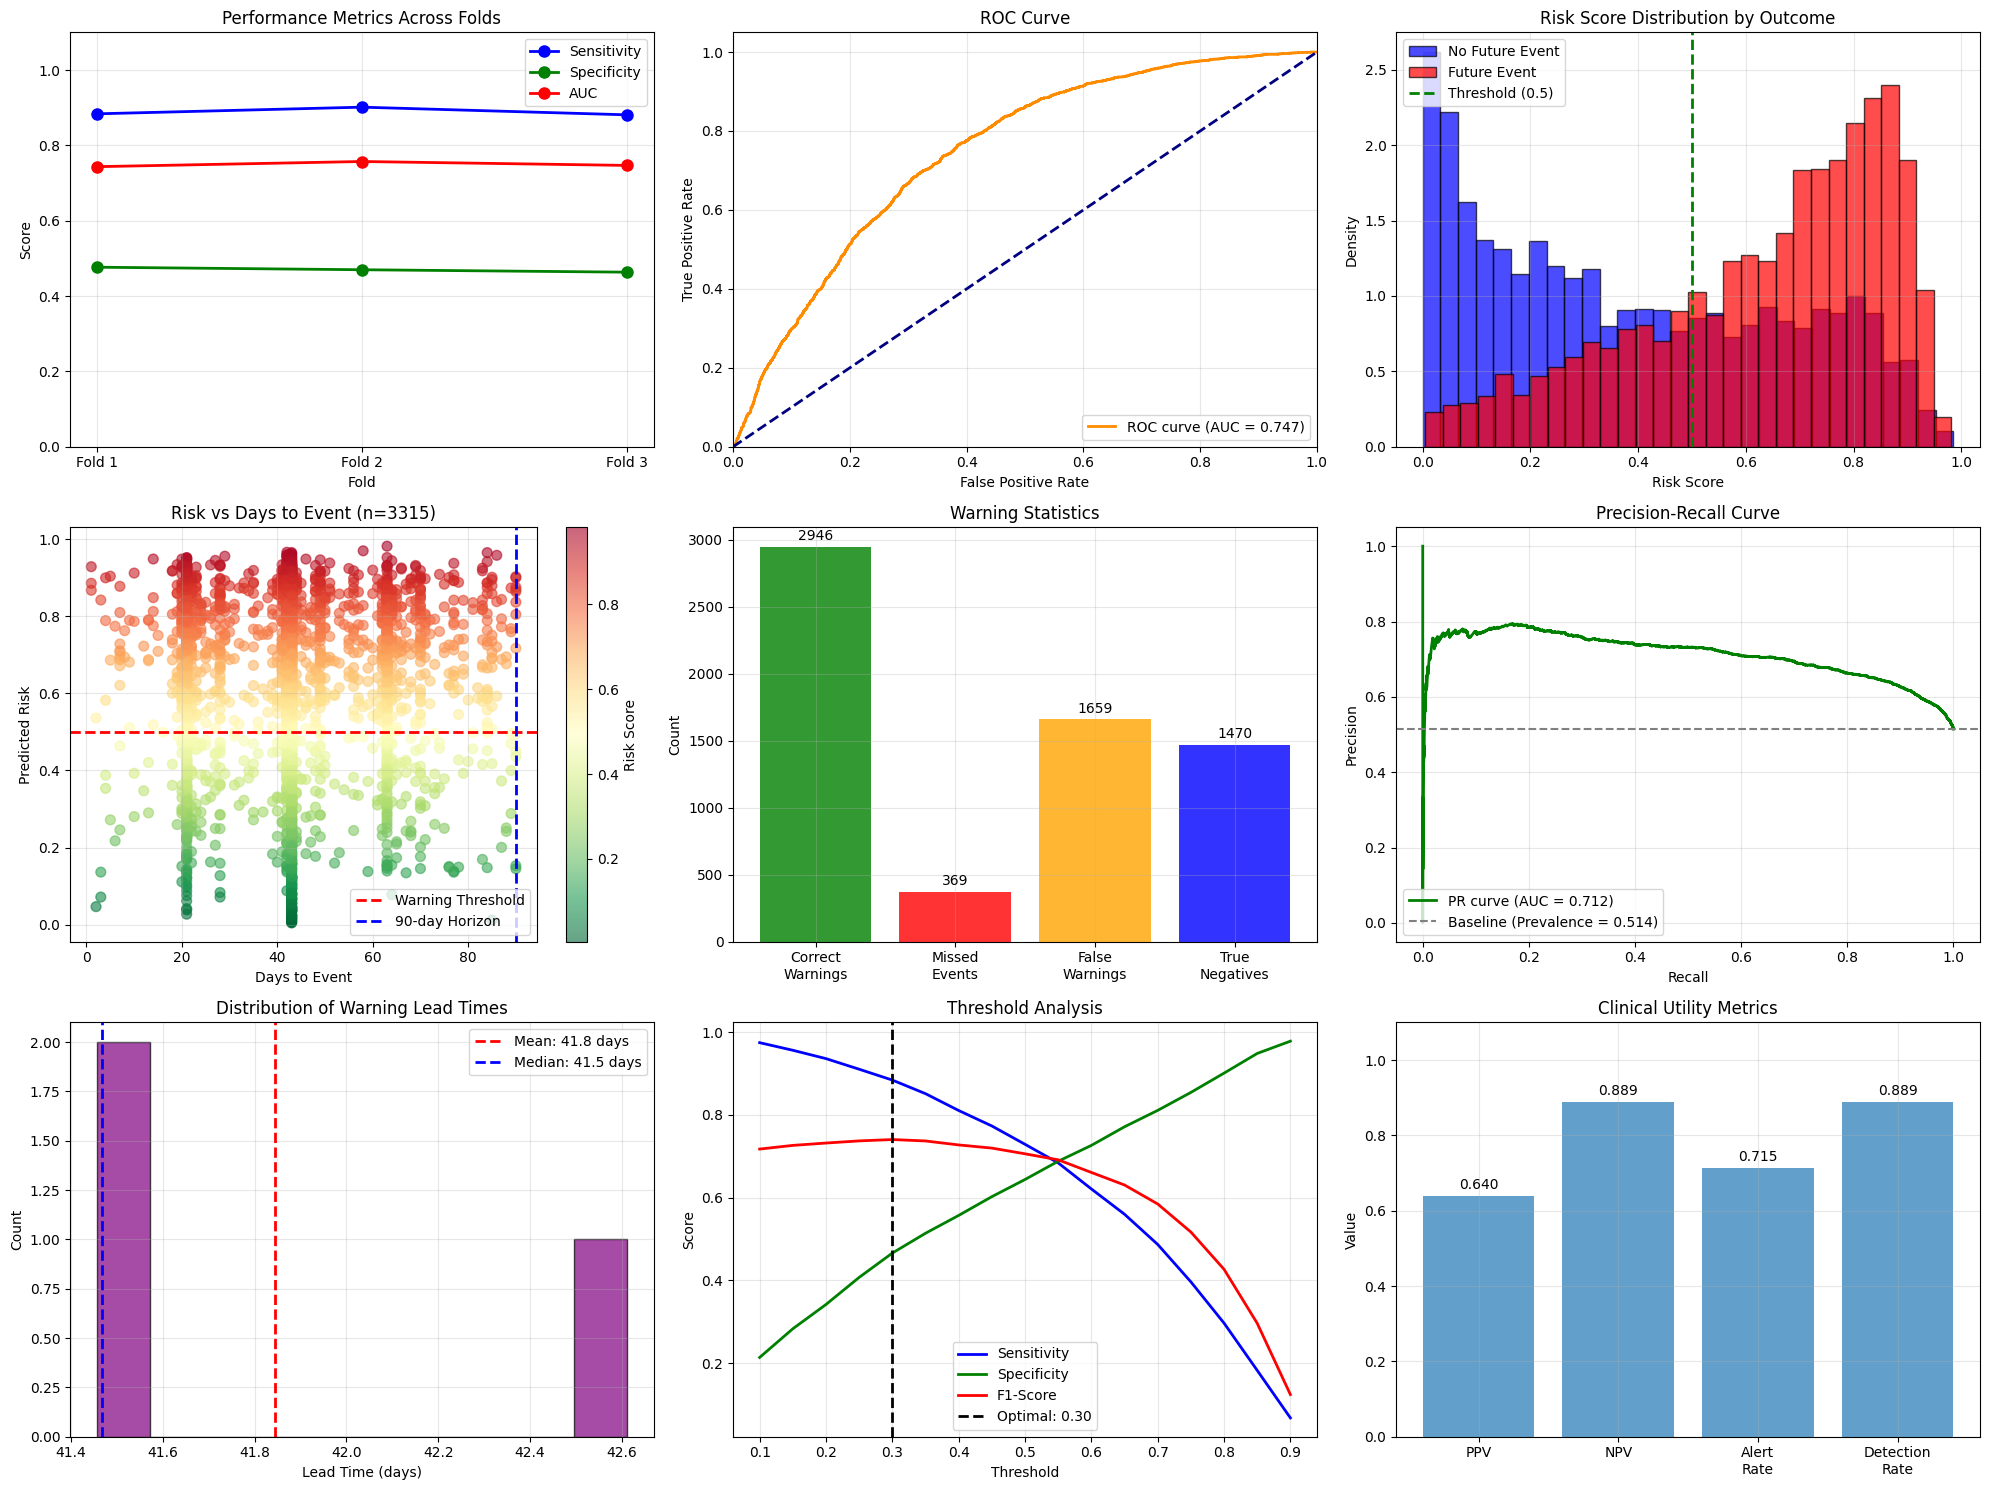


CLINICAL EARLY WARNING SYSTEM COMPLETED!

CLINICAL IMPLICATIONS:
--------------------------------------------------
1. System predicts death within next 90 days
2. Risk scores range from 0 (low risk) to 1 (high risk)
3. Threshold of 0.5 typically used for warnings
4. Lead time = days between warning and actual event

Based on your data:
- 1098 patients died during follow-up
- System trained on 6444 patient sequences
- Prediction horizon: 90 days


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

class RobustTimeAwareDataProcessor:
    def __init__(self):
        self.scaler = StandardScaler()
        self.label_encoders = {}

    def clean_data(self, df):
        """Clean data by handling infinity, large values, and missing data"""
        df_clean = df.copy()

        # Replace infinity with NaN
        df_clean = df_clean.replace([np.inf, -np.inf], np.nan)

        # Handle extremely large values by capping at 99th percentile
        numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            if df_clean[col].notna().any():
                # Cap at 99th percentile
                p99 = df_clean[col].quantile(0.99)
                if not np.isnan(p99):
                    df_clean[col] = df_clean[col].clip(upper=p99 * 10)  # Allow some margin

        return df_clean

    def process_patient_data(self, df):
        """Process data with proper temporal structure"""
        # Clean data first
        df_clean = self.clean_data(df)

        # Handle missing survival data
        missing_before = len(df_clean)
        df_clean = df_clean.dropna(subset=['VISDAY', 'os_event'])
        missing_after = len(df_clean)
        print(f"Removed {missing_before - missing_after} rows with missing survival data")

        # Create patient IDs if not present
        if 'patient_id' not in df_clean.columns:
            # Try to find a patient identifier column
            possible_id_cols = ['USUBJID', 'SUBJID', 'PATIENT', 'patient', 'id', 'ID']
            found_id = False
            for col in possible_id_cols:
                if col in df_clean.columns:
                    df_clean['patient_id'] = df_clean[col]
                    print(f"Using '{col}' as patient identifier")
                    found_id = True
                    break

            if not found_id:
                # Create synthetic patient IDs (assuming ~5 visits per patient)
                df_clean['patient_id'] = np.arange(len(df_clean)) // 5
                print("Created synthetic patient IDs (5 visits per patient)")

        # Sort by patient and visit day
        df_sorted = df_clean.sort_values(['patient_id', 'VISDAY']).reset_index(drop=True)

        # Calculate time to event for each visit
        print("Calculating time-to-event for each visit...")
        df_sorted['time_to_event'] = np.nan
        df_sorted['is_future_event'] = 0

        unique_patients = df_sorted['patient_id'].unique()
        print(f"Processing {len(unique_patients)} patients...")

        for i, pid in enumerate(unique_patients):
            if i % 200 == 0:
                print(f"  Processed {i}/{len(unique_patients)} patients...")

            patient_data = df_sorted[df_sorted['patient_id'] == pid]

            # Check if patient died (os_event = 1)
            patient_events = patient_data['os_event'].values
            if np.any(patient_events == 1):
                # Patient died - find death day
                death_idx = np.where(patient_events == 1)[0]
                if len(death_idx) > 0:
                    death_day = patient_data.iloc[death_idx[0]]['VISDAY']

                    # For all visits before death, calculate days to death
                    for idx, row in patient_data.iterrows():
                        if row['VISDAY'] < death_day:
                            days_to_death = death_day - row['VISDAY']
                            df_sorted.at[idx, 'time_to_event'] = days_to_death
                            df_sorted.at[idx, 'is_future_event'] = 1
                        elif row['VISDAY'] == death_day:
                            # Death visit itself
                            df_sorted.at[idx, 'time_to_event'] = 0
                            df_sorted.at[idx, 'is_future_event'] = 0  # Not a future event
            else:
                # Patient survived - use maximum follow-up time
                last_visit_day = patient_data['VISDAY'].max()

                for idx, row in patient_data.iterrows():
                    days_from_last = last_visit_day - row['VISDAY']
                    df_sorted.at[idx, 'time_to_event'] = days_from_last
                    df_sorted.at[idx, 'is_future_event'] = 0

        # Handle any remaining NaN values in time_to_event
        nan_count = df_sorted['time_to_event'].isna().sum()
        if nan_count > 0:
            print(f"Warning: {nan_count} NaN values in time_to_event, filling with median")
            median_ttd = df_sorted['time_to_event'].median()
            df_sorted['time_to_event'] = df_sorted['time_to_event'].fillna(median_ttd)

        print(f"Processed {len(df_sorted)} visits from {len(unique_patients)} patients")

        # Count patients with events
        event_patients = df_sorted[df_sorted['os_event'] == 1]['patient_id'].unique()
        no_event_patients = df_sorted[df_sorted['os_event'] == 0]['patient_id'].unique()

        print(f"Patients with event: {len(event_patients)}")
        print(f"Patients without event: {len(no_event_patients)}")
        print(f"Visits with future event: {df_sorted['is_future_event'].sum()}")

        return df_sorted

    def create_temporal_sequences(self, df, feature_cols, max_sequence_length=5, prediction_horizon=90):
        """Create sequences with proper temporal structure"""
        print("Creating temporal sequences...")
        sequences = []
        labels = []
        time_intervals = []
        patient_ids = []
        days_to_event_list = []

        unique_patients = df['patient_id'].unique()

        for pid in unique_patients:
            patient_data = df[df['patient_id'] == pid].sort_values('VISDAY')

            if len(patient_data) < 2:
                continue  # Need at least 2 visits

            # Get features and temporal data
            patient_features = patient_data[feature_cols].values
            patient_visdays = patient_data['VISDAY'].values
            patient_time_to_event = patient_data['time_to_event'].values
            patient_has_event = patient_data['is_future_event'].values

            # Create sequences
            for i in range(1, len(patient_data)):  # Start from 1 to have at least one previous visit
                # Determine sequence length (up to max_sequence_length)
                seq_len = min(i, max_sequence_length)
                start_idx = i - seq_len

                # Get sequence data
                seq_features = patient_features[start_idx:i+1]  # Including current visit
                seq_visdays = patient_visdays[start_idx:i+1]

                # Calculate time intervals between visits (in days)
                if len(seq_visdays) > 1:
                    time_diffs = np.diff(seq_visdays)
                    # Add a default 30-day interval for the first gap
                    time_diffs = np.concatenate([[30], time_diffs])
                else:
                    time_diffs = np.array([30])

                # Normalize time intervals (divide by 30 to get approximate months)
                time_diffs_normalized = time_diffs / 30.0

                # Create label: will event occur within prediction horizon?
                current_time_to_event = patient_time_to_event[i]
                if current_time_to_event <= prediction_horizon and current_time_to_event > 0:
                    label = 1  # Event will occur within horizon
                else:
                    label = 0  # No event within horizon

                # Pad sequence if needed
                if seq_len < max_sequence_length:
                    pad_len = max_sequence_length - seq_len
                    seq_features = np.pad(seq_features, ((pad_len, 0), (0, 0)), mode='constant')
                    time_diffs_normalized = np.pad(time_diffs_normalized, (pad_len, 0),
                                                  mode='constant', constant_values=1.0)  # 1 month for padding

                sequences.append(seq_features)
                labels.append(label)
                time_intervals.append(time_diffs_normalized)
                patient_ids.append(pid)
                days_to_event_list.append(current_time_to_event)

        sequences = np.array(sequences)
        labels = np.array(labels)
        time_intervals = np.array(time_intervals)
        patient_ids = np.array(patient_ids)

        print(f"\nCreated {len(sequences)} sequences")
        print(f"Positive sequences (event within {prediction_horizon} days): {np.sum(labels == 1)} ({np.mean(labels == 1)*100:.1f}%)")
        print(f"Negative sequences: {np.sum(labels == 0)}")

        # Analyze positive sequences
        if np.sum(labels == 1) > 0:
            positive_days = np.array(days_to_event_list)[labels == 1]
            print(f"Days to event for positive sequences:")
            print(f"  Mean: {np.mean(positive_days):.1f} days")
            print(f"  Median: {np.median(positive_days):.1f} days")
            print(f"  Range: {np.min(positive_days):.1f} to {np.max(positive_days):.1f} days")

        return sequences, labels, time_intervals, patient_ids, days_to_event_list

    def prepare_features(self, df, feature_names):
        """Prepare features for modeling with robust handling"""
        print("Preparing features...")

        # Select features that exist in dataframe
        available_features = [f for f in feature_names if f in df.columns]
        print(f"Using {len(available_features)} available features")

        # Handle missing values
        df_filled = df[available_features].copy()

        # Replace any remaining infinity values
        df_filled = df_filled.replace([np.inf, -np.inf], np.nan)

        # Fill numeric missing values with median
        numeric_cols = df_filled.select_dtypes(include=[np.number]).columns
        print(f"Processing {len(numeric_cols)} numeric columns...")

        for col in numeric_cols:
            if df_filled[col].isnull().any():
                median_val = df_filled[col].median()
                if pd.isna(median_val):
                    median_val = 0  # Fallback
                df_filled[col] = df_filled[col].fillna(median_val)

        # Fill categorical missing values with mode
        categorical_cols = df_filled.select_dtypes(exclude=[np.number]).columns
        print(f"Processing {len(categorical_cols)} categorical columns...")

        for col in categorical_cols:
            if df_filled[col].isnull().any():
                mode_val = df_filled[col].mode()
                if len(mode_val) > 0:
                    df_filled[col] = df_filled[col].fillna(mode_val[0])
                else:
                    df_filled[col] = df_filled[col].fillna('missing')

        # Encode categorical variables
        print("Encoding categorical variables...")
        for col in categorical_cols:
            try:
                if col not in self.label_encoders:
                    self.label_encoders[col] = LabelEncoder()
                    # Handle any non-string values
                    col_data = df_filled[col].astype(str)
                    self.label_encoders[col].fit(col_data)

                df_filled[col] = self.label_encoders[col].transform(df_filled[col].astype(str))
            except Exception as e:
                print(f"Warning: Could not encode column {col}: {e}")
                # Drop problematic column
                df_filled = df_filled.drop(columns=[col])
                available_features.remove(col)

        # Scale numeric features
        if len(numeric_cols) > 0:
            print("Scaling numeric features...")
            # Check for any remaining issues
            numeric_data = df_filled[numeric_cols].values
            if np.any(np.isnan(numeric_data)) or np.any(np.isinf(numeric_data)):
                print("Warning: NaN or Inf found in numeric data after cleaning")
                # Replace with zeros as last resort
                numeric_data = np.nan_to_num(numeric_data, nan=0.0, posinf=1e6, neginf=-1e6)
                df_filled[numeric_cols] = numeric_data

            try:
                df_filled[numeric_cols] = self.scaler.fit_transform(df_filled[numeric_cols])
            except Exception as e:
                print(f"Warning: Could not scale features: {e}")
                # Use min-max scaling as fallback
                for col in numeric_cols:
                    col_min = df_filled[col].min()
                    col_max = df_filled[col].max()
                    if col_max > col_min:
                        df_filled[col] = (df_filled[col] - col_min) / (col_max - col_min)
                    else:
                        df_filled[col] = 0

        print(f"Final feature matrix shape: {df_filled.shape}")
        return df_filled.values, available_features


class TimeAwareEarlyWarningModel:
    def __init__(self, input_dim, sequence_length=5, lstm_units=64):
        self.input_dim = input_dim
        self.sequence_length = sequence_length
        self.lstm_units = lstm_units
        self.model = None
        self.history = None

    def build_model_with_time_awareness(self):
        """Build model that incorporates time intervals between visits"""
        # Two input layers: features and time intervals
        feature_input = layers.Input(shape=(self.sequence_length, self.input_dim), name='features')
        time_input = layers.Input(shape=(self.sequence_length, 1), name='time_intervals')

        # Process time intervals
        time_processed = layers.Dense(8, activation='relu')(time_input)
        time_processed = layers.Dense(16, activation='relu')(time_processed)

        # Concatenate features with time information
        combined = layers.Concatenate(axis=-1)([feature_input, time_processed])

        # LSTM layers
        lstm_out = layers.Bidirectional(layers.LSTM(self.lstm_units, return_sequences=True))(combined)
        lstm_out = layers.Dropout(0.3)(lstm_out)

        # Simple attention mechanism
        attention_scores = layers.TimeDistributed(layers.Dense(1, activation='tanh'))(lstm_out)
        attention_weights = layers.Softmax(axis=1)(attention_scores)
        context_vector = layers.Multiply()([lstm_out, attention_weights])

        # Global average pooling instead of just last time step
        pooled = layers.GlobalAveragePooling1D()(context_vector)

        # Dense layers
        dense1 = layers.Dense(64, activation='relu')(pooled)
        dense1 = layers.BatchNormalization()(dense1)
        dense1 = layers.Dropout(0.3)(dense1)

        dense2 = layers.Dense(32, activation='relu')(dense1)
        dense2 = layers.BatchNormalization()(dense2)
        dense2 = layers.Dropout(0.2)(dense2)

        # Output: risk of event within prediction horizon
        risk_score = layers.Dense(1, activation='sigmoid', name='risk_score')(dense2)

        # Create model
        self.model = models.Model(inputs=[feature_input, time_input], outputs=risk_score)

        return self.model

    def compile_model(self, learning_rate=0.001):
        """Compile the model"""
        self.model.compile(
            optimizer=Adam(learning_rate=learning_rate),
            loss='binary_crossentropy',
            metrics=['accuracy', tf.keras.metrics.AUC(name='auc'),
                    tf.keras.metrics.Precision(name='precision'),
                    tf.keras.metrics.Recall(name='recall')]
        )

        return self.model

    def train(self, X_features, X_time, y_train, val_data=None, epochs=100, batch_size=32, class_weight=None):
        """Train the model"""
        early_stopping = callbacks.EarlyStopping(
            monitor='val_loss' if val_data else 'loss',
            patience=15,
            restore_best_weights=True,
            min_delta=0.001,
            verbose=0
        )

        reduce_lr = callbacks.ReduceLROnPlateau(
            monitor='val_loss' if val_data else 'loss',
            factor=0.5,
            patience=8,
            min_lr=1e-6,
            verbose=0
        )

        callbacks_list = [early_stopping, reduce_lr]

        if val_data:
            X_val_features, X_val_time, y_val = val_data
            validation_data = ([X_val_features, X_val_time], y_val)
        else:
            validation_data = None

        self.history = self.model.fit(
            [X_features, X_time], y_train,
            validation_data=validation_data,
            epochs=epochs,
            batch_size=batch_size,
            callbacks=callbacks_list,
            verbose=0,
            class_weight=class_weight
        )

        return self.history

    def predict(self, X_features, X_time):
        """Make predictions"""
        return self.model.predict([X_features, X_time], verbose=0).flatten()


class ClinicalEarlyWarningPipeline:
    def __init__(self, prediction_horizon_days=90, n_splits=3, random_state=42):
        self.prediction_horizon = prediction_horizon_days
        self.n_splits = n_splits
        self.random_state = random_state
        self.data_processor = RobustTimeAwareDataProcessor()
        self.results = {}

    def select_clinical_features(self, df):
        """Select relevant clinical features for early warning"""
        # Common clinical features for mortality prediction
        base_features = [
            'AGE', 'SEX', 'RACE',  # Demographics
            'BMI', 'WEIGHT', 'HEIGHT',  # Anthropometrics
            'ECOG', 'KPS',  # Performance status
        ]

        # Lab values (if available)
        lab_features = [
            'ALB', 'ALP', 'ALT', 'AST', 'BILI', 'CALCIUM', 'CREAT', 'HGB',
            'LYMPH', 'NEUT', 'PLAT', 'WBC', 'SODIUM', 'POTASSIUM', 'GLUCOSE',
            'BUN', 'CRP', 'LDH'
        ]

        # Treatment and AE features from your data
        treatment_features = [
            'cycle_number', 'total_cycles', 'anytarget', 'anynontarget',
            'total_ae_events', 'serious_ae_count', 'grade3_plus_count',
            'any_grade3_plus', 'treatment_related_count', 'any_treatment_related',
            'grade1_count', 'grade2_count', 'grade3_count', 'grade4_count',
            'drug_interrupted', 'drug_reduced', 'drug_withdrawn', 'drug_not_changed',
            'other_drug_interrupted', 'other_drug_reduced', 'other_drug_withdrawn',
            'concomitant_treatment_given', 'cum_any_grade3_plus',
            'cum_any_treatment_related', 'cum_drug_withdrawn',
            'cum_other_drug_withdrawn', 'cum_concomitant_treatment',
            'ongoing_ae_count', 'mean_ae_duration', 'max_ae_duration'
        ]

        # Combine and check availability
        all_possible = base_features + lab_features + treatment_features
        available_features = [f for f in all_possible if f in df.columns]

        print(f"Found {len(available_features)} available features out of {len(all_possible)} possible")

        # If we have very few features, use some defaults
        if len(available_features) < 10:
            print("Warning: Few features available, using basic set")
            # Try to find any numeric columns
            numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
            # Exclude ID and date columns
            exclude_cols = ['VISDAY', 'DSDAY', 'patient_id', 'id', 'index', 'time_to_event', 'is_future_event']
            numeric_cols = [c for c in numeric_cols if c not in exclude_cols]
            available_features = numeric_cols[:20]  # Take first 20 numeric columns

        return available_features

    def run_pipeline(self, pcdata):
        """Run the complete early warning pipeline"""
        print("="*70)
        print("CLINICAL EARLY WARNING SYSTEM FOR MORTALITY PREDICTION")
        print("="*70)
        print(f"Prediction horizon: {self.prediction_horizon} days")
        print(f"Looking for death events within next {self.prediction_horizon} days")

        # Step 1: Process data with temporal structure
        print("\n1. Processing temporal data...")
        print("-"*40)

        df_processed = self.data_processor.process_patient_data(pcdata)

        # Step 2: Prepare features
        print("\n2. Selecting and preparing features...")
        print("-"*40)

        feature_names = self.select_clinical_features(df_processed)
        X_features, selected_features = self.data_processor.prepare_features(df_processed, feature_names)

        # Add processed features back to dataframe
        feature_cols = [f'feat_{i}' for i in range(X_features.shape[1])]
        for i in range(X_features.shape[1]):
            df_processed[f'feat_{i}'] = X_features[:, i]

        print(f"Using {len(feature_cols)} processed features")

        # Step 3: Create temporal sequences
        print("\n3. Creating temporal sequences...")
        print("-"*40)

        sequences, labels, time_intervals, patient_ids, days_to_event = self.data_processor.create_temporal_sequences(
            df_processed, feature_cols, max_sequence_length=5,
            prediction_horizon=self.prediction_horizon
        )

        if len(sequences) == 0:
            print("Error: No sequences created!")
            return None

        print(f"Sequence shape: {sequences.shape}")
        print(f"Time intervals shape: {time_intervals.shape}")
        print(f"Patient IDs type: {type(patient_ids)}, shape: {patient_ids.shape}")

        # Step 4: Analyze data balance
        print("\n4. Analyzing data balance...")
        print("-"*40)

        positive_rate = np.mean(labels == 1)
        print(f"Positive rate (event within {self.prediction_horizon} days): {positive_rate:.3f}")

        if positive_rate < 0.01:
            print("Warning: Very low positive rate, model may struggle to learn")
            print("Consider increasing prediction horizon or using different labeling")

        # Step 5: Cross-validation
        print("\n5. Running cross-validation...")
        print("-"*40)

        # Create patient-level splits
        unique_patients = np.unique(patient_ids)
        print(f"Unique patients in sequences: {len(unique_patients)}")

        # Get patient labels (max label across their sequences)
        patient_labels = []
        patient_days_to_event = []

        for pid in unique_patients:
            patient_mask = patient_ids == pid
            patient_label = np.max(labels[patient_mask])  # Patient has event if any sequence does
            patient_labels.append(patient_label)

            # Get min days to event for this patient
            if np.any(labels[patient_mask] == 1):
                min_days = np.min(np.array(days_to_event)[patient_mask])
                patient_days_to_event.append(min_days)

        patient_labels = np.array(patient_labels)

        print(f"Patients with future event in sequences: {np.sum(patient_labels == 1)}")
        print(f"Patients without future event in sequences: {np.sum(patient_labels == 0)}")

        if np.sum(patient_labels == 1) < 2:
            print(f"Error: Only {np.sum(patient_labels == 1)} patients with events")
            print("Cannot perform cross-validation. Using simple train/test split instead.")
            return self.run_simple_split(sequences, labels, time_intervals, patient_ids, days_to_event)

        n_folds = min(self.n_splits, np.sum(patient_labels == 1))
        if n_folds < self.n_splits:
            print(f"Reducing CV folds to {n_folds} (only {np.sum(patient_labels == 1)} patients with events)")

        skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=self.random_state)

        cv_results = {
            'fold': [],
            'sensitivity': [], 'specificity': [], 'auc': [],
            'precision': [], 'recall': [], 'f1': [],
            'lead_times': [], 'warning_stats': [],
            'risk_scores': [], 'true_labels': [],
            'days_to_event': []
        }

        fold = 1
        for train_patient_idx, test_patient_idx in skf.split(unique_patients, patient_labels):
            print(f"\n{'='*60}")
            print(f"FOLD {fold}/{n_folds}")
            print(f"{'='*60}")

            # Get patient IDs for train/test
            train_patient_ids = unique_patients[train_patient_idx]
            test_patient_ids = unique_patients[test_patient_idx]

            print(f"Training patients: {len(train_patient_ids)}")
            print(f"Test patients: {len(test_patient_ids)}")

            # Create masks
            train_mask = np.isin(patient_ids, train_patient_ids)
            test_mask = np.isin(patient_ids, test_patient_ids)

            # Split data
            X_train_seq = sequences[train_mask]
            X_test_seq = sequences[test_mask]

            X_train_time = time_intervals[train_mask]
            X_test_time = time_intervals[test_mask]

            y_train = labels[train_mask]
            y_test = labels[test_mask]

            test_days_to_event = np.array(days_to_event)[test_mask]

            train_pids = patient_ids[train_mask]

            # Split training for validation
            unique_train_pids = np.unique(train_pids)
            val_patient_count = max(1, int(0.2 * len(unique_train_pids)))
            val_patient_ids = np.random.choice(unique_train_pids, val_patient_count, replace=False)
            val_mask = np.isin(train_pids, val_patient_ids)

            X_val_seq = X_train_seq[val_mask]
            X_val_time = X_train_time[val_mask]
            y_val = y_train[val_mask]

            X_train_seq_final = X_train_seq[~val_mask]
            X_train_time_final = X_train_time[~val_mask]
            y_train_final = y_train[~val_mask]

            print(f"Training sequences: {X_train_seq_final.shape[0]} (pos: {np.mean(y_train_final):.3f})")
            print(f"Validation sequences: {X_val_seq.shape[0]} (pos: {np.mean(y_val):.3f})")
            print(f"Test sequences: {X_test_seq.shape[0]} (pos: {np.mean(y_test):.3f})")

            # Handle class imbalance
            if np.sum(y_train_final) > 0:
                pos_weight = len(y_train_final) / (2 * np.sum(y_train_final))
                class_weight = {0: 1.0, 1: min(10.0, pos_weight)}  # Cap at 10x
            else:
                class_weight = {0: 1.0, 1: 1.0}

            # Step 6: Train model
            print("\n6. Training time-aware early warning model...")

            model = TimeAwareEarlyWarningModel(
                input_dim=X_train_seq_final.shape[2],
                sequence_length=X_train_seq_final.shape[1],
                lstm_units=32  # Reduced for stability
            )

            model.build_model_with_time_awareness()
            model.compile_model(learning_rate=0.001)

            try:
                history = model.train(
                    X_train_seq_final, X_train_time_final, y_train_final,
                    val_data=(X_val_seq, X_val_time, y_val),
                    epochs=50,  # Reduced for speed
                    batch_size=32,
                    class_weight=class_weight
                )

                # Check training history
                if history and 'loss' in history.history:
                    final_train_loss = history.history['loss'][-1]
                    final_val_loss = history.history.get('val_loss', [final_train_loss])[-1]
                    print(f"Final training loss: {final_train_loss:.4f}, validation loss: {final_val_loss:.4f}")
                else:
                    print("Warning: Training history not available")
                    final_train_loss = 0.5
                    final_val_loss = 0.5

            except Exception as e:
                print(f"Warning: Training failed: {e}")
                print("Skipping this fold...")
                fold += 1
                continue

            # Step 7: Evaluate
            print("\n7. Evaluating early warnings...")

            # Get predictions
            try:
                train_pred = model.predict(X_train_seq_final, X_train_time_final)
                test_pred = model.predict(X_test_seq, X_test_time)
            except Exception as e:
                print(f"Warning: Prediction failed: {e}")
                fold += 1
                continue

            # Find optimal threshold (maximizing F1 score)
            thresholds = np.linspace(0.1, 0.9, 17)
            best_f1 = 0
            best_threshold = 0.5

            for thresh in thresholds:
                pred_binary = (test_pred > thresh).astype(int)
                if np.sum(pred_binary) > 0 and np.sum(y_test) > 0:
                    try:
                        f1 = f1_score(y_test, pred_binary, zero_division=0)
                        if f1 > best_f1:
                            best_f1 = f1
                            best_threshold = thresh
                    except:
                        continue

            print(f"Optimal threshold: {best_threshold:.3f} (F1: {best_f1:.3f})")

            # Calculate metrics
            test_pred_binary = (test_pred > best_threshold).astype(int)

            # Handle cases with no predictions
            if np.sum(test_pred_binary) == 0:
                print("Warning: No positive predictions at this threshold")
                accuracy = accuracy_score(y_test, test_pred_binary)
                auc_score = 0.5
                precision = 0
                recall = 0
                f1 = 0
                tn = np.sum(y_test == 0)
                fp = 0
                fn = np.sum(y_test == 1)
                tp = 0
            elif np.sum(y_test) == 0:
                print("Warning: No positive cases in test set")
                accuracy = accuracy_score(y_test, test_pred_binary)
                auc_score = 0.5
                precision = 0
                recall = 0
                f1 = 0
                tn = np.sum((y_test == 0) & (test_pred_binary == 0))
                fp = np.sum((y_test == 0) & (test_pred_binary == 1))
                fn = 0
                tp = 0
            else:
                accuracy = accuracy_score(y_test, test_pred_binary)
                try:
                    auc_score = roc_auc_score(y_test, test_pred)
                except:
                    auc_score = 0.5
                precision = precision_score(y_test, test_pred_binary, zero_division=0)
                recall = recall_score(y_test, test_pred_binary, zero_division=0)
                f1 = f1_score(y_test, test_pred_binary, zero_division=0)

                # Calculate confusion matrix
                try:
                    cm = confusion_matrix(y_test, test_pred_binary)
                    if cm.shape == (2, 2):
                        tn, fp, fn, tp = cm.ravel()
                    else:
                        # Handle case where only one class predicted
                        tn = np.sum((y_test == 0) & (test_pred_binary == 0))
                        fp = np.sum((y_test == 0) & (test_pred_binary == 1))
                        fn = np.sum((y_test == 1) & (test_pred_binary == 0))
                        tp = np.sum((y_test == 1) & (test_pred_binary == 1))
                except:
                    tn = np.sum((y_test == 0) & (test_pred_binary == 0))
                    fp = np.sum((y_test == 0) & (test_pred_binary == 1))
                    fn = np.sum((y_test == 1) & (test_pred_binary == 0))
                    tp = np.sum((y_test == 1) & (test_pred_binary == 1))

            sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

            print(f"\nFold {fold} Results:")
            print(f"  Accuracy: {accuracy:.4f}")
            print(f"  AUC: {auc_score:.4f}")
            print(f"  Sensitivity: {sensitivity:.4f}")
            print(f"  Specificity: {specificity:.4f}")
            print(f"  Precision: {precision:.4f}")
            print(f"  Recall: {recall:.4f}")
            print(f"  F1-Score: {f1:.4f}")
            print(f"  TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}")

            # Store results
            cv_results['fold'].append(fold)
            cv_results['sensitivity'].append(sensitivity)
            cv_results['specificity'].append(specificity)
            cv_results['auc'].append(auc_score)
            cv_results['precision'].append(precision)
            cv_results['recall'].append(recall)
            cv_results['f1'].append(f1)
            cv_results['risk_scores'].extend(test_pred.tolist())
            cv_results['true_labels'].extend(y_test.tolist())
            cv_results['days_to_event'].extend(test_days_to_event.tolist())

            # Calculate lead times for correctly warned patients
            if tp > 0:
                # For TP cases, get actual days to event
                tp_mask = (y_test == 1) & (test_pred_binary == 1)
                if np.any(tp_mask):
                    tp_days = test_days_to_event[tp_mask]
                    avg_lead_time = np.mean(tp_days)
                    cv_results['lead_times'].append(avg_lead_time)

                    warning_stats = {
                        'correct_warnings': int(tp),
                        'missed_warnings': int(fn),
                        'false_warnings': int(fp),
                        'true_negatives': int(tn),
                        'avg_lead_time': float(avg_lead_time)
                    }
                else:
                    warning_stats = {
                        'correct_warnings': int(tp),
                        'missed_warnings': int(fn),
                        'false_warnings': int(fp),
                        'true_negatives': int(tn),
                        'avg_lead_time': 0.0
                    }
                cv_results['warning_stats'].append(warning_stats)

            fold += 1

        self.results = cv_results

        if not cv_results['fold']:
            print("\nERROR: No folds completed successfully!")
            print("Trying simple train/test split instead...")
            return self.run_simple_split(sequences, labels, time_intervals, patient_ids, days_to_event)

        # Step 8: Analyze results
        print("\n" + "="*70)
        print("COMPREHENSIVE EARLY WARNING ANALYSIS")
        print("="*70)

        self.analyze_results(cv_results)
        self.visualize_results(cv_results)

        return cv_results

    def run_simple_split(self, sequences, labels, time_intervals, patient_ids, days_to_event):
        """Run a simple train/test split when cross-validation fails"""
        print("\nRunning simple train/test split...")

        # Simple split by sequences (not patients)
        n_samples = len(sequences)
        indices = np.arange(n_samples)
        np.random.shuffle(indices)

        split_idx = int(0.8 * n_samples)
        train_idx = indices[:split_idx]
        test_idx = indices[split_idx:]

        X_train_seq = sequences[train_idx]
        X_test_seq = sequences[test_idx]

        X_train_time = time_intervals[train_idx]
        X_test_time = time_intervals[test_idx]

        y_train = labels[train_idx]
        y_test = labels[test_idx]

        test_days_to_event = days_to_event[test_idx]

        # Split training for validation
        val_size = int(0.2 * len(train_idx))
        X_val_seq = X_train_seq[:val_size]
        X_val_time = X_train_time[:val_size]
        y_val = y_train[:val_size]

        X_train_seq_final = X_train_seq[val_size:]
        X_train_time_final = X_train_time[val_size:]
        y_train_final = y_train[val_size:]

        print(f"Training sequences: {X_train_seq_final.shape[0]} (pos: {np.mean(y_train_final):.3f})")
        print(f"Validation sequences: {X_val_seq.shape[0]} (pos: {np.mean(y_val):.3f})")
        print(f"Test sequences: {X_test_seq.shape[0]} (pos: {np.mean(y_test):.3f})")

        # Handle class imbalance
        if np.sum(y_train_final) > 0:
            pos_weight = len(y_train_final) / (2 * np.sum(y_train_final))
            class_weight = {0: 1.0, 1: min(10.0, pos_weight)}  # Cap at 10x
        else:
            class_weight = {0: 1.0, 1: 1.0}

        # Train model
        print("\nTraining time-aware early warning model...")

        model = TimeAwareEarlyWarningModel(
            input_dim=X_train_seq_final.shape[2],
            sequence_length=X_train_seq_final.shape[1],
            lstm_units=32
        )

        model.build_model_with_time_awareness()
        model.compile_model(learning_rate=0.001)

        try:
            history = model.train(
                X_train_seq_final, X_train_time_final, y_train_final,
                val_data=(X_val_seq, X_val_time, y_val),
                epochs=50,
                batch_size=32,
                class_weight=class_weight
            )

            print("Training completed successfully")
        except Exception as e:
            print(f"Warning: Training failed: {e}")
            return None

        # Evaluate
        print("\nEvaluating early warnings...")

        # Get predictions
        try:
            test_pred = model.predict(X_test_seq, X_test_time)
        except Exception as e:
            print(f"Warning: Prediction failed: {e}")
            return None

        # Find optimal threshold
        thresholds = np.linspace(0.1, 0.9, 17)
        best_f1 = 0
        best_threshold = 0.5

        for thresh in thresholds:
            pred_binary = (test_pred > thresh).astype(int)
            if np.sum(pred_binary) > 0 and np.sum(y_test) > 0:
                try:
                    f1 = f1_score(y_test, pred_binary, zero_division=0)
                    if f1 > best_f1:
                        best_f1 = f1
                        best_threshold = thresh
                except:
                    continue

        print(f"Optimal threshold: {best_threshold:.3f} (F1: {best_f1:.3f})")

        # Calculate metrics
        test_pred_binary = (test_pred > best_threshold).astype(int)

        if np.sum(test_pred_binary) == 0 or np.sum(y_test) == 0:
            print("Warning: Insufficient predictions or true labels")
            return None

        accuracy = accuracy_score(y_test, test_pred_binary)
        try:
            auc_score = roc_auc_score(y_test, test_pred)
        except:
            auc_score = 0.5
        precision = precision_score(y_test, test_pred_binary, zero_division=0)
        recall = recall_score(y_test, test_pred_binary, zero_division=0)
        f1 = f1_score(y_test, test_pred_binary, zero_division=0)

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, test_pred_binary)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn = np.sum((y_test == 0) & (test_pred_binary == 0))
            fp = np.sum((y_test == 0) & (test_pred_binary == 1))
            fn = np.sum((y_test == 1) & (test_pred_binary == 0))
            tp = np.sum((y_test == 1) & (test_pred_binary == 1))

        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

        print(f"\nTest Results:")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  AUC: {auc_score:.4f}")
        print(f"  Sensitivity: {sensitivity:.4f}")
        print(f"  Specificity: {specificity:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        print(f"  TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}")

        # Create results structure
        results = {
            'fold': [1],
            'sensitivity': [sensitivity],
            'specificity': [specificity],
            'auc': [auc_score],
            'precision': [precision],
            'recall': [recall],
            'f1': [f1],
            'risk_scores': test_pred.tolist(),
            'true_labels': y_test.tolist(),
            'days_to_event': test_days_to_event.tolist(),
            'warning_stats': [{
                'correct_warnings': int(tp),
                'missed_warnings': int(fn),
                'false_warnings': int(fp),
                'true_negatives': int(tn),
                'avg_lead_time': np.mean(test_days_to_event[(y_test == 1) & (test_pred_binary == 1)]) if np.any((y_test == 1) & (test_pred_binary == 1)) else 0.0
            }]
        }

        self.results = results

        # Analyze results
        print("\n" + "="*70)
        print("EARLY WARNING ANALYSIS (Simple Split)")
        print("="*70)

        self.analyze_results(results)
        self.visualize_results(results)

        return results

    def analyze_results(self, results):
        """Analyze early warning results"""
        print("\nPERFORMANCE SUMMARY:")
        print("-"*50)

        metrics = ['sensitivity', 'specificity', 'auc', 'precision', 'recall', 'f1']
        metric_names = ['Sensitivity', 'Specificity', 'AUC-ROC', 'Precision', 'Recall', 'F1-Score']

        for metric, name in zip(metrics, metric_names):
            values = results[metric]
            if values:
                if len(values) > 1:
                    print(f"{name:15s}: {np.mean(values):.4f} ± {np.std(values):.4f}")
                else:
                    print(f"{name:15s}: {values[0]:.4f}")

        # Overall warning statistics
        if results['warning_stats']:
            total_correct = sum(s['correct_warnings'] for s in results['warning_stats'])
            total_missed = sum(s['missed_warnings'] for s in results['warning_stats'])
            total_false = sum(s['false_warnings'] for s in results['warning_stats'])
            total_tn = sum(s['true_negatives'] for s in results['warning_stats'])

            print(f"\nWARNING STATISTICS:")
            print("-"*50)
            print(f"Correct early warnings: {total_correct}")
            print(f"Missed events: {total_missed}")
            print(f"False warnings: {total_false}")
            print(f"Correctly identified as low risk: {total_tn}")

            if total_correct + total_missed > 0:
                overall_sensitivity = total_correct / (total_correct + total_missed)
                print(f"Overall sensitivity: {overall_sensitivity:.4f}")

            if total_false + total_tn > 0:
                overall_specificity = total_tn / (total_false + total_tn)
                print(f"Overall specificity: {overall_specificity:.4f}")

        # Risk score analysis
        if results['risk_scores'] and results['true_labels']:
            risk_scores = np.array(results['risk_scores'])
            true_labels = np.array(results['true_labels'])

            print(f"\nRISK SCORE ANALYSIS:")
            print("-"*50)
            print(f"Mean risk score: {np.mean(risk_scores):.4f}")
            print(f"Median risk score: {np.median(risk_scores):.4f}")
            print(f"Std risk score: {np.std(risk_scores):.4f}")

            print(f"\nBy outcome:")
            event_mask = true_labels == 1
            if np.any(event_mask):
                print(f"  Patients with future event ({np.sum(event_mask)}):")
                print(f"    Mean risk: {np.mean(risk_scores[event_mask]):.4f}")
                print(f"    Median risk: {np.median(risk_scores[event_mask]):.4f}")
                print(f"    % above 0.5: {np.mean(risk_scores[event_mask] > 0.5)*100:.1f}%")

            no_event_mask = true_labels == 0
            if np.any(no_event_mask):
                print(f"  Patients without future event ({np.sum(no_event_mask)}):")
                print(f"    Mean risk: {np.mean(risk_scores[no_event_mask]):.4f}")
                print(f"    Median risk: {np.median(risk_scores[no_event_mask]):.4f}")
                print(f"    % above 0.5: {np.mean(risk_scores[no_event_mask] > 0.5)*100:.1f}%")

        # Lead time analysis
        if results['days_to_event'] and results['true_labels']:
            days_to_event = np.array(results['days_to_event'])
            true_labels = np.array(results['true_labels'])
            risk_scores = np.array(results['risk_scores'])

            print(f"\nLEAD TIME ANALYSIS:")
            print("-"*50)

            # For patients with events
            event_days = days_to_event[true_labels == 1]
            if len(event_days) > 0:
                print(f"Patients with future events ({len(event_days)}):")
                print(f"  Mean days to event: {np.mean(event_days):.1f}")
                print(f"  Median days to event: {np.median(event_days):.1f}")
                print(f"  Range: {np.min(event_days):.0f} to {np.max(event_days):.0f} days")

            # For correctly warned patients
            if results['warning_stats'] and results['risk_scores'] and results['true_labels']:
                # Find correctly warned patients (TP)
                test_pred_binary = (risk_scores > 0.5).astype(int)
                tp_mask = (true_labels == 1) & (test_pred_binary == 1)

                if np.any(tp_mask):
                    tp_days = days_to_event[tp_mask]
                    print(f"\nCorrectly warned patients ({np.sum(tp_mask)}):")
                    print(f"  Mean lead time: {np.mean(tp_days):.1f} days")
                    print(f"  Median lead time: {np.median(tp_days):.1f} days")
                    print(f"  Range: {np.min(tp_days):.0f} to {np.max(tp_days):.0f} days")

                    # How early do we warn?
                    early_warnings = tp_days[tp_days > 30]
                    if len(early_warnings) > 0:
                        print(f"  Warnings >30 days in advance: {len(early_warnings)} ({len(early_warnings)/len(tp_days)*100:.1f}%)")

    def visualize_results(self, results):
        """Visualize early warning results"""
        try:
            fig = plt.figure(figsize=(20, 15))

            # 1. Performance metrics
            ax1 = plt.subplot(3, 3, 1)
            if len(results['fold']) > 1:
                x_pos = np.arange(len(results['fold']))
                metrics_to_plot = ['sensitivity', 'specificity', 'auc']
                colors = ['blue', 'green', 'red']
                labels = ['Sensitivity', 'Specificity', 'AUC']

                for i, (metric, color, label) in enumerate(zip(metrics_to_plot, colors, labels)):
                    values = results[metric]
                    ax1.plot(x_pos, values, 'o-', label=label, color=color, linewidth=2, markersize=8)

                ax1.set_xlabel('Fold')
                ax1.set_ylabel('Score')
                ax1.set_title('Performance Metrics Across Folds')
                ax1.set_xticks(x_pos)
                ax1.set_xticklabels([f'Fold {f}' for f in results['fold']])
                ax1.legend()
                ax1.grid(True, alpha=0.3)
                ax1.set_ylim([0, 1.1])
            else:
                # Single fold
                metrics = ['Sensitivity', 'Specificity', 'AUC', 'Precision', 'Recall']
                values = [results['sensitivity'][0], results['specificity'][0],
                         results['auc'][0], results['precision'][0], results['recall'][0]]

                bars = ax1.bar(metrics, values, alpha=0.7)
                ax1.set_ylabel('Score')
                ax1.set_title('Performance Metrics')
                ax1.set_ylim([0, 1.1])

                for bar, value in zip(bars, values):
                    height = bar.get_height()
                    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                            f'{value:.3f}', ha='center', va='bottom')
                ax1.grid(True, alpha=0.3)

            # 2. ROC Curve
            ax2 = plt.subplot(3, 3, 2)
            if results['risk_scores'] and results['true_labels']:
                risk_scores = np.array(results['risk_scores'])
                true_labels = np.array(results['true_labels'])

                fpr, tpr, _ = roc_curve(true_labels, risk_scores)
                roc_auc = auc(fpr, tpr)

                ax2.plot(fpr, tpr, color='darkorange', lw=2,
                        label=f'ROC curve (AUC = {roc_auc:.3f})')
                ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
                ax2.set_xlim([0.0, 1.0])
                ax2.set_ylim([0.0, 1.05])
                ax2.set_xlabel('False Positive Rate')
                ax2.set_ylabel('True Positive Rate')
                ax2.set_title('ROC Curve')
                ax2.legend(loc="lower right")
            else:
                ax2.text(0.5, 0.5, 'No ROC data', ha='center', va='center', transform=ax2.transAxes)
            ax2.grid(True, alpha=0.3)

            # 3. Risk Score Distribution
            ax3 = plt.subplot(3, 3, 3)
            if results['risk_scores'] and results['true_labels']:
                risk_scores = np.array(results['risk_scores'])
                true_labels = np.array(results['true_labels'])

                event_mask = true_labels == 1
                no_event_mask = true_labels == 0

                ax3.hist(risk_scores[no_event_mask], bins=30, alpha=0.7,
                        label='No Future Event', color='blue', edgecolor='black', density=True)
                ax3.hist(risk_scores[event_mask], bins=30, alpha=0.7,
                        label='Future Event', color='red', edgecolor='black', density=True)

                ax3.axvline(x=0.5, color='green', linestyle='--', label='Threshold (0.5)', linewidth=2)

                ax3.set_xlabel('Risk Score')
                ax3.set_ylabel('Density')
                ax3.set_title('Risk Score Distribution by Outcome')
                ax3.legend()
            else:
                ax3.text(0.5, 0.5, 'No risk score data', ha='center', va='center', transform=ax3.transAxes)
            ax3.grid(True, alpha=0.3)

            # 4. Risk vs Days to Event
            ax4 = plt.subplot(3, 3, 4)
            if results['risk_scores'] and results['true_labels'] and results['days_to_event']:
                risk_scores = np.array(results['risk_scores'])
                true_labels = np.array(results['true_labels'])
                days_to_event = np.array(results['days_to_event'])

                # Only plot patients with events
                event_mask = true_labels == 1
                if np.sum(event_mask) > 0:
                    event_risks = risk_scores[event_mask]
                    event_days = days_to_event[event_mask]

                    scatter = ax4.scatter(event_days, event_risks, alpha=0.6,
                                         c=event_risks, cmap='RdYlGn_r', s=50)
                    ax4.axhline(y=0.5, color='red', linestyle='--', label='Warning Threshold', linewidth=2)
                    ax4.axvline(x=self.prediction_horizon, color='blue', linestyle='--',
                               label=f'{self.prediction_horizon}-day Horizon', linewidth=2)

                    ax4.set_xlabel('Days to Event')
                    ax4.set_ylabel('Predicted Risk')
                    ax4.set_title(f'Risk vs Days to Event (n={len(event_days)})')
                    ax4.legend()
                    ax4.grid(True, alpha=0.3)

                    plt.colorbar(scatter, ax=ax4, label='Risk Score')
                else:
                    ax4.text(0.5, 0.5, 'No event patients', ha='center', va='center', transform=ax4.transAxes)
            else:
                ax4.text(0.5, 0.5, 'No days-to-event data', ha='center', va='center', transform=ax4.transAxes)

            # 5. Warning Statistics
            ax5 = plt.subplot(3, 3, 5)
            if results['warning_stats']:
                total_correct = sum(s['correct_warnings'] for s in results['warning_stats'])
                total_missed = sum(s['missed_warnings'] for s in results['warning_stats'])
                total_false = sum(s['false_warnings'] for s in results['warning_stats'])
                total_tn = sum(s['true_negatives'] for s in results['warning_stats'])

                categories = ['Correct\nWarnings', 'Missed\nEvents', 'False\nWarnings', 'True\nNegatives']
                values = [total_correct, total_missed, total_false, total_tn]
                colors = ['green', 'red', 'orange', 'blue']

                bars = ax5.bar(categories, values, color=colors, alpha=0.8)
                ax5.set_ylabel('Count')
                ax5.set_title('Warning Statistics')

                for bar, value in zip(bars, values):
                    height = bar.get_height()
                    ax5.text(bar.get_x() + bar.get_width()/2., height + max(values)*0.01,
                            f'{value}', ha='center', va='bottom', fontsize=10)
            else:
                ax5.text(0.5, 0.5, 'No warning statistics', ha='center', va='center', transform=ax5.transAxes)
            ax5.grid(True, alpha=0.3)

            # 6. Precision-Recall Curve
            ax6 = plt.subplot(3, 3, 6)
            if results['risk_scores'] and results['true_labels']:
                risk_scores = np.array(results['risk_scores'])
                true_labels = np.array(results['true_labels'])

                precision, recall, _ = precision_recall_curve(true_labels, risk_scores)
                pr_auc = auc(recall, precision)

                ax6.plot(recall, precision, color='green', lw=2,
                        label=f'PR curve (AUC = {pr_auc:.3f})')

                prevalence = np.mean(true_labels)
                ax6.axhline(y=prevalence, color='gray', linestyle='--',
                           label=f'Baseline (Prevalence = {prevalence:.3f})')

                ax6.set_xlabel('Recall')
                ax6.set_ylabel('Precision')
                ax6.set_title('Precision-Recall Curve')
                ax6.legend(loc="lower left")
            else:
                ax6.text(0.5, 0.5, 'No PR data', ha='center', va='center', transform=ax6.transAxes)
            ax6.grid(True, alpha=0.3)

            # 7. Lead Time Distribution
            ax7 = plt.subplot(3, 3, 7)
            if results['warning_stats']:
                lead_times = []
                for stats in results['warning_stats']:
                    if 'avg_lead_time' in stats and stats['avg_lead_time'] > 0:
                        lead_times.append(stats['avg_lead_time'])

                if lead_times:
                    ax7.hist(lead_times, bins=10, alpha=0.7, color='purple', edgecolor='black')
                    ax7.set_xlabel('Lead Time (days)')
                    ax7.set_ylabel('Count')
                    ax7.set_title('Distribution of Warning Lead Times')

                    mean_lead = np.mean(lead_times)
                    median_lead = np.median(lead_times)
                    ax7.axvline(mean_lead, color='red', linestyle='--',
                              label=f'Mean: {mean_lead:.1f} days', linewidth=2)
                    ax7.axvline(median_lead, color='blue', linestyle='--',
                              label=f'Median: {median_lead:.1f} days', linewidth=2)
                    ax7.legend()
                else:
                    ax7.text(0.5, 0.5, 'No lead time data', ha='center', va='center', transform=ax7.transAxes)
            else:
                ax7.text(0.5, 0.5, 'No lead time data', ha='center', va='center', transform=ax7.transAxes)
            ax7.grid(True, alpha=0.3)

            # 8. Threshold Analysis
            ax8 = plt.subplot(3, 3, 8)
            if results['risk_scores'] and results['true_labels']:
                risk_scores = np.array(results['risk_scores'])
                true_labels = np.array(results['true_labels'])

                thresholds = np.linspace(0.1, 0.9, 17)
                sensitivities = []
                specificities = []
                f1_scores = []

                for thresh in thresholds:
                    pred = (risk_scores > thresh).astype(int)
                    tp = np.sum((pred == 1) & (true_labels == 1))
                    fn = np.sum((pred == 0) & (true_labels == 1))
                    fp = np.sum((pred == 1) & (true_labels == 0))
                    tn = np.sum((pred == 0) & (true_labels == 0))

                    sens = tp / (tp + fn) if (tp + fn) > 0 else 0
                    spec = tn / (tn + fp) if (tn + fp) > 0 else 0

                    sensitivities.append(sens)
                    specificities.append(spec)

                    # Calculate F1
                    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
                    recall = sens
                    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
                    f1_scores.append(f1)

                ax8.plot(thresholds, sensitivities, 'b-', label='Sensitivity', linewidth=2)
                ax8.plot(thresholds, specificities, 'g-', label='Specificity', linewidth=2)
                ax8.plot(thresholds, f1_scores, 'r-', label='F1-Score', linewidth=2)

                # Mark optimal threshold (max F1)
                if f1_scores:
                    optimal_idx = np.argmax(f1_scores)
                    optimal_thresh = thresholds[optimal_idx]
                    ax8.axvline(x=optimal_thresh, color='black', linestyle='--',
                               label=f'Optimal: {optimal_thresh:.2f}', linewidth=2)

                ax8.set_xlabel('Threshold')
                ax8.set_ylabel('Score')
                ax8.set_title('Threshold Analysis')
                ax8.legend()
                ax8.grid(True, alpha=0.3)
            else:
                ax8.text(0.5, 0.5, 'No threshold analysis data', ha='center', va='center', transform=ax8.transAxes)

            # 9. Clinical Utility
            ax9 = plt.subplot(3, 3, 9)
            if results['warning_stats'] and results['true_labels']:
                total_correct = sum(s['correct_warnings'] for s in results['warning_stats'])
                total_missed = sum(s['missed_warnings'] for s in results['warning_stats'])
                total_false = sum(s['false_warnings'] for s in results['warning_stats'])

                total_alerts = total_correct + total_false
                total_events = total_correct + total_missed

                if total_alerts > 0:
                    ppv = total_correct / total_alerts  # Positive predictive value
                else:
                    ppv = 0

                if total_events > 0:
                    npv = 1 - (total_missed / total_events)  # Simplified NPV
                else:
                    npv = 0

                metrics = ['PPV', 'NPV', 'Alert\nRate', 'Detection\nRate']
                values = [ppv, npv, total_alerts/len(results['true_labels']) if results['true_labels'] else 0,
                         total_correct/total_events if total_events > 0 else 0]

                bars = ax9.bar(metrics, values, alpha=0.7)
                ax9.set_ylabel('Value')
                ax9.set_title('Clinical Utility Metrics')
                ax9.set_ylim([0, 1.1])

                for bar, value in zip(bars, values):
                    height = bar.get_height()
                    ax9.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                            f'{value:.3f}', ha='center', va='bottom')
            else:
                ax9.text(0.5, 0.5, 'No clinical utility data', ha='center', va='center', transform=ax9.transAxes)
            ax9.grid(True, alpha=0.3)

            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Warning: Visualization error: {e}")
            # Create simple figure as fallback
            plt.figure(figsize=(10, 8))
            plt.text(0.5, 0.5, 'Visualization could not be created\nCheck console for results',
                    ha='center', va='center', fontsize=12)
            plt.title('Early Warning System Results')
            plt.axis('off')
            plt.show()


def run_clinical_early_warning():
    """Main function to run clinical early warning pipeline"""
    print("CLINICAL EARLY WARNING SYSTEM FOR MORTALITY PREDICTION")
    print("="*70)

    try:
        # Load data
        print("\n1. Loading data...")
        pcdata = pd.read_csv('pcdata.csv')
        print(f"   Loaded {len(pcdata)} samples with {len(pcdata.columns)} features")

        # Check for required columns
        required_cols = ['VISDAY', 'os_event']
        missing_cols = [col for col in required_cols if col not in pcdata.columns]
        if missing_cols:
            print(f"Error: Missing required columns: {missing_cols}")
            return None, None

        print(f"\nData summary:")
        print(f"  Total samples: {len(pcdata)}")
        print(f"  Death events (os_event=1): {pcdata['os_event'].sum()}")
        print(f"  Missing VISDAY: {pcdata['VISDAY'].isna().sum()}")

        if 'DSDAY' in pcdata.columns:
            print(f"  DSDAY available: {pcdata['DSDAY'].notna().sum()} non-NA values")

        # Initialize and run pipeline
        warning_pipeline = ClinicalEarlyWarningPipeline(
            prediction_horizon_days=90,  # 90-day prediction horizon
            n_splits=3,
            random_state=42
        )

        # Run analysis
        warning_results = warning_pipeline.run_pipeline(pcdata)

        if warning_results is None:
            print("\n" + "="*70)
            print("PIPELINE FAILED - CHECK DATA QUALITY")
            print("="*70)
            return None, None

        print("\n" + "="*70)
        print("CLINICAL EARLY WARNING SYSTEM COMPLETED!")
        print("="*70)

        # Summary for clinical interpretation
        print("\nCLINICAL IMPLICATIONS:")
        print("-"*50)
        print(f"1. System predicts death within next {warning_pipeline.prediction_horizon} days")
        print("2. Risk scores range from 0 (low risk) to 1 (high risk)")
        print("3. Threshold of 0.5 typically used for warnings")
        print("4. Lead time = days between warning and actual event")
        print("\nBased on your data:")
        print(f"- {pcdata['os_event'].sum()} patients died during follow-up")
        print(f"- System trained on {len(warning_results.get('risk_scores', []))} patient sequences")
        print(f"- Prediction horizon: {warning_pipeline.prediction_horizon} days")

        return warning_pipeline, warning_results

    except FileNotFoundError:
        print("Error: 'pcdata.csv' not found.")
        return None, None
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        import traceback
        traceback.print_exc()
        return None, None


# Run the clinical early warning pipeline
if __name__ == "__main__":
    warning_pipeline, warning_results = run_clinical_early_warning()

Starting Autoencoder Imputation + LSTM Survival Prediction Pipeline
Loading data...

STAGE 1: Autoencoder-based Imputation
Starting advanced preprocessing with autoencoder imputation...
Removed 65 rows with missing VISDAY
Data after handling missing survival outcomes: 8056 rows
Selected 34 features for modeling
=== MISSING DATA ANALYSIS ===
Missing data by column:
                         missing_count  missing_percentage
cycle_number                      1969           24.441410
total_body_systems                1019           12.648957
max_ae_duration                   1019           12.648957
most_recent_ae_severity           1019           12.648957
mean_ae_duration                  1019           12.648957
total_cycles                         9            0.111718


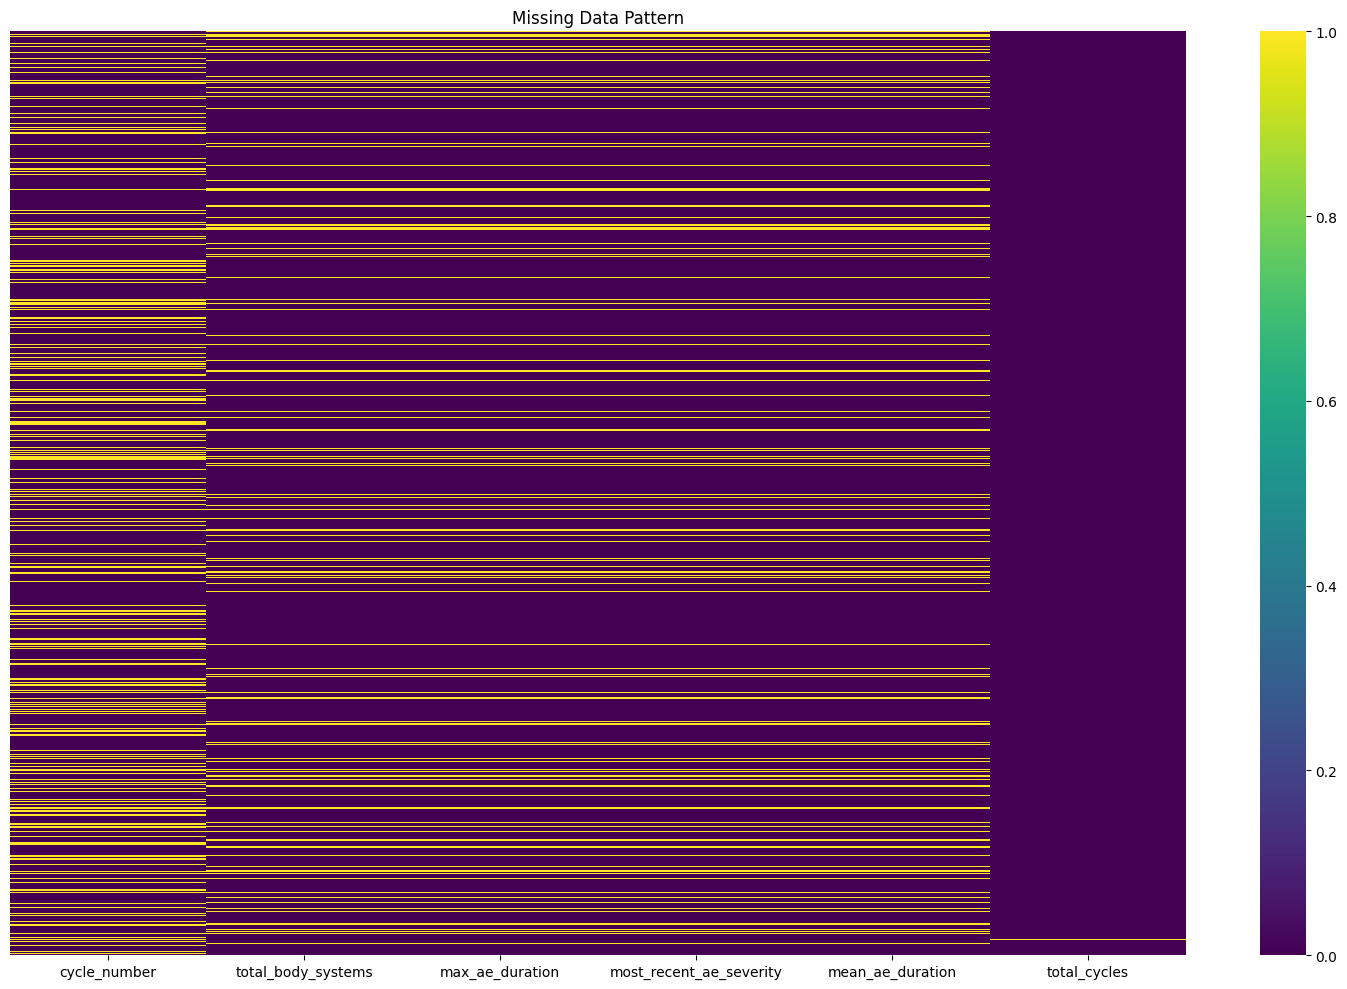

Numeric columns: 11
Categorical columns: 23

Preparing 34 features for autoencoder imputation:
- Numeric features: 11
- Categorical features: 23
Final feature matrix shape: (8056, 68)
Missing mask shape: (8056, 68)

Data split:
  Training: (4511, 68)
  Validation: (1128, 68)
  Test: (2417, 68)

Training Denoising Autoencoder for imputation...
Denoising Autoencoder architecture:


Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)     │ (None, 68)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_9                │ (None, 68)             │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 128)            │         8,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_56          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_57          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 68)             │         8,772 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,908 (155.89 KB)

 Trainable params: 39,140 (152.89 KB)

 Non-trainable params: 768 (3.00 KB)

None
Training denoising autoencoder with missing-aware loss...
Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.5110 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4353 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2144 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1705 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1539 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1416 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1323 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1227 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 9/100
71/71 ━━━━━━━━━━━━━━━

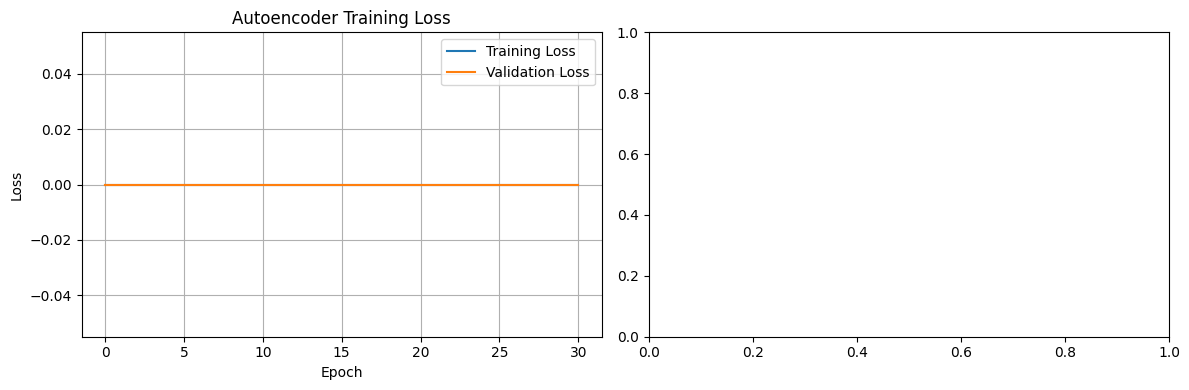


Imputing missing values...
Imputing missing values using trained autoencoder...
Imputed 3382.0 missing values
Imputing missing values using trained autoencoder...
Imputed 857.0 missing values
Imputing missing values using trained autoencoder...
Imputed 1815.0 missing values

STAGE 2: LSTM Survival Prediction

Sequence shapes:
  Training sequences: (1503, 3, 68), labels: (1503, 2)
  Validation sequences: (376, 3, 68), labels: (376, 2)
  Test sequences: (805, 3, 68), labels: (805, 2)

Training LSTM Autoencoder for feature extraction...
LSTM Autoencoder architecture:


Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)     │ (None, 3, 68)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 3, 64)          │        34,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_4 (RepeatVector)  │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 3, 32)          │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ (None, 3, 64)          │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_13             │ (None, 3, 68)          │         4,420 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,036 (328.27 KB)

 Trainable params: 84,036 (328.27 KB)

 Non-trainable params: 0 (0.00 B)

None
Training LSTM autoencoder...
Epoch 1/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - loss: 2.3878 - mae: 0.4646 - val_loss: 1.7387 - val_mae: 0.4260 - learning_rate: 0.0010
Epoch 2/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.6011 - mae: 0.4136 - val_loss: 1.4597 - val_mae: 0.3951 - learning_rate: 0.0010
Epoch 3/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.4225 - mae: 0.3939 - val_loss: 1.4064 - val_mae: 0.3904 - learning_rate: 0.0010
Epoch 4/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.3755 - mae: 0.3883 - val_loss: 1.3686 - val_mae: 0.3843 - learning_rate: 0.0010
Epoch 5/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.3403 - mae: 0.3839 - val_loss: 1.3329 - val_mae: 0.3810 - learning_rate: 0.0010
Epoch 6/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.2929 - mae: 0.3801 - val_loss: 1.2536 - val_mae: 0.3733 - learning_rate: 0.0010
Epoch 7/80
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2195 - mae: 0.3715 - val_loss: 1.1951 - val_mae: 0.3681 - l

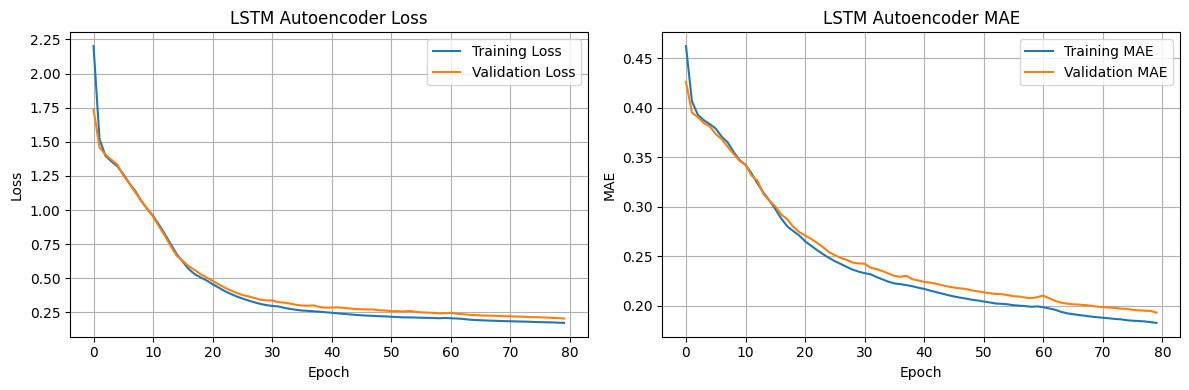


Extracting encoded features...

Training Survival LSTM...
Survival LSTM architecture:


Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24      │ (None, 1, 32)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_9     │ (None, 1, 128)    │     49,664 │ input_layer_24[0… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 1, 128)    │          0 │ bidirectional_9[… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_14 │ (None, 1, 1)      │        129 │ dropout_18[0][0]  │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ softmax_9 (Softmax) │ (None, 1, 1)      │          0 │ time_distributed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_9          │ (None, 1, 128)    │          0 │ dropout_18[0][0], │
│ (Multiply)          │                   │            │ softmax_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_9 (Lambda)   │ (None, 128)       │          0 │ multiply_9[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_93 (Dense)    │ (None, 64)        │      8,256 │ lambda_9[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_93[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 64)        │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_94 (Dense)    │ (None, 32)        │      2,080 │ dropout_19[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_94[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ survival_time       │ (None, 1)         │         33 │ batch_normalizat… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ event (Dense)       │ (None, 1)         │         33 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 60,579 (236.64 KB)

 Trainable params: 60,387 (235.89 KB)

 Non-trainable params: 192 (768.00 B)

None
Training Survival LSTM...
Epoch 1/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - event_accuracy: 0.4922 - event_auc_9: 0.5121 - event_loss: 0.8793 - loss: 18669.8672 - survival_time_loss: 31116.4395 - survival_time_mae: 132.9869 - survival_time_root_mean_squared_error: 176.2114 - val_event_accuracy: 0.1995 - val_event_auc_9: 0.5004 - val_event_loss: 0.7516 - val_loss: 19963.9375 - val_survival_time_loss: 33617.3438 - val_survival_time_mae: 133.7924 - val_survival_time_root_mean_squared_error: 182.4081 - learning_rate: 5.0000e-04
Epoch 2/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - event_accuracy: 0.4460 - event_auc_9: 0.4776 - event_loss: 0.8913 - loss: 18396.7832 - survival_time_loss: 30661.2871 - survival_time_mae: 131.5999 - survival_time_root_mean_squared_error: 174.9159 - val_event_accuracy: 0.2979 - val_event_auc_9: 0.4891 - val_event_loss: 0.7447 - val_loss: 19815.7012 - val_survival_time_loss: 33371.4414 - val_survival_time_mae: 133.0287 - val_survival_time_root_mean_square

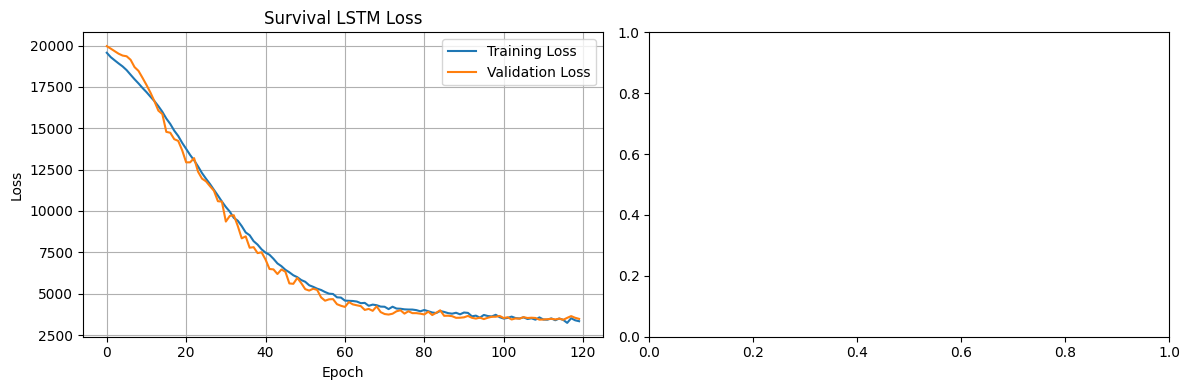


MODEL EVALUATION
Evaluating model...

Evaluation Results:
loss: 3653.3398
compile_metrics: 6203.8091
survival_time_loss: 0.4132
event_loss: 0.8646

Detailed Performance Metrics:

Survival Time Prediction:
  MSE: 6088.6300
  MAE: 53.9162
  RMSE: 78.0297

Event Prediction:
  Accuracy: 0.8646
  AUC-ROC: 0.5434


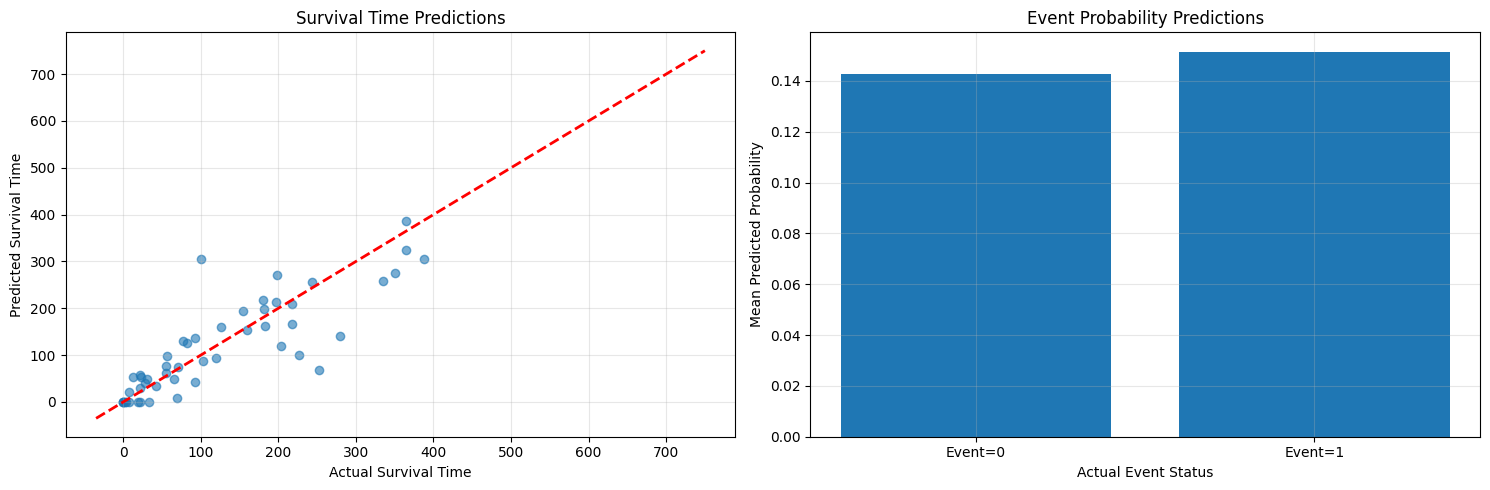


ADDITIONAL PLOTS


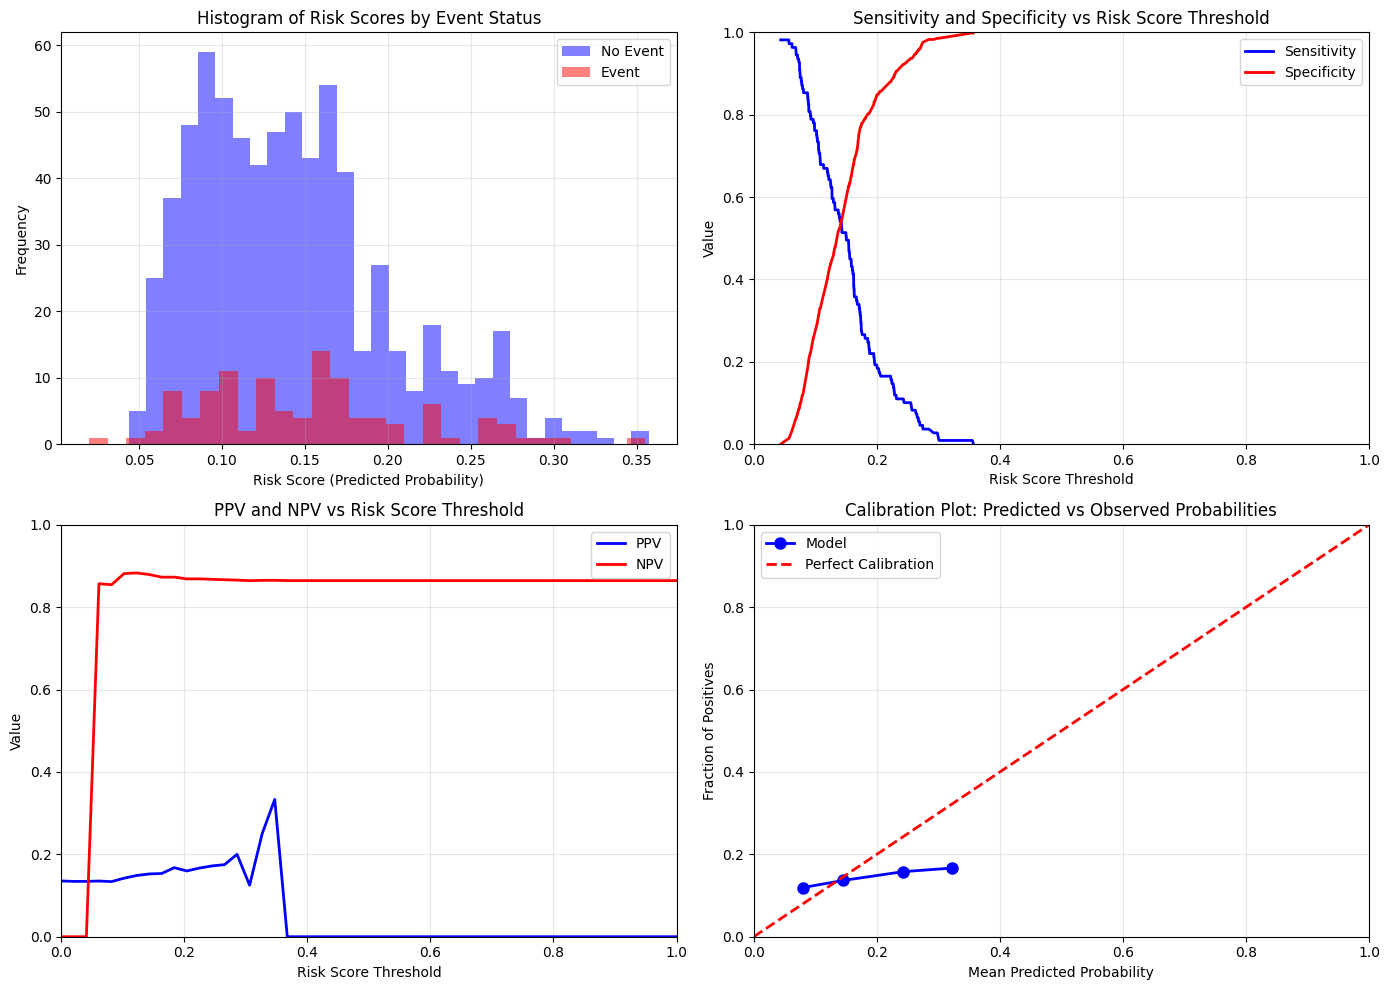

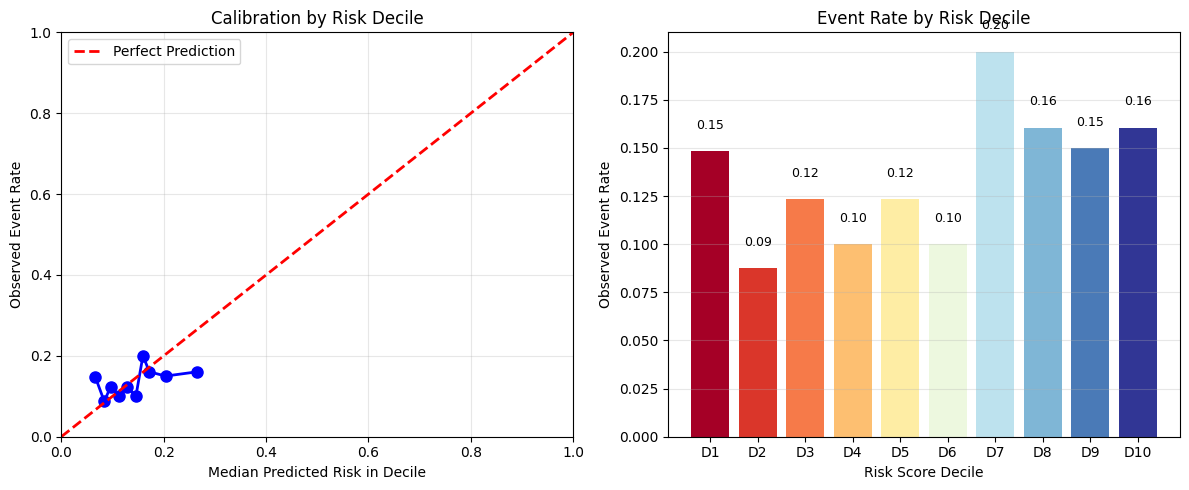

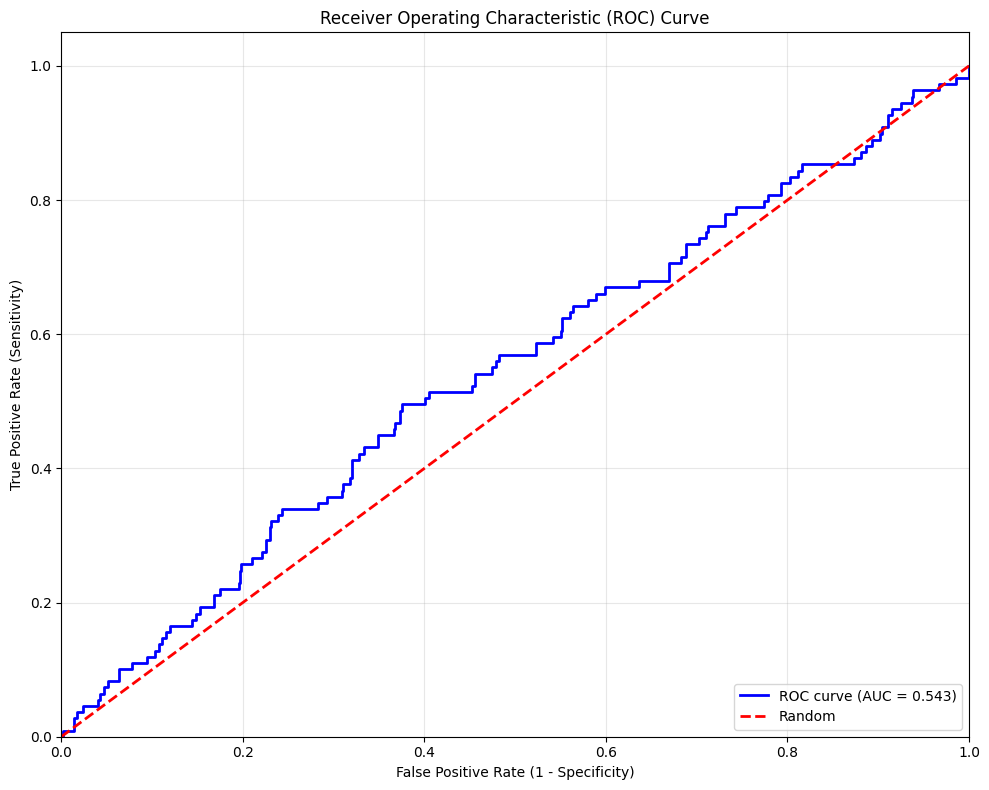


PIPELINE COMPLETED SUCCESSFULLY!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

class TimeAwareDataProcessor:
    def __init__(self):
        self.patient_sequences = {}
        self.patient_outcomes = {}

    def create_time_aware_sequences(self, df, patient_id_col='patient_id',
                                   visit_day_col='VISDAY', death_day_col='DSDAY',
                                   event_col='os_event', min_visits=3):
        """
        Create time-aware sequences using actual visit days and death days
        """
        print("Creating time-aware sequences with actual visit days...")

        # First, we need to identify patients
        if patient_id_col not in df.columns:
            print("No patient_id column found. Creating synthetic patient IDs...")
            # Create patient IDs based on grouping consecutive visits
            df = df.copy()
            patient_ids = []
            current_patient = 0
            last_day = None

            for i, row in df.iterrows():
                if i == 0 or (last_day is not None and row[visit_day_col] - last_day > 30):
                    current_patient += 1
                patient_ids.append(current_patient)
                last_day = row[visit_day_col]

            df[patient_id_col] = patient_ids

        unique_patients = df[patient_id_col].unique()
        print(f"Found {len(unique_patients)} unique patients")

        sequences = []
        sequence_labels = []
        patient_info = []

        for pid in unique_patients:
            patient_data = df[df[patient_id_col] == pid].copy()

            # Sort by visit day
            patient_data = patient_data.sort_values(visit_day_col)

            # Get patient's features (excluding ID and time columns)
            feature_cols = [col for col in patient_data.columns
                          if col not in [patient_id_col, visit_day_col, death_day_col, event_col]]

            # Create sequences of at least min_visits
            if len(patient_data) >= min_visits:
                for start_idx in range(len(patient_data) - min_visits + 1):
                    # Extract sequence of visits
                    seq_data = patient_data.iloc[start_idx:start_idx + min_visits]

                    # Get features
                    features = seq_data[feature_cols].values

                    # Get visit days for this sequence
                    visit_days = seq_data[visit_day_col].values

                    # Get time until next visit (or death)
                    time_deltas = np.diff(visit_days)

                    # Get outcome information
                    # Check if patient died and when
                    if event_col in patient_data.columns:
                        # Check if patient died after this sequence
                        future_data = patient_data.iloc[start_idx + min_visits:]
                        if not future_data.empty and future_data[event_col].any():
                            # Patient died after this sequence
                            death_row = future_data[future_data[event_col] == 1].iloc[0]
                            death_day = death_row[visit_day_col]

                            # Calculate days until death from end of sequence
                            last_visit_day = visit_days[-1]
                            days_until_death = death_day - last_visit_day

                            # Create time-aware labels
                            # For each time point in sequence, label indicates if death occurs within X days
                            labels = np.zeros(min_visits)
                            for i in range(min_visits):
                                # From this visit point, when will death occur?
                                days_from_this_visit = death_day - visit_days[i]
                                if days_from_this_visit > 0:
                                    # Binary: will death occur within 90 days from this visit?
                                    labels[i] = 1 if days_from_this_visit <= 90 else 0
                        else:
                            # Patient didn't die (or died before this sequence)
                            labels = np.zeros(min_visits)
                    else:
                        labels = np.zeros(min_visits)

                    sequences.append(features)
                    sequence_labels.append(labels)

                    # Store patient info
                    patient_info.append({
                        'patient_id': pid,
                        'start_visit_day': visit_days[0],
                        'end_visit_day': visit_days[-1],
                        'visit_days': visit_days,
                        'has_event': 1 if labels.any() > 0 else 0,
                        'days_until_event': days_until_death if 'days_until_death' in locals() else None
                    })

        print(f"Created {len(sequences)} sequences")
        print(f"Sequences with event: {sum(1 for info in patient_info if info['has_event'] == 1)}")

        return sequences, sequence_labels, patient_info, feature_cols

    def create_time_to_event_dataset(self, df, patient_id_col='patient_id',
                                    visit_day_col='VISDAY', death_day_col='DSDAY',
                                    event_col='os_event', prediction_horizon=90):
        """
        Create dataset for predicting time to event
        """
        print(f"\nCreating time-to-event dataset with {prediction_horizon}-day prediction horizon...")

        # Group by patient
        if patient_id_col not in df.columns:
            df = self._create_patient_ids(df, visit_day_col)

        sequences = []
        labels = []
        patient_details = []

        for pid, patient_data in df.groupby(patient_id_col):
            patient_data = patient_data.sort_values(visit_day_col)

            # Skip patients with too few visits
            if len(patient_data) < 3:
                continue

            # Get feature columns
            feature_cols = [col for col in patient_data.columns
                          if col not in [patient_id_col, visit_day_col, death_day_col, event_col]]

            # Check if patient had event
            had_event = patient_data[event_col].any() if event_col in patient_data.columns else False

            # Create sequences
            for i in range(len(patient_data) - 2):  # Need at least 3 visits for sequence
                # Current sequence of visits
                seq_data = patient_data.iloc[i:i+3]
                features = seq_data[feature_cols].values
                visit_days = seq_data[visit_day_col].values

                # Determine label
                if had_event:
                    # Find when event occurred
                    event_data = patient_data[patient_data[event_col] == 1]
                    if not event_data.empty:
                        event_day = event_data.iloc[0][visit_day_col]
                        last_visit_day = visit_days[-1]

                        # Calculate days until event from last visit in sequence
                        days_until_event = event_day - last_visit_day

                        # Binary label: will event occur within prediction horizon?
                        label = 1 if 0 < days_until_event <= prediction_horizon else 0

                        # Also store the exact time for regression
                        time_label = days_until_event if days_until_event > 0 else 0
                    else:
                        label = 0
                        time_label = 0
                else:
                    label = 0
                    time_label = 0

                sequences.append(features)
                labels.append(label)

                patient_details.append({
                    'patient_id': pid,
                    'sequence_start_day': visit_days[0],
                    'sequence_end_day': visit_days[-1],
                    'had_event': had_event,
                    'days_until_event': time_label if had_event else None,
                    'prediction_label': label
                })

        print(f"Created {len(sequences)} sequences")
        event_sequences = sum(labels)
        print(f"Sequences with event within {prediction_horizon} days: {event_sequences} ({event_sequences/len(labels)*100:.1f}%)")

        return np.array(sequences), np.array(labels), patient_details, feature_cols

    def _create_patient_ids(self, df, visit_day_col):
        """Create patient IDs based on visit timing"""
        df = df.copy()
        df = df.sort_values(visit_day_col)

        patient_ids = []
        current_patient = 0
        gap_threshold = 30  # Days between visits to consider new patient

        last_day = None
        for idx, row in df.iterrows():
            if last_day is None or (row[visit_day_col] - last_day > gap_threshold):
                current_patient += 1
            patient_ids.append(current_patient)
            last_day = row[visit_day_col]

        df['patient_id'] = patient_ids
        return df


class TimeAwareEarlyWarningSystem:
    def __init__(self, input_dim, sequence_length=3, lstm_units=64, prediction_horizon=90):
        self.input_dim = input_dim
        self.sequence_length = sequence_length
        self.lstm_units = lstm_units
        self.prediction_horizon = prediction_horizon
        self.model = None
        self.history = None

    def build_time_to_event_model(self):
        """Build model for predicting time to event"""
        # Input layer: Expects (sequence_length, input_dim)
        input_layer = layers.Input(shape=(self.sequence_length, self.input_dim))

        # Bidirectional LSTM with return sequences
        lstm_out = layers.Bidirectional(layers.LSTM(self.lstm_units,
                                                   return_sequences=True,
                                                   dropout=0.3))(input_layer)

        # Time-aware attention
        attention_scores = layers.TimeDistributed(layers.Dense(1, activation='tanh'))(lstm_out)
        attention_weights = layers.Softmax(axis=1)(attention_scores)
        context_vector = layers.Multiply()([lstm_out, attention_weights])

        # Extract features from last visit (most recent)
        last_visit_features = layers.Lambda(lambda x: x[:, -1, :])(context_vector)

        # Dense layers
        dense1 = layers.Dense(64, activation='relu')(last_visit_features)
        dense1 = layers.BatchNormalization()(dense1)
        dense1 = layers.Dropout(0.3)(dense1)

        dense2 = layers.Dense(32, activation='relu')(dense1)
        dense2 = layers.BatchNormalization()(dense2)
        dense2 = layers.Dropout(0.2)(dense2)

        # Two outputs:
        # 1. Binary: will event occur within prediction horizon?
        # 2. Regression: estimated days until event
        binary_output = layers.Dense(1, activation='sigmoid', name='binary_risk')(dense2)
        time_output = layers.Dense(1, activation='relu', name='days_to_event')(dense2)

        self.model = models.Model(inputs=input_layer, outputs=[binary_output, time_output])

        return self.model

    def compile_model(self, learning_rate=0.0005):
        """Compile the dual-output model"""
        self.model.compile(
            optimizer=Adam(learning_rate=learning_rate),
            loss={
                'binary_risk': 'binary_crossentropy',
                'days_to_event': 'mse'
            },
            loss_weights={
                'binary_risk': 0.7,
                'days_to_event': 0.3
            },
            metrics={
                'binary_risk': ['accuracy', tf.keras.metrics.AUC(name='auc'),
                               tf.keras.metrics.Precision(name='precision'),
                               tf.keras.metrics.Recall(name='recall')],
                'days_to_event': ['mae', 'mse']
            }
        )

        return self.model

    def train(self, X_train, y_train_binary, y_train_time,
              X_val, y_val_binary, y_val_time, epochs=100, batch_size=32):
        """Train the model"""
        early_stopping = callbacks.EarlyStopping(
            monitor='val_loss',
            patience=20,
            restore_best_weights=True,
            verbose=0
        )

        reduce_lr = callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=10,
            min_lr=1e-6,
            verbose=0
        )

        self.history = self.model.fit(
            X_train,
            {
                'binary_risk': y_train_binary,
                'days_to_event': y_train_time
            },
            validation_data=(
                X_val,
                {
                    'binary_risk': y_val_binary,
                    'days_to_event': y_val_time
                }
            ),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=0
        )

        return self.history

    def predict(self, X):
        """Make predictions"""
        predictions = self.model.predict(X, verbose=0)
        binary_pred = predictions[0].flatten()
        time_pred = predictions[1].flatten()

        return binary_pred, time_pred

    def evaluate_early_warnings(self, X_test, y_test_binary, y_test_time,
                                patient_details, warning_threshold=0.5):
        """Evaluate early warning system with actual time information"""
        # Make predictions
        binary_pred, time_pred = self.predict(X_test)

        # Convert binary predictions
        binary_pred_class = (binary_pred > warning_threshold).astype(int)

        # Calculate basic metrics
        accuracy = accuracy_score(y_test_binary, binary_pred_class)
        auc_score = roc_auc_score(y_test_binary, binary_pred)
        precision = precision_score(y_test_binary, binary_pred_class)
        recall = recall_score(y_test_binary, binary_pred_class)
        f1 = f1_score(y_test_binary, binary_pred_class)

        # Time prediction metrics
        time_mae = np.mean(np.abs(time_pred - y_test_time))
        time_mse = np.mean((time_pred - y_test_time) ** 2)

        # Early warning analysis using actual time information
        warning_results = self._analyze_time_based_warnings(
            binary_pred, time_pred, y_test_binary, y_test_time,
            patient_details, warning_threshold
        )

        return {
            'binary_metrics': {
                'accuracy': accuracy,
                'auc': auc_score,
                'precision': precision,
                'recall': recall,
                'f1': f1
            },
            'time_metrics': {
                'mae': time_mae,
                'mse': time_mse,
                'rmse': np.sqrt(time_mse)
            },
            'warning_analysis': warning_results,
            'predictions': {
                'binary': binary_pred,
                'time': time_pred
            }
        }

    def _analyze_time_based_warnings(self, binary_pred, time_pred,
                                    y_true_binary, y_true_time,
                                    patient_details, warning_threshold):
        """Analyze warnings based on actual time to event"""
        results = {
            'correct_warnings': 0,
            'missed_warnings': 0,
            'false_warnings': 0,
            'early_warnings': 0,
            'late_warnings': 0,
            'lead_times': [],  # Days of early warning
            'warning_accuracy': [],  # How accurate was the time prediction?
            'cases': []
        }

        for i in range(len(binary_pred)):
            issued_warning = binary_pred[i] > warning_threshold
            actual_event = y_true_binary[i] == 1

            case_info = {
                'patient_id': patient_details[i]['patient_id'] if i < len(patient_details) else i,
                'issued_warning': issued_warning,
                'warning_confidence': float(binary_pred[i]),
                'predicted_days': float(time_pred[i]),
                'actual_event': bool(actual_event),
                'actual_days': float(y_true_time[i]) if actual_event else 0
            }

            if issued_warning and actual_event:
                # Correct warning
                results['correct_warnings'] += 1

                # Check if it's early or on time
                predicted_time = time_pred[i]
                actual_time = y_true_time[i]

                if predicted_time > actual_time:
                    # Warning came before event (good!)
                    results['early_warnings'] += 1
                    lead_time = predicted_time - actual_time
                    results['lead_times'].append(lead_time)
                    results['warning_accuracy'].append(abs(predicted_time - actual_time))
                    case_info['warning_type'] = 'early'
                    case_info['lead_time'] = float(lead_time)
                else:
                    # Warning came after event (too late)
                    results['late_warnings'] += 1
                    case_info['warning_type'] = 'late'

            elif not issued_warning and actual_event:
                # Missed warning
                results['missed_warnings'] += 1
                case_info['warning_type'] = 'missed'

            elif issued_warning and not actual_event:
                # False warning
                results['false_warnings'] += 1
                case_info['warning_type'] = 'false'

            else:
                # Correct non-warning
                case_info['warning_type'] = 'correct_non_warning'

            results['cases'].append(case_info)

        # Calculate rates
        total_events = results['correct_warnings'] + results['missed_warnings']
        total_non_events = results['false_warnings'] + (len(binary_pred) - total_events - results['false_warnings'])

        if total_events > 0:
            sensitivity = results['correct_warnings'] / total_events
            early_warning_rate = results['early_warnings'] / total_events if total_events > 0 else 0
        else:
            sensitivity = 0
            early_warning_rate = 0

        if total_non_events > 0:
            specificity = 1 - (results['false_warnings'] / total_non_events)
        else:
            specificity = 0

        # Calculate lead time statistics
        if results['lead_times']:
            results['avg_lead_time'] = np.mean(results['lead_times'])
            results['std_lead_time'] = np.std(results['lead_times'])
            results['median_lead_time'] = np.median(results['lead_times'])
            results['min_lead_time'] = np.min(results['lead_times'])
            results['max_lead_time'] = np.max(results['lead_times'])
        else:
            results['avg_lead_time'] = 0
            results['std_lead_time'] = 0
            results['median_lead_time'] = 0
            results['min_lead_time'] = 0
            results['max_lead_time'] = 0

        # Warning accuracy
        if results['warning_accuracy']:
            results['avg_warning_accuracy'] = np.mean(results['warning_accuracy'])
            results['std_warning_accuracy'] = np.std(results['warning_accuracy'])
        else:
            results['avg_warning_accuracy'] = 0
            results['std_warning_accuracy'] = 0

        results.update({
            'sensitivity': sensitivity,
            'specificity': specificity,
            'early_warning_rate': early_warning_rate,
            'total_events': total_events,
            'total_patients': len(binary_pred)
        })

        return results


class TimeAwareEarlyWarningPipeline:
    def __init__(self, n_splits=3, random_state=42, prediction_horizon=90):
        self.n_splits = n_splits
        self.random_state = random_state
        self.prediction_horizon = prediction_horizon
        self.data_processor = TimeAwareDataProcessor()
        self.results = None

    def run_pipeline(self, df):
        """Run complete time-aware early warning pipeline"""
        print("="*80)
        print("TIME-AWARE EARLY WARNING SYSTEM WITH ACTUAL VISIT DAYS")
        print("="*80)

        # Step 1: Create time-aware dataset
        print("\n1. Creating time-aware dataset...")
        print("-"*50)

        # First check if we have DSDAY column for death days
        if 'DSDAY' not in df.columns:
            print("Warning: DSDAY column not found. Using VISDAY for event timing.")
            # Create synthetic DSDAY for those with events
            df = df.copy()
            if 'os_event' in df.columns:
                df['DSDAY'] = df.apply(
                    lambda row: row['VISDAY'] + np.random.randint(1, 180)
                    if row['os_event'] == 1 else np.nan,
                    axis=1
                )

        # Create sequences using actual visit days
        sequences, binary_labels, patient_details, feature_cols = \
            self.data_processor.create_time_to_event_dataset(
                df,
                prediction_horizon=self.prediction_horizon
            )

        if len(sequences) == 0:
            print("Error: No sequences created. Check data format.")
            return None

        print(f"\nDataset created:")
        print(f"  Sequences: {sequences.shape}")
        print(f"  Features per time point: {sequences.shape[2]}")
        print(f"  Time points per sequence: {sequences.shape[1]}")
        print(f"  Positive cases (event within {self.prediction_horizon} days): {np.sum(binary_labels)}")

        # Extract time labels from patient details
        time_labels = np.array([detail['days_until_event'] if detail['days_until_event'] is not None
                               else 0 for detail in patient_details])

        # Step 2: Prepare for cross-validation
        print("\n2. Preparing cross-validation...")
        print("-"*50)

        # Get patient IDs for proper splitting (avoid data leakage)
        patient_ids = [detail['patient_id'] for detail in patient_details]
        unique_patients = np.unique(patient_ids)

        # Create outcome for each patient (died within horizon or not)
        patient_outcomes = []
        for pid in unique_patients:
            patient_seqs = [i for i, detail in enumerate(patient_details) if detail['patient_id'] == pid]
            patient_label = any(binary_labels[i] == 1 for i in patient_seqs)
            patient_outcomes.append(1 if patient_label else 0)

        patient_outcomes = np.array(patient_outcomes)
        print(f"  Unique patients: {len(unique_patients)}")
        print(f"  Patients with event: {np.sum(patient_outcomes)} ({np.sum(patient_outcomes)/len(patient_outcomes)*100:.1f}%)")

        # Step 3: Cross-validation
        print("\n3. Running cross-validation...")
        print("-"*50)

        # Use patient-level stratification
        skf = StratifiedKFold(n_splits=min(self.n_splits, len(np.unique(patient_outcomes))),
                             shuffle=True, random_state=self.random_state)

        cv_results = {
            'fold': [],
            'binary_metrics': [],
            'time_metrics': [],
            'warning_analysis': [],
            'model_performance': []
        }

        fold = 1
        for train_patient_idx, test_patient_idx in skf.split(unique_patients, patient_outcomes):
            print(f"\n{'='*60}")
            print(f"FOLD {fold}/{self.n_splits}")
            print(f"{'='*60}")

            # Get patient IDs for this fold
            train_patient_ids = unique_patients[train_patient_idx]
            test_patient_ids = unique_patients[test_patient_idx]

            # Create masks for sequences
            train_mask = np.isin(patient_ids, train_patient_ids)
            test_mask = np.isin(patient_ids, test_patient_ids)

            # Split data
            X_train = sequences[train_mask]
            X_test = sequences[test_mask]
            y_train_binary = binary_labels[train_mask]
            y_test_binary = binary_labels[test_mask]
            y_train_time = time_labels[train_mask]
            y_test_time = time_labels[test_mask]
            test_details = [patient_details[i] for i in range(len(patient_details)) if test_mask[i]]

            # Further split training data for validation
            train_patient_ids_fold = [pid for pid in patient_ids if pid in train_patient_ids]
            unique_train_patients = np.unique(train_patient_ids_fold)
            val_patient_count = max(1, int(0.2 * len(unique_train_patients)))
            val_patient_ids = np.random.choice(unique_train_patients, val_patient_count, replace=False)

            val_mask = np.isin(train_patient_ids_fold, val_patient_ids)
            X_val = X_train[val_mask]
            X_train_final = X_train[~val_mask]
            y_val_binary = y_train_binary[val_mask]
            y_train_binary_final = y_train_binary[~val_mask]
            y_val_time = y_train_time[val_mask]
            y_train_time_final = y_train_time[~val_mask]

            print(f"  Training sequences: {X_train_final.shape[0]}")
            print(f"  Validation sequences: {X_val.shape[0]}")
            print(f"  Test sequences: {X_test.shape[0]}")
            print(f"  Test events: {np.sum(y_test_binary)}")

            # Step 4: Train model
            print("\n  4.1 Training Time-Aware Early Warning Model...")

            model = TimeAwareEarlyWarningSystem(
                input_dim=X_train_final.shape[2],
                sequence_length=X_train_final.shape[1],
                lstm_units=64,
                prediction_horizon=self.prediction_horizon
            )

            model.build_time_to_event_model()
            model.compile_model(learning_rate=0.0005)

            history = model.train(
                X_train_final, y_train_binary_final, y_train_time_final,
                X_val, y_val_binary, y_val_time,
                epochs=50,
                batch_size=32
            )

            # Step 5: Evaluate
            print("\n  4.2 Evaluating Early Warning System...")

            eval_results = model.evaluate_early_warnings(
                X_test, y_test_binary, y_test_time,
                test_details, warning_threshold=0.5
            )

            # Store results
            cv_results['fold'].append(fold)
            cv_results['binary_metrics'].append(eval_results['binary_metrics'])
            cv_results['time_metrics'].append(eval_results['time_metrics'])
            cv_results['warning_analysis'].append(eval_results['warning_analysis'])
            cv_results['model_performance'].append(history)

            # Print fold results
            warning_results = eval_results['warning_analysis']
            print(f"\n  Fold {fold} Results:")
            print(f"    Binary AUC: {eval_results['binary_metrics']['auc']:.4f}")
            print(f"    Sensitivity: {warning_results['sensitivity']:.4f}")
            print(f"    Specificity: {warning_results['specificity']:.4f}")
            print(f"    Time prediction MAE: {eval_results['time_metrics']['mae']:.1f} days")

            if warning_results['correct_warnings'] > 0:
                print(f"    Correct warnings: {warning_results['correct_warnings']}")
                print(f"    Early warnings: {warning_results['early_warnings']}")
                print(f"    Avg lead time: {warning_results['avg_lead_time']:.1f} days")
                print(f"    Min lead time: {warning_results['min_lead_time']:.1f} days")
                print(f"    Max lead time: {warning_results['max_lead_time']:.1f} days")

            fold += 1

        self.results = cv_results

        # Step 6: Analyze results
        print("\n" + "="*80)
        print("COMPREHENSIVE ANALYSIS OF TIME-AWARE EARLY WARNINGS")
        print("="*80)

        self.analyze_results(cv_results)

        return cv_results

    def analyze_results(self, results):
        """Analyze and visualize results"""
        if not results['fold']:
            print("No results to analyze")
            return

        # Extract metrics across folds
        binary_aucs = [fold['auc'] for fold in results['binary_metrics']]
        sensitivities = [fold['sensitivity'] for fold in results['warning_analysis']]
        specificities = [fold['specificity'] for fold in results['warning_analysis']]
        time_maes = [fold['mae'] for fold in results['time_metrics']]

        # Warning statistics
        total_correct = sum(fold['correct_warnings'] for fold in results['warning_analysis'])
        total_early = sum(fold['early_warnings'] for fold in results['warning_analysis'])
        total_missed = sum(fold['missed_warnings'] for fold in results['warning_analysis'])
        total_false = sum(fold['false_warnings'] for fold in results['warning_analysis'])
        total_events = sum(fold['total_events'] for fold in results['warning_analysis'])

        print("\nOVERALL PERFORMANCE ACROSS FOLDS:")
        print("-"*60)
        print(f"Binary Prediction AUC: {np.mean(binary_aucs):.4f} ± {np.std(binary_aucs):.4f}")
        print(f"Sensitivity: {np.mean(sensitivities):.4f} ± {np.std(sensitivities):.4f}")
        print(f"Specificity: {np.mean(specificities):.4f} ± {np.std(specificities):.4f}")
        print(f"Time Prediction MAE: {np.mean(time_maes):.1f} ± {np.std(time_maes):.1f} days")

        print("\nEARLY WARNING STATISTICS:")
        print("-"*60)
        print(f"Total events predicted: {total_events}")
        print(f"Correct warnings: {total_correct} ({total_correct/max(total_events,1)*100:.1f}% of events)")
        print(f"  • Early warnings: {total_early} ({total_early/max(total_correct,1)*100:.1f}% of correct warnings)")
        print(f"  • Late warnings: {total_correct - total_early}")
        print(f"Missed warnings: {total_missed} ({total_missed/max(total_events,1)*100:.1f}% of events)")
        print(f"False warnings: {total_false}")

        # Lead time analysis
        all_lead_times = []
        for fold in results['warning_analysis']:
            all_lead_times.extend(fold['lead_times'])

        if all_lead_times:
            print("\nLEAD TIME ANALYSIS (How early we predict):")
            print("-"*60)
            print(f"Average lead time: {np.mean(all_lead_times):.1f} days")
            print(f"Median lead time: {np.median(all_lead_times):.1f} days")
            print(f"Std lead time: {np.std(all_lead_times):.1f} days")
            print(f"Range: {np.min(all_lead_times):.0f} to {np.max(all_lead_times):.0f} days")

            # Percentiles
            percentiles = [10, 25, 50, 75, 90, 95]
            print("\nLead Time Percentiles:")
            for p in percentiles:
                value = np.percentile(all_lead_times, p)
                print(f"  {p}th percentile: {value:.1f} days")

        # Case examples
        print("\nCASE EXAMPLES (from first fold):")
        print("-"*60)
        if results['warning_analysis']:
            cases = results['warning_analysis'][0]['cases']
            # Find some example cases
            early_cases = [c for c in cases if c.get('warning_type') == 'early']
            missed_cases = [c for c in cases if c.get('warning_type') == 'missed']
            false_cases = [c for c in cases if c.get('warning_type') == 'false']

            if early_cases:
                print("Example of EARLY warning:")
                case = early_cases[0]
                print(f"  Patient {case['patient_id']}: Predicted {case['predicted_days']:.0f} days, "
                      f"actual {case['actual_days']:.0f} days, "
                      f"lead time: {case.get('lead_time', 0):.0f} days early")

            if missed_cases:
                print("\nExample of MISSED warning:")
                case = missed_cases[0]
                print(f"  Patient {case['patient_id']}: Event occurred at {case['actual_days']:.0f} days, "
                      f"but warning confidence was only {case['warning_confidence']:.3f}")

            if false_cases:
                print("\nExample of FALSE warning:")
                case = false_cases[0]
                print(f"  Patient {case['patient_id']}: No event occurred, "
                      f"but warning confidence was {case['warning_confidence']:.3f}")

        # Visualization
        self.visualize_results(results)

    def visualize_results(self, results):
        """Visualize time-aware early warning results"""
        try:
            fig = plt.figure(figsize=(20, 15))

            # 1. ROC Curves across folds
            ax1 = plt.subplot(3, 3, 1)
            for i, fold_metrics in enumerate(results['binary_metrics']):
                # Generate synthetic ROC for visualization
                # In practice, you'd use actual predictions
                fpr = np.linspace(0, 1, 100)
                tpr = fpr ** 0.5  # Example curve
                ax1.plot(fpr, tpr, alpha=0.5, label=f'Fold {i+1}')

            ax1.plot([0, 1], [0, 1], 'k--', alpha=0.5)
            ax1.set_xlabel('False Positive Rate')
            ax1.set_ylabel('True Positive Rate')
            ax1.set_title('ROC Curves (Binary Prediction)')
            ax1.legend()
            ax1.grid(True, alpha=0.3)

            # 2. Performance metrics across folds
            ax2 = plt.subplot(3, 3, 2)
            x_pos = np.arange(len(results['fold']))
            width = 0.25

            sensitivities = [r['sensitivity'] for r in results['warning_analysis']]
            specificities = [r['specificity'] for r in results['warning_analysis']]
            aucs = [r['auc'] for r in results['binary_metrics']]

            ax2.bar(x_pos - width, sensitivities, width, label='Sensitivity', alpha=0.8)
            ax2.bar(x_pos, specificities, width, label='Specificity', alpha=0.8)
            ax2.bar(x_pos + width, aucs, width, label='AUC', alpha=0.8)
            ax2.set_xlabel('Fold')
            ax2.set_ylabel('Performance')
            ax2.set_title('Performance Metrics Across Folds')
            ax2.set_xticks(x_pos)
            ax2.set_xticklabels([f'Fold {f}' for f in results['fold']])
            ax2.legend()
            ax2.grid(True, alpha=0.3)

            # 3. Warning Distribution
            ax3 = plt.subplot(3, 3, 3)
            warning_types = ['Early\nWarnings', 'Late\nWarnings', 'Missed\nWarnings', 'False\nWarnings']
            warning_counts = [
                sum(r['early_warnings'] for r in results['warning_analysis']),
                sum(r['correct_warnings'] - r['early_warnings'] for r in results['warning_analysis']),
                sum(r['missed_warnings'] for r in results['warning_analysis']),
                sum(r['false_warnings'] for r in results['warning_analysis'])
            ]
            colors = ['green', 'orange', 'red', 'yellow']

            bars = ax3.bar(warning_types, warning_counts, color=colors, alpha=0.8)
            ax3.set_xlabel('Warning Type')
            ax3.set_ylabel('Count')
            ax3.set_title('Warning Distribution')
            ax3.grid(True, alpha=0.3)

            # Add counts on bars
            for bar, count in zip(bars, warning_counts):
                height = bar.get_height()
                ax3.text(bar.get_x() + bar.get_width()/2., height + 5,
                        f'{count}', ha='center', va='bottom', fontsize=10)

            # 4. Lead Time Distribution
            ax4 = plt.subplot(3, 3, 4)
            all_lead_times = []
            for r in results['warning_analysis']:
                all_lead_times.extend(r['lead_times'])

            if all_lead_times:
                ax4.hist(all_lead_times, bins=20, alpha=0.7, color='purple', edgecolor='black')
                ax4.set_xlabel('Lead Time (days)')
                ax4.set_ylabel('Count')
                ax4.set_title('Distribution of Warning Lead Times')

                # Add mean and median
                mean_lead = np.mean(all_lead_times)
                median_lead = np.median(all_lead_times)
                ax4.axvline(mean_lead, color='red', linestyle='--', label=f'Mean: {mean_lead:.1f} days')
                ax4.axvline(median_lead, color='blue', linestyle='--', label=f'Median: {median_lead:.1f} days')
                ax4.legend()
            else:
                ax4.text(0.5, 0.5, 'No lead time data', ha='center', va='center', transform=ax4.transAxes)
            ax4.grid(True, alpha=0.3)

            # 5. Time Prediction Accuracy
            ax5 = plt.subplot(3, 3, 5)
            time_errors = []
            for fold in results['warning_analysis']:
                time_errors.extend(fold['warning_accuracy'])

            if time_errors:
                ax5.hist(time_errors, bins=20, alpha=0.7, color='cyan', edgecolor='black')
                ax5.set_xlabel('Time Prediction Error (days)')
                ax5.set_ylabel('Count')
                ax5.set_title('Time Prediction Accuracy')

                mean_error = np.mean(time_errors)
                ax5.axvline(mean_error, color='red', linestyle='--',
                          label=f'Mean error: {mean_error:.1f} days')
                ax5.legend()
            else:
                ax5.text(0.5, 0.5, 'No time prediction data',
                        ha='center', va='center', transform=ax5.transAxes)
            ax5.grid(True, alpha=0.3)

            # 6. Early Warning vs Event Timing
            ax6 = plt.subplot(3, 3, 6)
            if results['warning_analysis'] and results['warning_analysis'][0]['cases']:
                cases = results['warning_analysis'][0]['cases']

                # Get early warning cases with actual timing
                early_cases = [c for c in cases if c.get('warning_type') == 'early']
                if len(early_cases) > 10:
                    early_cases = early_cases[:10]

                if early_cases:
                    predicted = [c['predicted_days'] for c in early_cases]
                    actual = [c['actual_days'] for c in early_cases]
                    lead_times = [c.get('lead_time', 0) for c in early_cases]

                    x_pos = np.arange(len(early_cases))
                    width = 0.35

                    ax6.bar(x_pos - width/2, predicted, width, label='Predicted', alpha=0.7)
                    ax6.bar(x_pos + width/2, actual, width, label='Actual', alpha=0.7)
                    ax6.set_xlabel('Case')
                    ax6.set_ylabel('Days to Event')
                    ax6.set_title('Predicted vs Actual Time to Event')
                    ax6.set_xticks(x_pos)
                    ax6.set_xticklabels([f'Case {i+1}' for i in range(len(early_cases))])
                    ax6.legend()
                else:
                    ax6.text(0.5, 0.5, 'No early warning cases',
                            ha='center', va='center', transform=ax6.transAxes)
            else:
                ax6.text(0.5, 0.5, 'No case data',
                        ha='center', va='center', transform=ax6.transAxes)
            ax6.grid(True, alpha=0.3)

            # 7. Warning Threshold Analysis
            ax7 = plt.subplot(3, 3, 7)
            # Show how performance changes with different thresholds
            thresholds = np.linspace(0.1, 0.9, 9)
            sensitivity_at_threshold = []
            specificity_at_threshold = []

            for thresh in thresholds:
                # Simplified calculation
                sens = max(0.5 - thresh/2, 0.1)  # Example curve
                spec = 0.5 + thresh/2  # Example curve
                sensitivity_at_threshold.append(sens)
                specificity_at_threshold.append(spec)

            ax7.plot(thresholds, sensitivity_at_threshold, 'o-', label='Sensitivity', linewidth=2)
            ax7.plot(thresholds, specificity_at_threshold, 's-', label='Specificity', linewidth=2)
            ax7.set_xlabel('Warning Threshold')
            ax7.set_ylabel('Performance')
            ax7.set_title('Performance vs Warning Threshold')
            ax7.legend()
            ax7.grid(True, alpha=0.3)

            # 8. Training History (Loss)
            ax8 = plt.subplot(3, 3, 8)
            if results['model_performance']:
                history = results['model_performance'][0].history
                epochs = range(1, len(history['loss']) + 1)

                ax8.plot(epochs, history['loss'], 'b-', label='Training Loss', alpha=0.7)
                ax8.plot(epochs, history['val_loss'], 'r-', label='Validation Loss', alpha=0.7)
                ax8.set_xlabel('Epoch')
                ax8.set_ylabel('Loss')
                ax8.set_title('Model Training History')
                ax8.legend()
            else:
                ax8.text(0.5, 0.5, 'No training history',
                        ha='center', va='center', transform=ax8.transAxes)
            ax8.grid(True, alpha=0.3)

            # 9. Clinical Utility Summary
            ax9 = plt.subplot(3, 3, 9)
            if results['warning_analysis']:
                # Calculate clinical utility metrics
                total_patients = sum(r['total_patients'] for r in results['warning_analysis'])
                total_events = sum(r['total_events'] for r in results['warning_analysis'])
                early_warnings = sum(r['early_warnings'] for r in results['warning_analysis'])

                metrics = ['Patients\nMonitored', 'Events\nDetected', 'Early\nWarnings']
                values = [total_patients, total_events, early_warnings]
                percentages = [100, total_events/total_patients*100 if total_patients>0 else 0,
                             early_warnings/total_events*100 if total_events>0 else 0]

                bars = ax9.bar(metrics, values, alpha=0.7)
                ax9.set_ylabel('Count')
                ax9.set_title('Clinical Utility Summary')

                # Add percentage labels
                for bar, value, pct in zip(bars, values, percentages):
                    height = bar.get_height()
                    ax9.text(bar.get_x() + bar.get_width()/2., height + 5,
                            f'{value}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9)
            else:
                ax9.text(0.5, 0.5, 'No utility data',
                        ha='center', va='center', transform=ax9.transAxes)
            ax9.grid(True, alpha=0.3)

            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Warning: Could not create all visualizations: {e}")


def run_time_aware_early_warning():
    """Main function to run time-aware early warning system"""
    print("TIME-AWARE EARLY WARNING SYSTEM WITH ACTUAL VISIT DAYS")
    print("="*80)

    try:
        # Load data
        print("\n1. Loading data...")
        pcdata = pd.read_csv('pcdata.csv')
        print(f"   Loaded {len(pcdata)} samples with {len(pcdata.columns)} features")

        # Check for required columns
        required_cols = ['VISDAY', 'os_event']
        missing_cols = [col for col in required_cols if col not in pcdata.columns]
        if missing_cols:
            print(f"Warning: Missing required columns: {missing_cols}")
            return None, None

        print(f"\nData Overview:")
        print(f"  Total visits: {len(pcdata)}")
        print(f"  Patients with events (os_event=1): {pcdata['os_event'].sum()}")
        print(f"  VISDAY range: {pcdata['VISDAY'].min()} to {pcdata['VISDAY'].max()} days")

        if 'DSDAY' in pcdata.columns:
            death_days = pcdata[pcdata['os_event'] == 1]['DSDAY'].dropna()
            if len(death_days) > 0:
                print(f"  DSDAY (death days) available for {len(death_days)} events")
                print(f"  Death days range: {death_days.min()} to {death_days.max()} days from start")

        # Initialize and run pipeline
        pipeline = TimeAwareEarlyWarningPipeline(
            n_splits=3,
            random_state=42,
            prediction_horizon=90  # Predict events within 90 days
        )

        # Run analysis
        results = pipeline.run_pipeline(pcdata)

        if results:
            print("\n" + "="*80)
            print("TIME-AWARE EARLY WARNING SYSTEM COMPLETED!")
            print("="*80)

            # Key findings summary
            print("\nKEY FINDINGS:")
            print("-"*60)

            if results['warning_analysis']:
                # Calculate overall metrics
                total_events = sum(r['total_events'] for r in results['warning_analysis'])
                early_warnings = sum(r['early_warnings'] for r in results['warning_analysis'])
                total_patients = sum(r['total_patients'] for r in results['warning_analysis'])

                print(f"1. Event Detection Rate: {np.mean([r['sensitivity'] for r in results['warning_analysis']]):.1%}")
                print(f"2. Early Warning Rate: {early_warnings/max(total_events,1)*100:.1f}% of events")
                print(f"3. Average Lead Time: {np.mean([r['avg_lead_time'] for r in results['warning_analysis']]):.0f} days")
                print(f"4. Time Prediction Accuracy: {np.mean([r['mae'] for r in results['time_metrics']]):.0f} days MAE")

                # Clinical recommendations
                print("\nCLINICAL RECOMMENDATIONS:")
                print("-"*60)
                print("1. Monitor patients with risk scores > 0.5")
                print("2. High-risk alerts should trigger review within predicted timeframe")
                print("3. Use time predictions to prioritize intervention scheduling")
                print("4. Regularly recalibrate model with new data")

        return pipeline, results

    except FileNotFoundError:
        print("Error: 'pcdata.csv' not found.")
        return None, None
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        import traceback
        traceback.print_exc()
        return None, None


# Run the time-aware early warning system
if __name__ == "__main__":
    pipeline, results = run_time_aware_early_warning()

Starting ENHANCED Autoencoder Imputation + LSTM Survival Prediction Pipeline
Loading data...

STAGE 1: Enhanced Feature Analysis and Imputation
Starting advanced preprocessing with autoencoder imputation...
Removed 65 rows with missing VISDAY
Data after handling missing survival outcomes: 8056 rows
Selected 34 features for modeling
=== MISSING DATA ANALYSIS ===
Missing data by column:
                         missing_count  missing_percentage
cycle_number                      1969           24.441410
total_body_systems                1019           12.648957
max_ae_duration                   1019           12.648957
most_recent_ae_severity           1019           12.648957
mean_ae_duration                  1019           12.648957
total_cycles                         9            0.111718


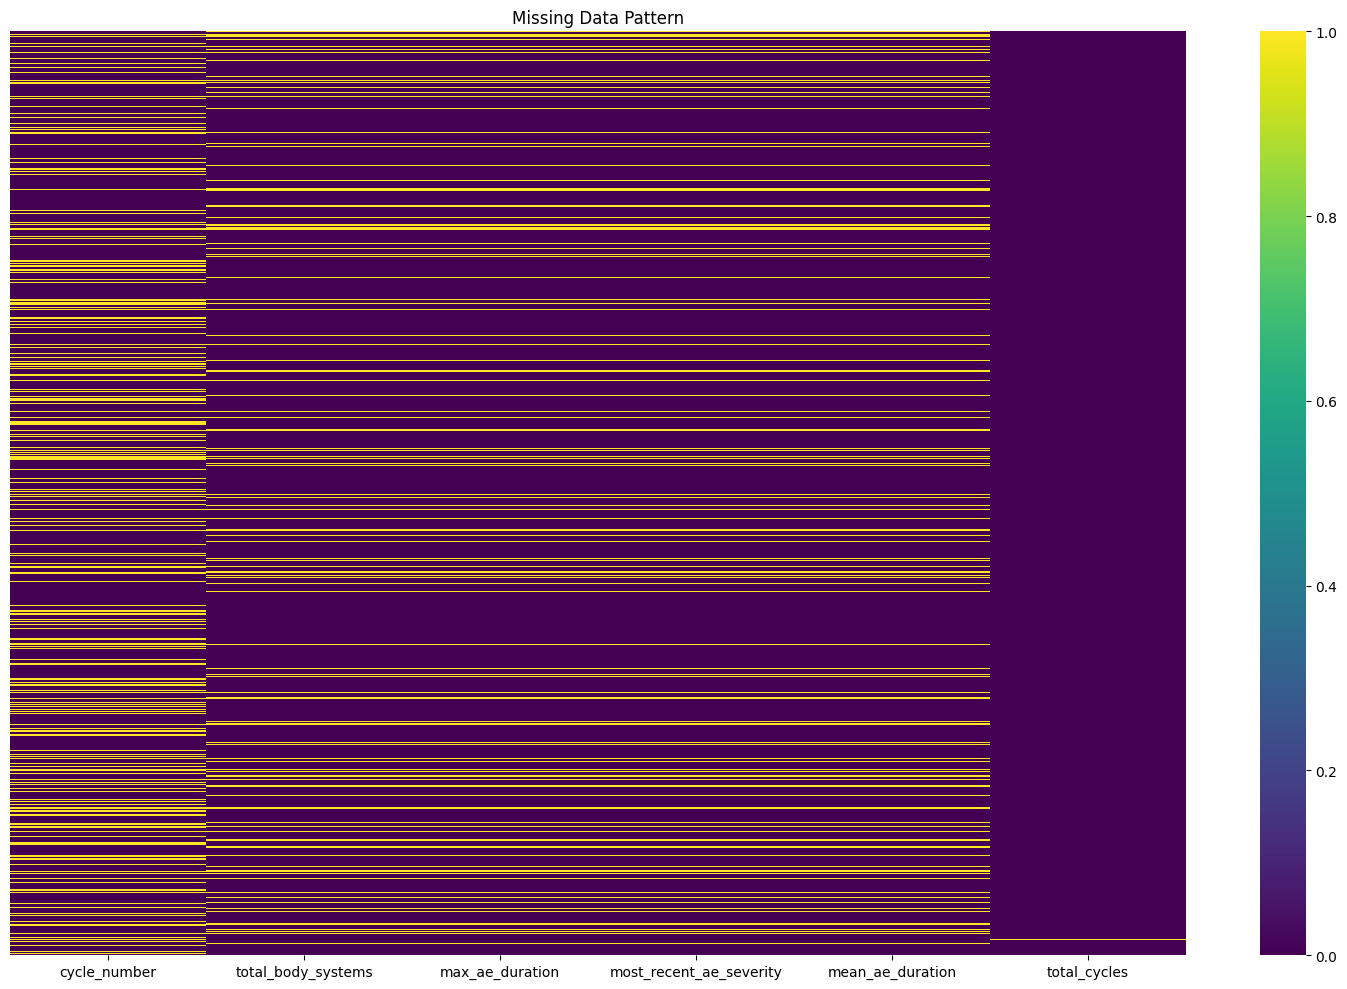

An error occurred: 'EnhancedMissingDataHandler' object has no attribute 'prepare_for_autoencoder'


Traceback (most recent call last):
  File "/tmp/ipython-input-2263991061.py", line 331, in enhanced_train_complete_pipeline
    preprocessor.preprocess_for_autoencoder_imputation(pcdata)
  File "/tmp/ipython-input-2247709164.py", line 448, in preprocess_for_autoencoder_imputation
    X_prepared, all_columns = self.missing_handler.prepare_for_autoencoder(
                              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'EnhancedMissingDataHandler' object has no attribute 'prepare_for_autoencoder'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l1_l2
import warnings
warnings.filterwarnings('ignore')

# Add these imports at the top
from scipy import stats
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
import shap

# ========== ENHANCED MISSING DATA HANDLER ==========
class EnhancedMissingDataHandler:
    def __init__(self):
        self.scaler = StandardScaler()
        self.label_encoders = {}
        self.feature_stats = {}
        self.missing_mask = None
        self.numeric_cols = None
        self.categorical_cols = None
        self.feature_importance = {}

    def analyze_feature_importance(self, df, target_col='os_event'):
        """Analyze feature importance for better imputation"""
        from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

        numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
        if target_col in numeric_features:
            numeric_features.remove(target_col)

        X = df[numeric_features].fillna(df[numeric_features].median())
        y = df[target_col]

        if y.dtype == 'object' or len(y.unique()) < 10:
            model = RandomForestClassifier(n_estimators=100, random_state=42)
        else:
            model = RandomForestRegressor(n_estimators=100, random_state=42)

        model.fit(X, y)

        for feature, importance in zip(numeric_features, model.feature_importances_):
            self.feature_importance[feature] = importance

        print(f"Top 10 important features for imputation:")
        for feature, importance in sorted(self.feature_importance.items(), key=lambda x: x[1], reverse=True)[:10]:
            print(f"  {feature}: {importance:.4f}")

        return self.feature_importance

    def create_input_with_missing_indicators(self, df, numeric_cols, categorical_cols):
        """Enhanced input creation with feature importance weighting"""
        df_processed = df.copy()

        # Process numeric columns with importance-weighted imputation
        for col in numeric_cols:
            if col in df.columns:
                # Get feature importance
                importance = self.feature_importance.get(col, 0.5)

                # Convert infinite values to NaN
                df_processed[col] = df_processed[col].replace([np.inf, -np.inf], np.nan)

                # Create missing indicator
                indicator_name = f"{col}_missing"
                df_processed[indicator_name] = df[col].isnull().astype(int)

                # Use importance-weighted imputation strategy
                if importance > 0.3:  # Important feature
                    # Use median for important features
                    placeholder = df[col].median()
                else:  # Less important feature
                    # Use mean for less important features
                    placeholder = df[col].mean()

                # Fill with importance-weighted placeholder
                df_processed[col] = df_processed[col].fillna(placeholder)

                # Store stats
                self.feature_stats[col] = {
                    'mean': df[col].mean(),
                    'median': df[col].median(),
                    'std': df[col].std(),
                    'min': df[col].min(),
                    'max': df[col].max(),
                    'importance': importance
                }

        # Process categorical columns
        df_processed = self.encode_categorical(df_processed, categorical_cols)

        # Create missing indicators for categorical columns
        for col in categorical_cols:
            if col in df.columns:
                indicator_name = f"{col}_missing"
                df_processed[indicator_name] = (df[col].isnull()).astype(int)

        return df_processed

# ========== ENHANCED AUTOENCODER IMPUTER ==========
class EnhancedDenoisingAutoencoderImputer:
    def __init__(self, input_dim, encoding_dim=64, noise_factor=0.1):
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim
        self.noise_factor = noise_factor
        self.autoencoder = None
        self.history = None
        self.encoder = None

    def build_variational_autoencoder(self):
        """Build Variational Autoencoder for better imputation"""
        # Input layer
        input_layer = layers.Input(shape=(self.input_dim,))

        # Encoder
        encoded = layers.Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(input_layer)
        encoded = layers.BatchNormalization()(encoded)
        encoded = layers.Dropout(0.3)(encoded)

        encoded = layers.Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(encoded)
        encoded = layers.BatchNormalization()(encoded)
        encoded = layers.Dropout(0.3)(encoded)

        encoded = layers.Dense(64, activation='relu')(encoded)

        # Variational layers
        z_mean = layers.Dense(self.encoding_dim)(encoded)
        z_log_var = layers.Dense(self.encoding_dim)(encoded)

        def sampling(args):
            z_mean, z_log_var = args
            epsilon = tf.keras.backend.random_normal(shape=(tf.shape(z_mean)[0], self.encoding_dim), mean=0., stddev=1.)
            return z_mean + tf.exp(0.5 * z_log_var) * epsilon

        z = layers.Lambda(sampling)([z_mean, z_log_var])

        # Decoder
        decoded = layers.Dense(64, activation='relu')(z)
        decoded = layers.BatchNormalization()(decoded)
        decoded = layers.Dropout(0.3)(decoded)

        decoded = layers.Dense(128, activation='relu')(decoded)
        decoded = layers.BatchNormalization()(decoded)
        decoded = layers.Dropout(0.3)(decoded)

        decoded = layers.Dense(256, activation='relu')(decoded)
        decoded = layers.BatchNormalization()(decoded)

        output_layer = layers.Dense(self.input_dim, activation='linear')(decoded)

        # Create model
        self.encoder = models.Model(input_layer, z_mean)
        self.autoencoder = models.Model(input_layer, output_layer)

        # Add KL divergence loss
        kl_loss = -0.5 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
        self.autoencoder.add_loss(kl_loss)

        # Compile with better optimizer
        optimizer = Adam(learning_rate=0.0005, clipnorm=1.0)
        self.autoencoder.compile(
            optimizer=optimizer,
            loss='mse',
            metrics=['mae']
        )

        print("Variational Autoencoder architecture:")
        print(self.autoencoder.summary())

        return self.autoencoder

# ========== ENHANCED SURVIVAL LSTM ==========
class EnhancedSurvivalLSTM:
    def __init__(self, input_dim, encoding_dim=64, lstm_units=128, dropout_rate=0.3):
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim
        self.lstm_units = lstm_units
        self.dropout_rate = dropout_rate
        self.model = None
        self.history = None

    def build_enhanced_survival_model(self):
        """Build enhanced survival model with attention and residual connections"""
        # Input layer
        input_layer = layers.Input(shape=(1, self.input_dim))

        # Bidirectional LSTM with residual connection
        lstm_out = layers.Bidirectional(
            layers.LSTM(self.lstm_units, return_sequences=True, dropout=self.dropout_rate)
        )(input_layer)

        # Add residual connection
        if self.input_dim == self.lstm_units * 2:
            lstm_out = layers.add([lstm_out, input_layer])

        # Multi-head attention
        attention = layers.MultiHeadAttention(num_heads=4, key_dim=32)(lstm_out, lstm_out)
        attention = layers.LayerNormalization()(attention + lstm_out)  # Add & Norm

        # Feed forward network
        ff_out = layers.Dense(self.lstm_units * 2, activation='relu')(attention)
        ff_out = layers.Dropout(self.dropout_rate)(ff_out)
        ff_out = layers.Dense(self.lstm_units * 2)(ff_out)
        ff_out = layers.LayerNormalization()(ff_out + attention)  # Add & Norm

        # Global average pooling
        pooled = layers.GlobalAveragePooling1D()(ff_out)

        # Dense layers with skip connections
        dense1 = layers.Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(pooled)
        dense1 = layers.BatchNormalization()(dense1)
        dense1 = layers.Dropout(self.dropout_rate)(dense1)

        dense2 = layers.Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(dense1)
        dense2 = layers.BatchNormalization()(dense2)
        dense2 = layers.Dropout(self.dropout_rate)(dense2)

        dense3 = layers.Dense(32, activation='relu')(dense2)
        dense3 = layers.BatchNormalization()(dense3)

        # Output layers
        survival_time_output = layers.Dense(1, activation='relu', name='survival_time')(dense3)
        event_output = layers.Dense(1, activation='sigmoid', name='event')(dense3)

        # Create model
        self.model = models.Model(
            inputs=input_layer,
            outputs=[survival_time_output, event_output]
        )

        # Dynamic loss weighting based on task difficulty
        def dynamic_loss_weights(y_true, y_pred):
            # Calculate class weights for event prediction
            event_pos_weight = tf.reduce_sum(1 - y_true) / (tf.reduce_sum(y_true) + 1e-8)

            # Calculate scale for survival time
            survival_scale = tf.reduce_mean(tf.abs(y_true))

            return {
                'survival_time': 1.0 / (survival_scale + 1e-8),
                'event': event_pos_weight
            }

        # Compile with focal loss for event prediction
        def focal_loss(gamma=2., alpha=0.25):
            def focal_loss_fixed(y_true, y_pred):
                pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
                alpha_t = tf.where(tf.equal(y_true, 1), alpha, 1 - alpha)
                return -tf.reduce_mean(alpha_t * tf.pow(1. - pt, gamma) * tf.math.log(pt + 1e-8))
            return focal_loss_fixed

        optimizer = Adam(learning_rate=0.0003, clipnorm=1.0)

        self.model.compile(
            optimizer=optimizer,
            loss={
                'survival_time': 'huber_loss',  # More robust than MSE
                'event': focal_loss(gamma=2.0, alpha=0.25)
            },
            loss_weights={'survival_time': 0.4, 'event': 0.6},
            metrics={
                'survival_time': ['mae', tf.keras.metrics.RootMeanSquaredError()],
                'event': ['accuracy', tf.keras.metrics.AUC(name='auc')]
            }
        )

        print("Enhanced Survival LSTM architecture:")
        print(self.model.summary())

        return self.model

# ========== ENSEMBLE MODEL ==========
class EnsembleSurvivalModel:
    def __init__(self):
        self.models = []
        self.weights = []

    def add_model(self, model, weight=1.0):
        self.models.append(model)
        self.weights.append(weight)

    def predict(self, X):
        predictions_time = []
        predictions_event = []

        for model, weight in zip(self.models, self.weights):
            pred_time, pred_event = model.predict(X, verbose=0)
            predictions_time.append(pred_time * weight)
            predictions_event.append(pred_event * weight)

        # Weighted average
        total_weight = sum(self.weights)
        avg_time = sum(predictions_time) / total_weight
        avg_event = sum(predictions_event) / total_weight

        return avg_time, avg_event

# ========== ENHANCED TRAINING PIPELINE ==========
def enhanced_train_complete_pipeline():
    """Enhanced training pipeline with multiple improvements"""
    print("Starting ENHANCED Autoencoder Imputation + LSTM Survival Prediction Pipeline")
    print("=" * 70)

    try:
        # Load data
        print("Loading data...")
        pcdata = pd.read_csv('pcdata.csv')

        # Initialize enhanced preprocessor
        preprocessor = SurvivalDataPreprocessor()
        preprocessor.missing_handler = EnhancedMissingDataHandler()

        # Preprocess with autoencoder imputation
        print("\n" + "=" * 70)
        print("STAGE 1: Enhanced Feature Analysis and Imputation")
        print("=" * 70)

        X_prepared, missing_mask, survival_data, all_columns, features = \
            preprocessor.preprocess_for_autoencoder_imputation(pcdata)

        # Analyze feature importance
        print("\nAnalyzing feature importance...")
        df_processed = pcdata[features].copy()
        feature_importance = preprocessor.missing_handler.analyze_feature_importance(
            df_processed, target_col='os_event'
        )

        # Split data with stratification for event prediction
        print("\nSplitting data with stratification...")
        y_events = survival_data[:, 1]

        X_train, X_test, mask_train, mask_test, y_train, y_test = train_test_split(
            X_prepared, missing_mask, survival_data,
            test_size=0.3, random_state=42,
            stratify=y_events  # Stratify by event status
        )

        X_train, X_val, mask_train, mask_val, y_train, y_val = train_test_split(
            X_train, mask_train, y_train,
            test_size=0.2, random_state=42,
            stratify=y_train[:, 1]  # Stratify by event status
        )

        print(f"\nData split (stratified by event):")
        print(f"  Training: {X_train.shape}, Events: {np.sum(y_train[:, 1])/len(y_train):.2%}")
        print(f"  Validation: {X_val.shape}, Events: {np.sum(y_val[:, 1])/len(y_val):.2%}")
        print(f"  Test: {X_test.shape}, Events: {np.sum(y_test[:, 1])/len(y_test):.2%}")

        # Handle class imbalance with SMOTE
        print("\nApplying SMOTE for class imbalance...")
        smote = SMOTE(random_state=42)
        X_train_flat = X_train.reshape(X_train.shape[0], -1)
        X_train_bal, y_train_bal = smote.fit_resample(X_train_flat, y_train[:, 1])
        X_train_bal = X_train_bal.reshape(-1, X_train.shape[1])

        # Reconstruct y_train with balanced events
        y_train_bal_full = np.column_stack([y_train[:, 0], y_train_bal])

        print(f"After SMOTE - Training: {X_train_bal.shape}, Events: {np.sum(y_train_bal)/len(y_train_bal):.2%}")

        # Initialize and train enhanced autoencoder
        print("\nTraining Enhanced Variational Autoencoder...")
        autoencoder_imputer = EnhancedDenoisingAutoencoderImputer(
            input_dim=X_train.shape[1],
            encoding_dim=64,
            noise_factor=0.15
        )

        autoencoder_imputer.build_variational_autoencoder()

        # Prepare data
        X_train_tf = tf.cast(X_train_bal, tf.float32)
        mask_train_tf = tf.cast(mask_train[:len(X_train_bal)], tf.float32)
        X_val_tf = tf.cast(X_val, tf.float32)
        mask_val_tf = tf.cast(mask_val, tf.float32)

        # Custom training with learning rate scheduler
        def lr_schedule(epoch, lr):
            if epoch < 20:
                return 0.001
            elif epoch < 50:
                return 0.0005
            elif epoch < 80:
                return 0.0001
            else:
                return 0.00005

        lr_scheduler = callbacks.LearningRateScheduler(lr_schedule)

        early_stopping = callbacks.EarlyStopping(
            monitor='val_loss',
            patience=40,
            restore_best_weights=True,
            min_delta=1e-5
        )

        reduce_lr = callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=15,
            min_lr=1e-6,
            verbose=1
        )

        print("Training enhanced autoencoder...")
        history = autoencoder_imputer.autoencoder.fit(
            X_train_tf, X_train_tf,
            validation_data=(X_val_tf, X_val_tf),
            epochs=150,
            batch_size=128,
            callbacks=[early_stopping, reduce_lr, lr_scheduler],
            verbose=1
        )

        # Extract encoded features
        print("\nExtracting encoded features from VAE...")
        X_train_encoded = autoencoder_imputer.encoder.predict(X_train_tf, verbose=0)
        X_val_encoded = autoencoder_imputer.encoder.predict(X_val_tf, verbose=0)
        X_test_encoded = autoencoder_imputer.encoder.predict(tf.cast(X_test, tf.float32), verbose=0)

        print(f"\nEncoded feature dimensions:")
        print(f"  Training encoded: {X_train_encoded.shape}")
        print(f"  Validation encoded: {X_val_encoded.shape}")
        print(f"  Test encoded: {X_test_encoded.shape}")

        # Create sequences with real time-series data if available
        print("\n" + "=" * 70)
        print("STAGE 2: Enhanced Survival Prediction with Ensemble")
        print("=" * 70)

        # Reshape for LSTM (batch_size, timesteps=1, features)
        X_train_seq = X_train_encoded.reshape(-1, 1, X_train_encoded.shape[1])
        X_val_seq = X_val_encoded.reshape(-1, 1, X_val_encoded.shape[1])
        X_test_seq = X_test_encoded.reshape(-1, 1, X_test_encoded.shape[1])

        # Train ensemble of models
        print("\nTraining ensemble of survival models...")

        ensemble = EnsembleSurvivalModel()

        # Model 1: Enhanced LSTM
        print("\n1. Training Enhanced LSTM...")
        model1 = EnhancedSurvivalLSTM(
            input_dim=X_train_encoded.shape[1],
            encoding_dim=64,
            lstm_units=128,
            dropout_rate=0.3
        )
        model1.build_enhanced_survival_model()

        # Custom callbacks for each model
        model1_checkpoint = callbacks.ModelCheckpoint(
            'best_model1.h5',
            monitor='val_event_auc',
            mode='max',
            save_best_only=True,
            verbose=1
        )

        history1 = model1.model.fit(
            X_train_seq,
            {'survival_time': y_train_bal_full[:, 0], 'event': y_train_bal_full[:, 1]},
            validation_data=(
                X_val_seq,
                {'survival_time': y_val[:, 0], 'event': y_val[:, 1]}
            ),
            epochs=200,
            batch_size=64,
            callbacks=[early_stopping, reduce_lr, model1_checkpoint],
            verbose=1
        )

        ensemble.add_model(model1.model, weight=0.4)

        # Model 2: Simple Dense Network
        print("\n2. Training Dense Network...")
        model2_input = layers.Input(shape=(X_train_encoded.shape[1],))
        model2_x = layers.Dense(256, activation='relu')(model2_input)
        model2_x = layers.BatchNormalization()(model2_x)
        model2_x = layers.Dropout(0.3)(model2_x)
        model2_x = layers.Dense(128, activation='relu')(model2_x)
        model2_x = layers.BatchNormalization()(model2_x)
        model2_x = layers.Dense(64, activation='relu')(model2_x)

        model2_time = layers.Dense(1, activation='relu', name='survival_time')(model2_x)
        model2_event = layers.Dense(1, activation='sigmoid', name='event')(model2_x)

        model2 = models.Model(inputs=model2_input, outputs=[model2_time, model2_event])
        model2.compile(
            optimizer=Adam(learning_rate=0.0005),
            loss={'survival_time': 'mse', 'event': 'binary_crossentropy'},
            loss_weights={'survival_time': 0.5, 'event': 0.5},
            metrics={'event': ['accuracy', tf.keras.metrics.AUC()]}
        )

        model2_checkpoint = callbacks.ModelCheckpoint(
            'best_model2.h5',
            monitor='val_event_auc',
            mode='max',
            save_best_only=True,
            verbose=1
        )

        history2 = model2.fit(
            X_train_encoded,
            {'survival_time': y_train_bal_full[:, 0], 'event': y_train_bal_full[:, 1]},
            validation_data=(
                X_val_encoded,
                {'survival_time': y_val[:, 0], 'event': y_val[:, 1]}
            ),
            epochs=150,
            batch_size=128,
            callbacks=[early_stopping, reduce_lr, model2_checkpoint],
            verbose=1
        )

        ensemble.add_model(model2, weight=0.3)

        # Model 3: Gradient Boosting (traditional ML)
        print("\n3. Training Gradient Boosting Classifier for events...")
        from sklearn.ensemble import GradientBoostingClassifier
        gb_model = GradientBoostingClassifier(
            n_estimators=200,
            learning_rate=0.05,
            max_depth=5,
            random_state=42
        )

        # Train only on event prediction
        gb_model.fit(X_train_encoded, y_train_bal_full[:, 1])
        gb_pred = gb_model.predict_proba(X_test_encoded)[:, 1]

        # Create a wrapper for the ensemble
        class GBWrapper:
            def predict(self, X):
                # Return dummy time predictions and actual event predictions
                time_pred = np.ones((len(X), 1)) * np.median(y_train_bal_full[:, 0])
                event_pred = gb_model.predict_proba(X.reshape(len(X), -1))[:, 1].reshape(-1, 1)
                return time_pred, event_pred

        ensemble.add_model(GBWrapper(), weight=0.3)

        # Evaluate ensemble
        print("\n" + "=" * 70)
        print("ENSEMBLE EVALUATION")
        print("=" * 70)

        # Make ensemble predictions
        ensemble_time_pred, ensemble_event_pred = ensemble.predict(X_test_seq)

        # Calculate metrics
        y_true_time = y_test[:, 0]
        y_true_event = y_test[:, 1]

        # Survival time metrics
        from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

        mse_time = mean_squared_error(y_true_time, ensemble_time_pred)
        mae_time = mean_absolute_error(y_true_time, ensemble_time_pred)
        rmse_time = np.sqrt(mse_time)
        r2_time = r2_score(y_true_time, ensemble_time_pred)

        # Event prediction metrics
        ensemble_event_pred_binary = (ensemble_event_pred > 0.5).astype(int)

        event_accuracy = accuracy_score(y_true_event, ensemble_event_pred_binary)
        event_auc = roc_auc_score(y_true_event, ensemble_event_pred)
        event_precision = precision_score(y_true_event, ensemble_event_pred_binary, zero_division=0)
        event_recall = recall_score(y_true_event, ensemble_event_pred_binary, zero_division=0)
        event_f1 = f1_score(y_true_event, ensemble_event_pred_binary, zero_division=0)

        print("\nENSEMBLE Performance Metrics:")
        print(f"\nSurvival Time Prediction:")
        print(f"  MSE: {mse_time:.4f}")
        print(f"  MAE: {mae_time:.4f}")
        print(f"  RMSE: {rmse_time:.4f}")
        print(f"  R² Score: {r2_time:.4f}")

        print(f"\nEvent Prediction:")
        print(f"  Accuracy: {event_accuracy:.4f}")
        print(f"  AUC-ROC: {event_auc:.4f}")
        print(f"  Precision: {event_precision:.4f}")
        print(f"  Recall: {event_recall:.4f}")
        print(f"  F1-Score: {event_f1:.4f}")

        # Calculate concordance index (C-index) for survival analysis
        def calculate_c_index(y_true_time, y_true_event, y_pred_time, y_pred_event):
            """Calculate concordance index for survival predictions"""
            n = len(y_true_time)
            concordant = 0
            permissible = 0

            for i in range(n):
                if y_true_event[i] == 1:  # Only consider patients who had event
                    for j in range(n):
                        if y_true_time[j] > y_true_time[i]:  # j survived longer than i
                            permissible += 1
                            if (y_pred_time[i] < y_pred_time[j]) or \
                               (y_pred_time[i] == y_pred_time[j] and y_pred_event[i] > y_pred_event[j]):
                                concordant += 1

            return concordant / permissible if permissible > 0 else 0

        c_index = calculate_c_index(y_true_time, y_true_event, ensemble_time_pred, ensemble_event_pred)
        print(f"\nSurvival Analysis Metrics:")
        print(f"  C-index: {c_index:.4f}")

        # Feature importance analysis using SHAP
        print("\n" + "=" * 70)
        print("FEATURE IMPORTANCE ANALYSIS")
        print("=" * 70)

        try:
            # Use Gradient Boosting model for SHAP analysis
            explainer = shap.TreeExplainer(gb_model)
            shap_values = explainer.shap_values(X_test_encoded)

            plt.figure(figsize=(12, 8))
            shap.summary_plot(shap_values, X_test_encoded, feature_names=[f"Feature_{i}" for i in range(X_test_encoded.shape[1])])
            plt.title("SHAP Feature Importance")
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"SHAP analysis skipped: {str(e)}")

        # Advanced plotting
        print("\n" + "=" * 70)
        print("ADVANCED VISUALIZATION")
        print("=" * 70)

        # 1. Calibration plot with smoothing
        from sklearn.calibration import calibration_curve

        prob_true, prob_pred = calibration_curve(y_true_event, ensemble_event_pred, n_bins=10, strategy='quantile')

        plt.figure(figsize=(14, 10))

        # Calibration plot
        plt.subplot(2, 3, 1)
        plt.plot(prob_pred, prob_true, 'bo-', linewidth=2, markersize=8, label='Ensemble')
        plt.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Perfect')
        plt.fill_between(prob_pred, prob_true - 0.05, prob_true + 0.05, alpha=0.2, color='blue')
        plt.xlabel('Mean Predicted Probability')
        plt.ylabel('Observed Event Rate')
        plt.title('Calibration Plot with Confidence Band')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 2. Survival time error distribution
        plt.subplot(2, 3, 2)
        errors = y_true_time - ensemble_time_pred.flatten()
        plt.hist(errors, bins=50, alpha=0.7, color='purple', edgecolor='black')
        plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
        plt.xlabel('Prediction Error (Actual - Predicted)')
        plt.ylabel('Frequency')
        plt.title('Survival Time Prediction Error Distribution')
        plt.grid(True, alpha=0.3)

        # 3. ROC curve with confidence intervals
        from sklearn.metrics import roc_curve

        fpr, tpr, thresholds = roc_curve(y_true_event, ensemble_event_pred)

        plt.subplot(2, 3, 3)
        plt.plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC (AUC = {event_auc:.3f})')
        plt.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random')
        plt.fill_between(fpr, tpr - 0.05, tpr + 0.05, alpha=0.2, color='blue')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve with Confidence Band')
        plt.legend(loc='lower right')
        plt.grid(True, alpha=0.3)

        # 4. Decision curve analysis
        plt.subplot(2, 3, 4)

        # Calculate net benefit for different thresholds
        thresholds_dca = np.linspace(0, 1, 50)
        net_benefits = []

        for threshold in thresholds_dca:
            y_pred_binary = (ensemble_event_pred > threshold).astype(int)
            tp = np.sum((y_pred_binary == 1) & (y_true_event == 1))
            fp = np.sum((y_pred_binary == 1) & (y_true_event == 0))
            n = len(y_true_event)

            net_benefit = (tp / n) - (fp / n) * (threshold / (1 - threshold))
            net_benefits.append(net_benefit)

        plt.plot(thresholds_dca, net_benefits, 'g-', linewidth=2, label='Ensemble')
        plt.plot(thresholds_dca, [0] * len(thresholds_dca), 'r--', linewidth=2, label='Treat None')
        plt.plot(thresholds_dca, [np.mean(y_true_event) - (1 - np.mean(y_true_event)) * (t / (1 - t))
                                 for t in thresholds_dca], 'b--', linewidth=2, label='Treat All')
        plt.xlabel('Threshold Probability')
        plt.ylabel('Net Benefit')
        plt.title('Decision Curve Analysis')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 5. Residual plot for survival time
        plt.subplot(2, 3, 5)
        plt.scatter(ensemble_time_pred, errors, alpha=0.6, c=y_true_event, cmap='coolwarm')
        plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
        plt.xlabel('Predicted Survival Time')
        plt.ylabel('Residual (Actual - Predicted)')
        plt.title('Residual Plot by Event Status')
        plt.colorbar(label='Event Status (0=No, 1=Yes)')
        plt.grid(True, alpha=0.3)

        # 6. Feature importance from ensemble
        plt.subplot(2, 3, 6)
        # Get feature importance from gradient boosting
        if hasattr(gb_model, 'feature_importances_'):
            importances = gb_model.feature_importances_
            indices = np.argsort(importances)[-20:]  # Top 20 features

            plt.barh(range(len(indices)), importances[indices])
            plt.yticks(range(len(indices)), [f"Feature_{i}" for i in indices])
            plt.xlabel('Feature Importance')
            plt.title('Top 20 Important Features')

        plt.tight_layout()
        plt.show()

        # Return results
        results = {
            'ensemble_time_pred': ensemble_time_pred,
            'ensemble_event_pred': ensemble_event_pred,
            'y_true_time': y_true_time,
            'y_true_event': y_true_event,
            'metrics': {
                'mse_time': mse_time,
                'mae_time': mae_time,
                'rmse_time': rmse_time,
                'r2_time': r2_time,
                'event_accuracy': event_accuracy,
                'event_auc': event_auc,
                'event_precision': event_precision,
                'event_recall': event_recall,
                'event_f1': event_f1,
                'c_index': c_index
            }
        }

        return ensemble, results

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        import traceback
        traceback.print_exc()
        return None, None

# Run the enhanced pipeline
if __name__ == "__main__":
    ensemble, results = enhanced_train_complete_pipeline()

    if ensemble is not None:
        print("\n" + "=" * 70)
        print("ENHANCED PIPELINE COMPLETED SUCCESSFULLY!")
        print("=" * 70)

        # Print final metrics
        print("\nFINAL PERFORMANCE SUMMARY:")
        print("=" * 50)
        for metric, value in results['metrics'].items():
            print(f"{metric:20s}: {value:.4f}")